In [1]:
import pandas as pd
df = pd.read_csv('../data/MLE-Assignment.csv')

In [3]:
print(df.head())
print(df.info())
print(df.describe())

           hsi_id         0         1         2         3         4         5  \
0  imagoai_corn_0  0.416181  0.396844  0.408985  0.372865  0.385293  0.365390   
1  imagoai_corn_1  0.415797  0.402956  0.402564  0.396014  0.397192  0.389634   
2  imagoai_corn_2  0.389023  0.371206  0.373098  0.373872  0.361056  0.349709   
3  imagoai_corn_3  0.468837  0.473255  0.462949  0.459335  0.461672  0.459824   
4  imagoai_corn_4  0.483352  0.487274  0.469153  0.487648  0.464026  0.451152   

          6         7         8  ...       439       440       441       442  \
0  0.355226  0.343350  0.344837  ...  0.710280  0.717482  0.715078  0.705379   
1  0.375671  0.363689  0.373883  ...  0.684011  0.697271  0.701995  0.696077   
2  0.333882  0.330841  0.328925  ...  0.683054  0.669286  0.663179  0.676165   
3  0.458194  0.427737  0.415360  ...  0.742782  0.730801  0.736787  0.730044   
4  0.458229  0.440782  0.426193  ...  0.770227  0.773013  0.761431  0.763488   

        443       444       445 

In [4]:
#Going through dataset
print("Column names",df.columns.tolist())
print("Number of features",(df.iloc[:,1:-1]).shape[1]) #First column is index and last column is target, hence excluding them
print("Number of samples",len(df))

Column names ['hsi_id', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '

In [9]:
# Checking for missing values
print([i for i in df.isnull() if i == True]) #If there are any missing values, it will print True

[]


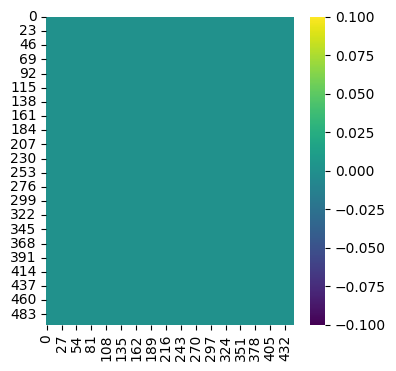

In [11]:
# Visualizing existence of missing values
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
sns.heatmap(df.iloc[:, 1:].isnull(), cmap="viridis")
plt.show()
#Since we see a blank plot, it means there are no missing values in the dataset

Since the visualization is a monochrome and we see that dataframe has no null values, it does not have any missing values.

In [12]:
#Checking for zero values
zero_count = (df.iloc[:,1:-1] == 0).sum()
print([i for i in zero_count if i>0])

[]


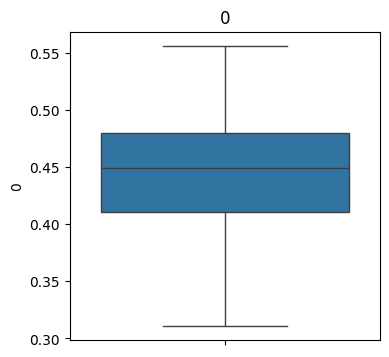

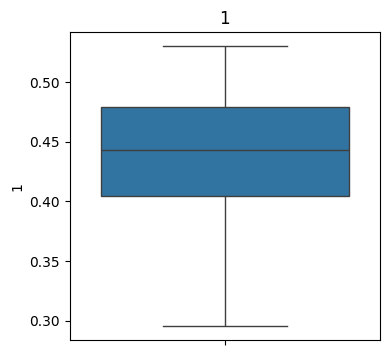

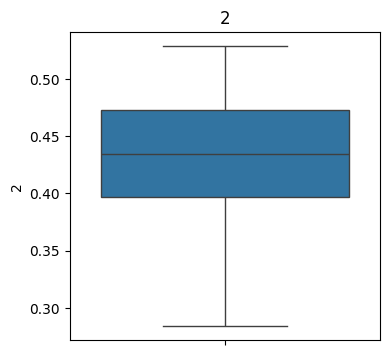

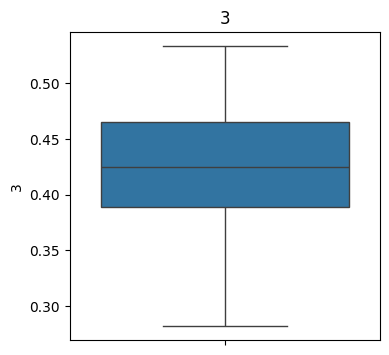

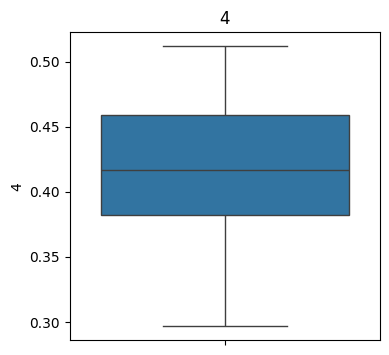

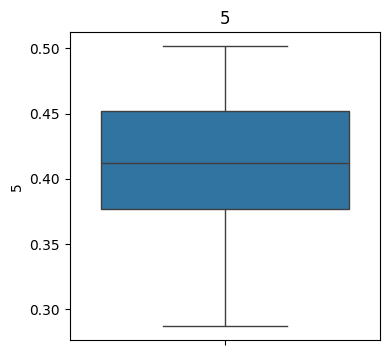

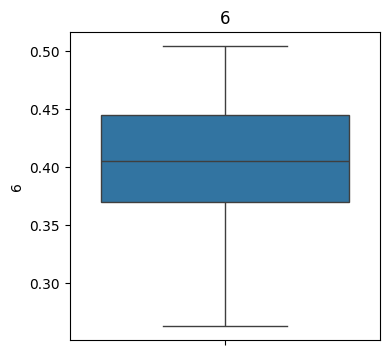

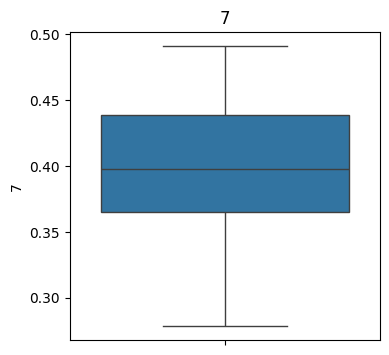

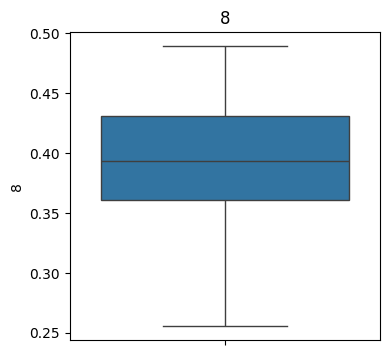

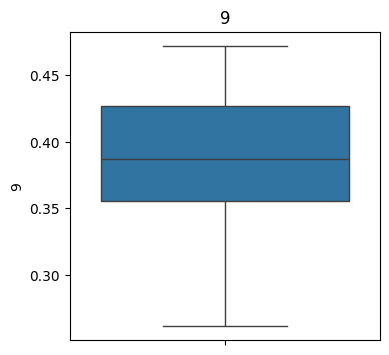

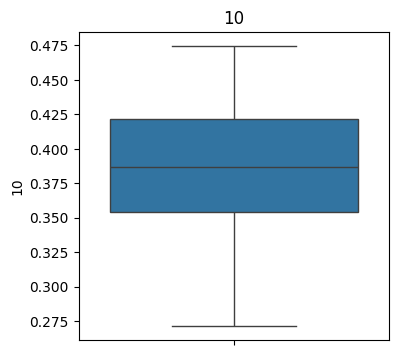

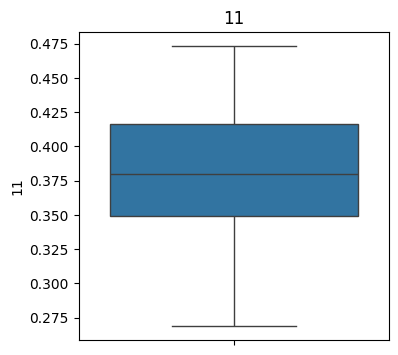

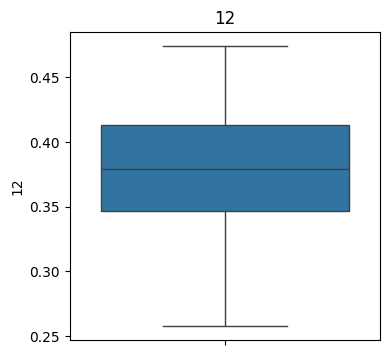

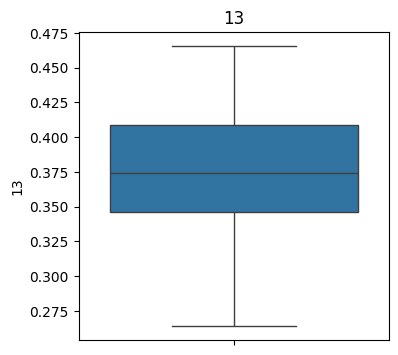

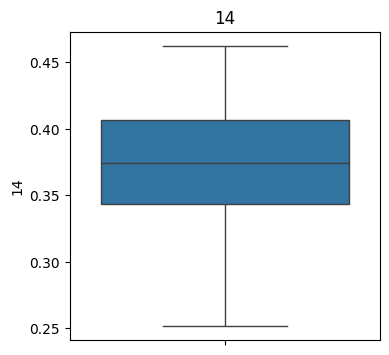

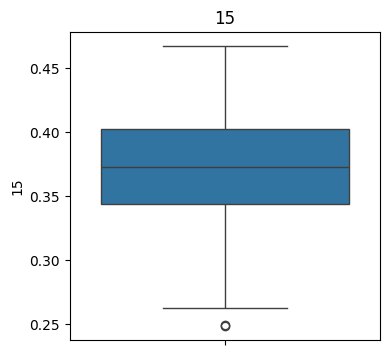

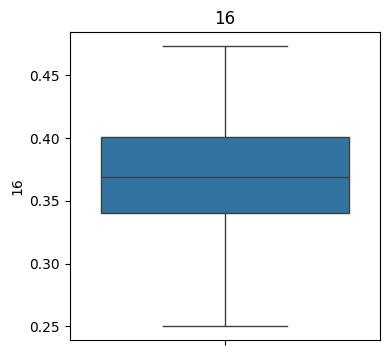

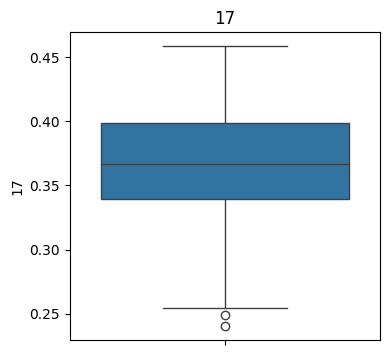

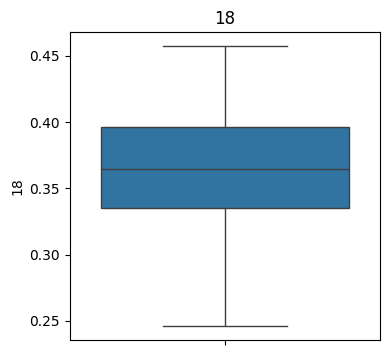

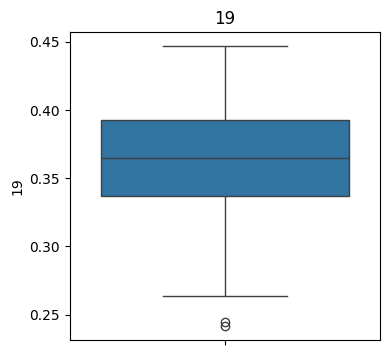

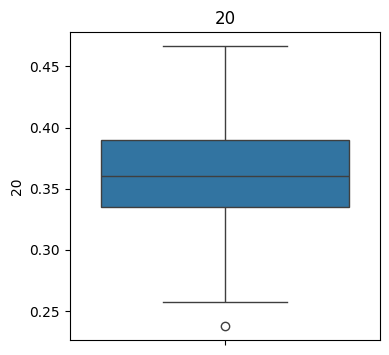

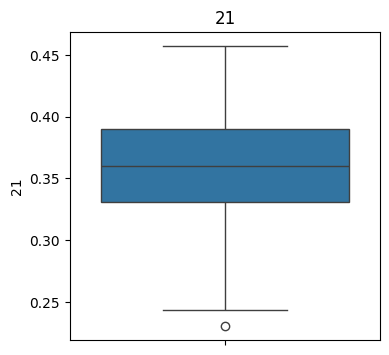

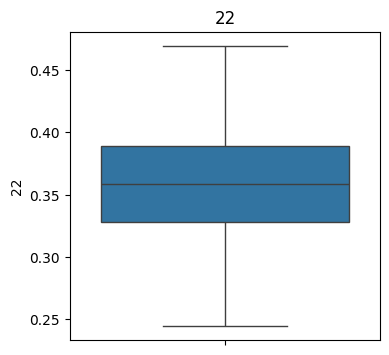

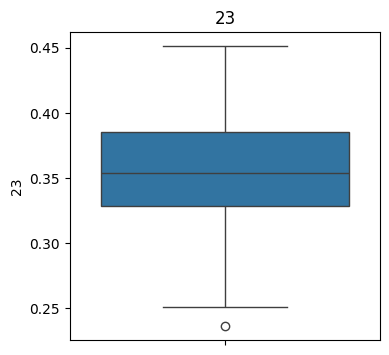

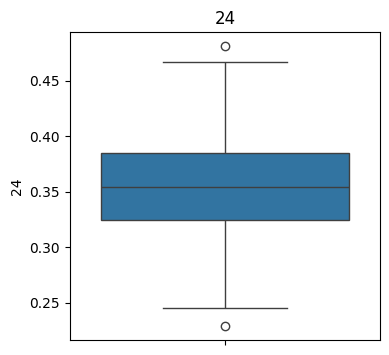

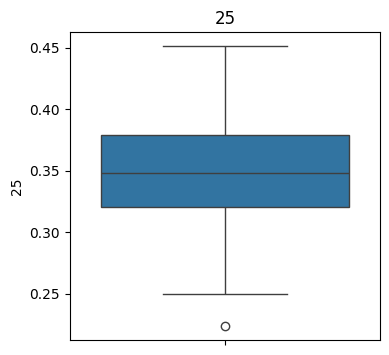

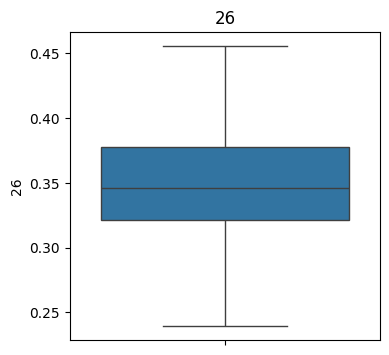

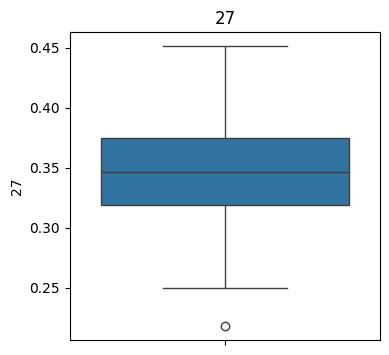

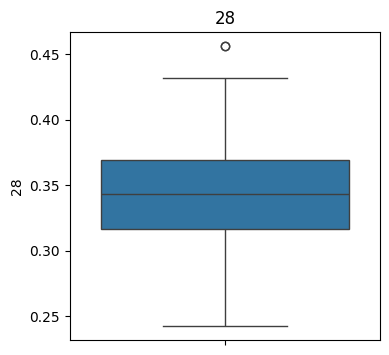

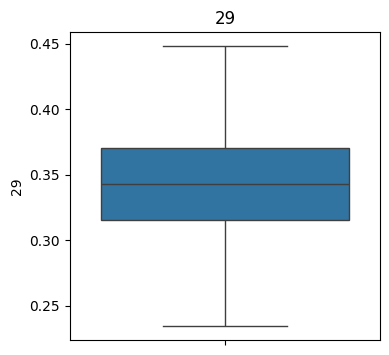

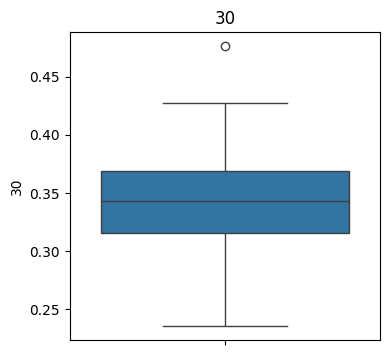

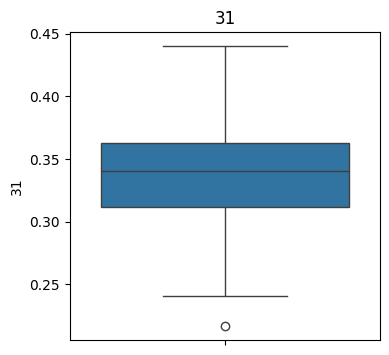

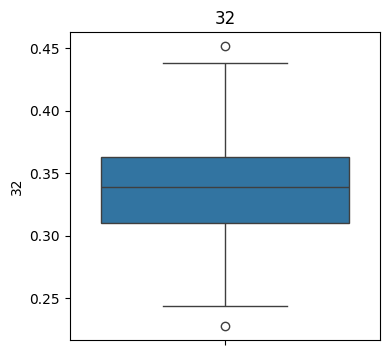

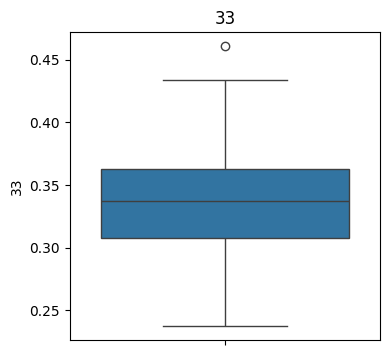

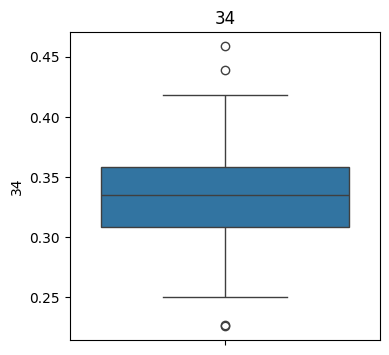

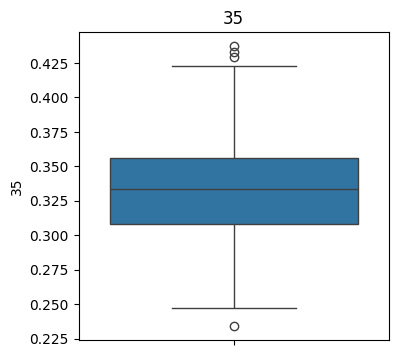

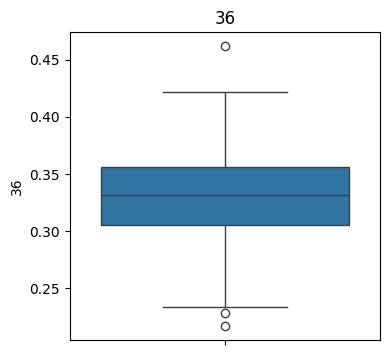

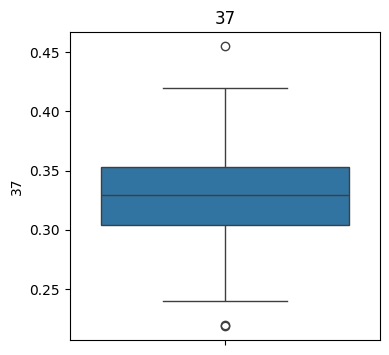

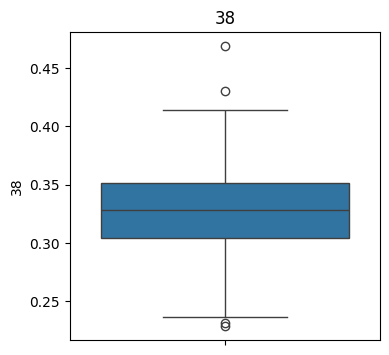

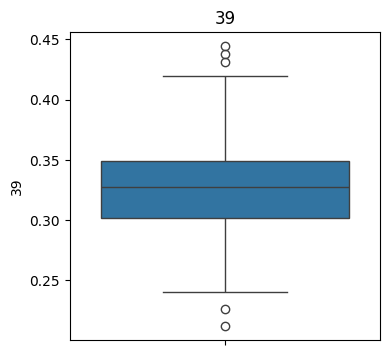

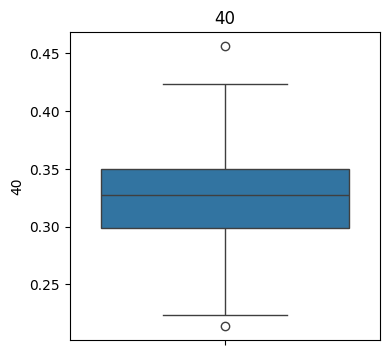

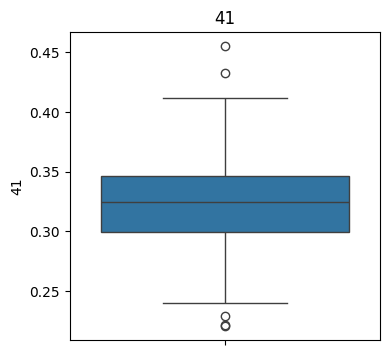

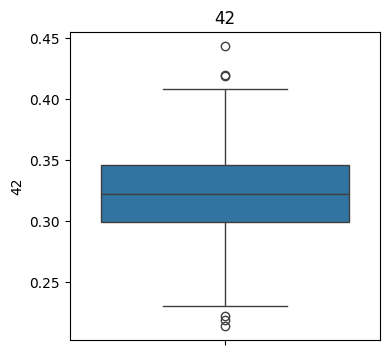

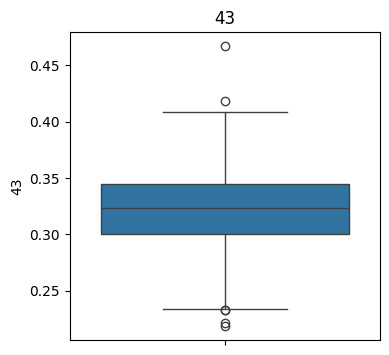

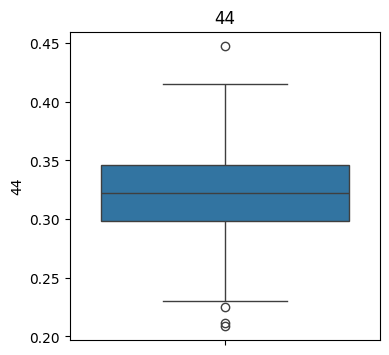

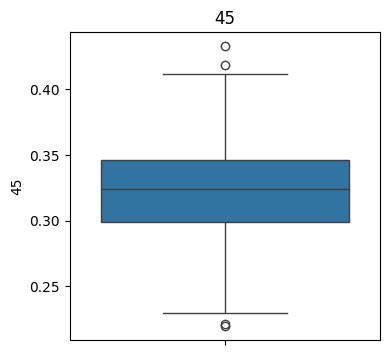

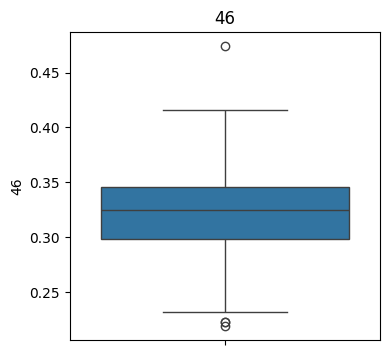

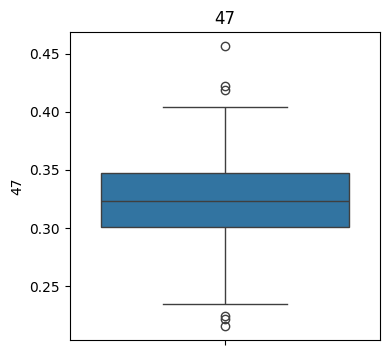

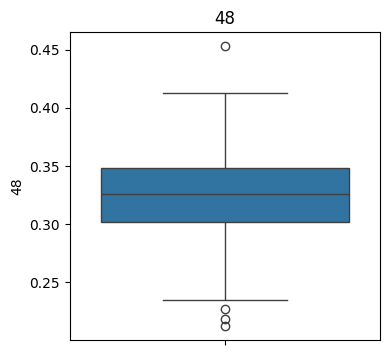

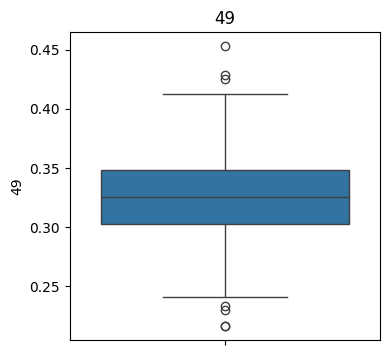

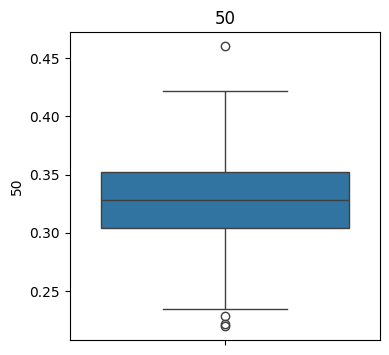

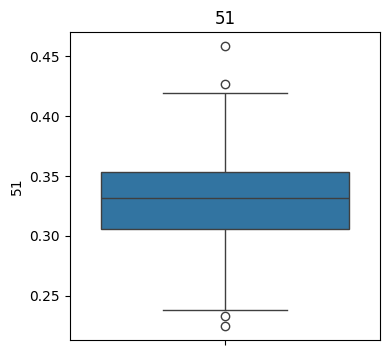

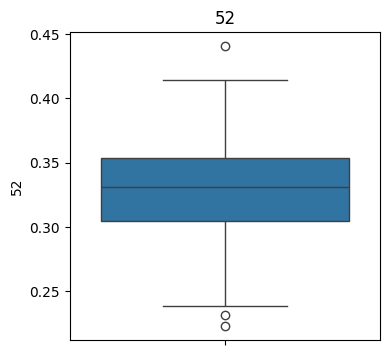

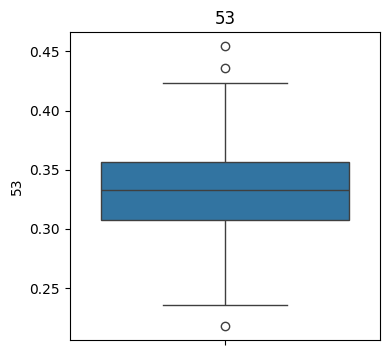

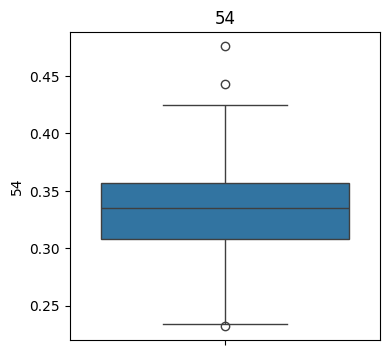

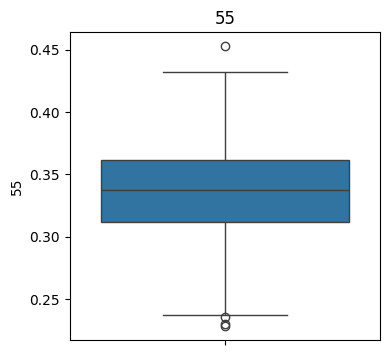

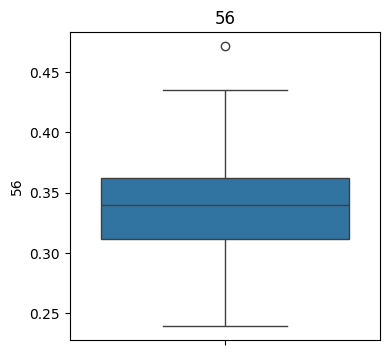

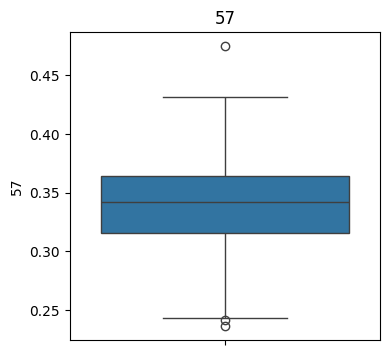

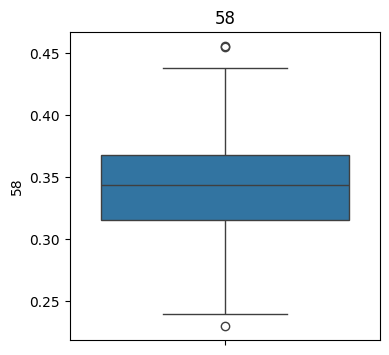

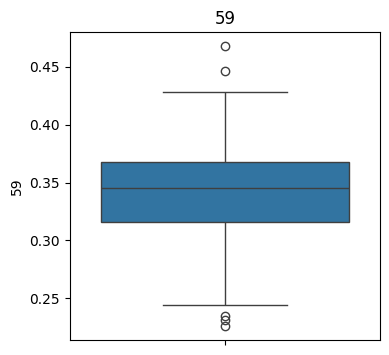

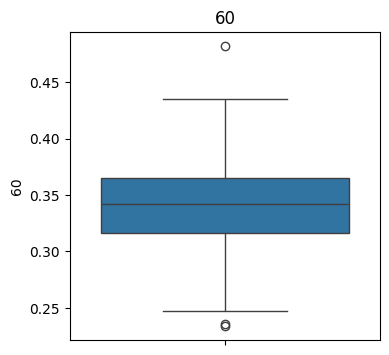

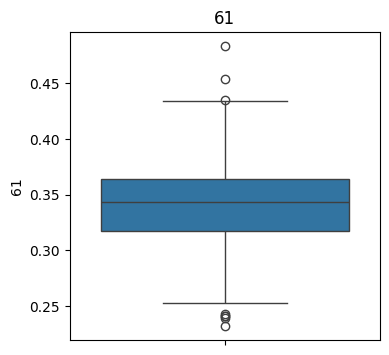

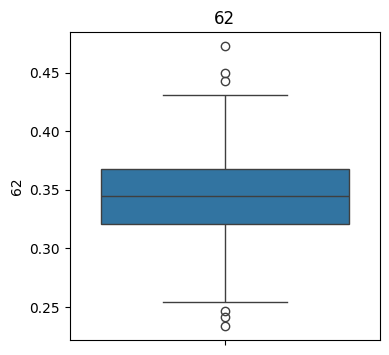

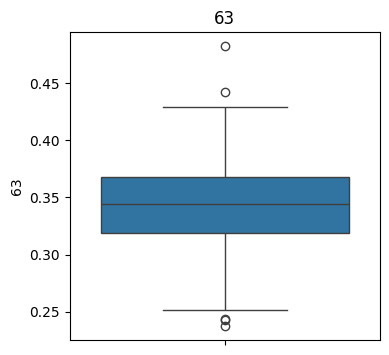

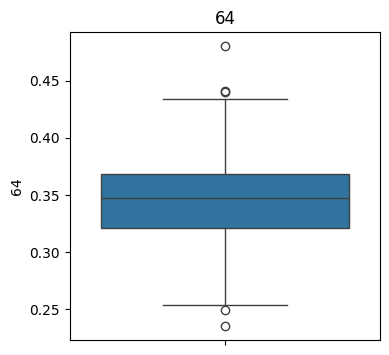

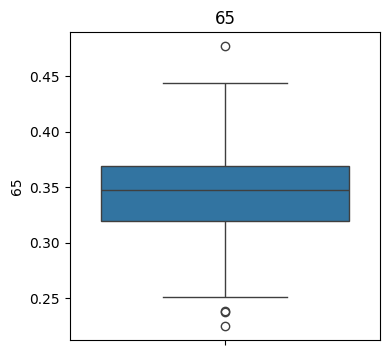

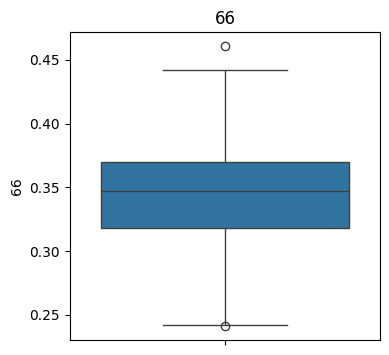

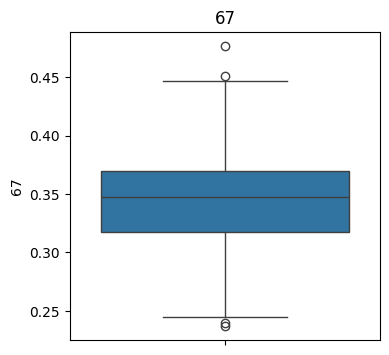

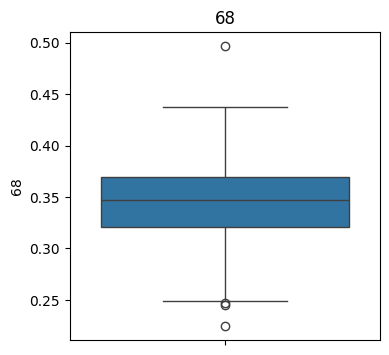

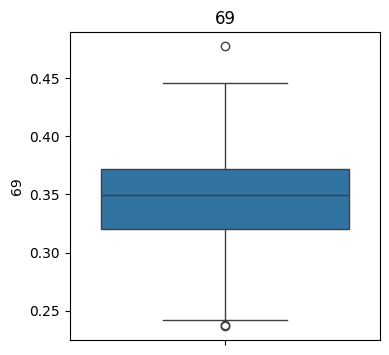

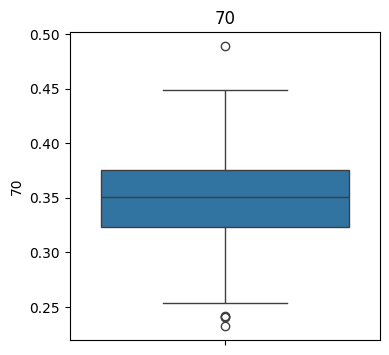

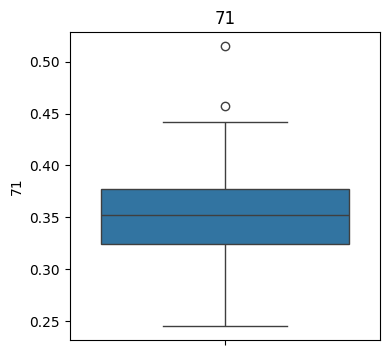

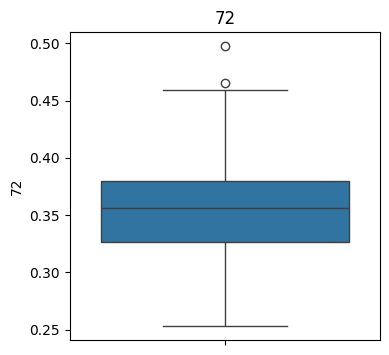

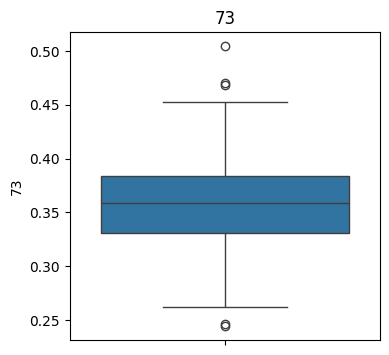

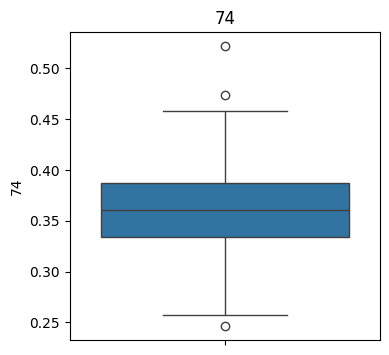

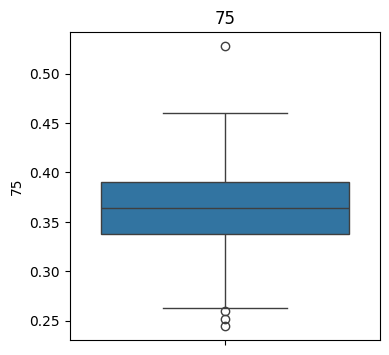

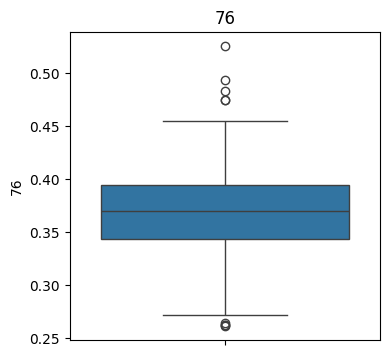

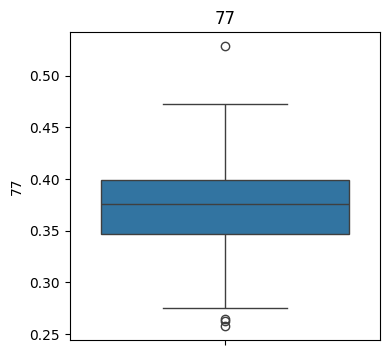

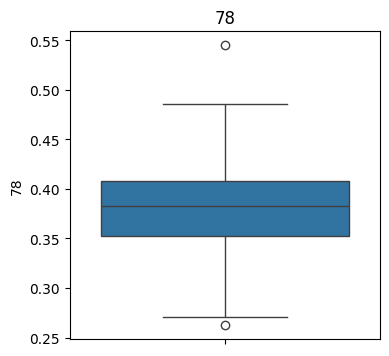

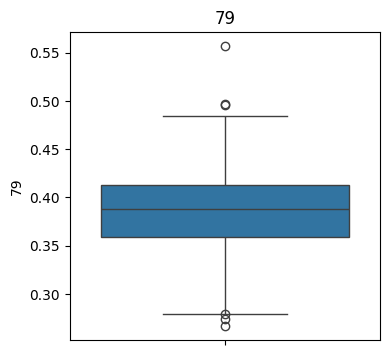

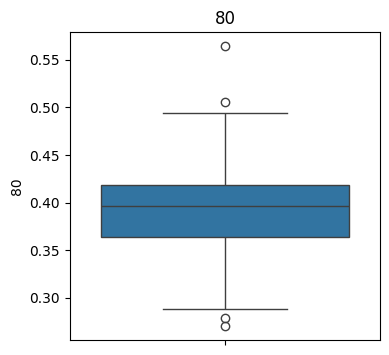

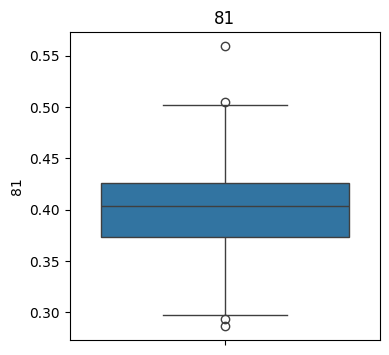

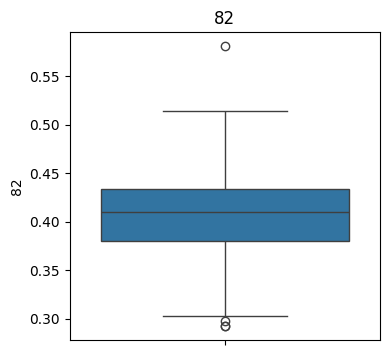

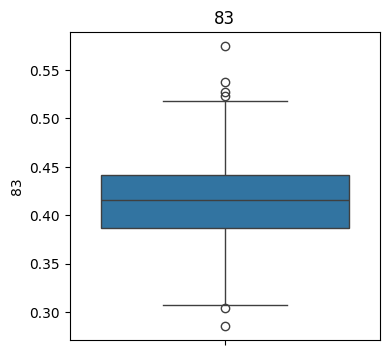

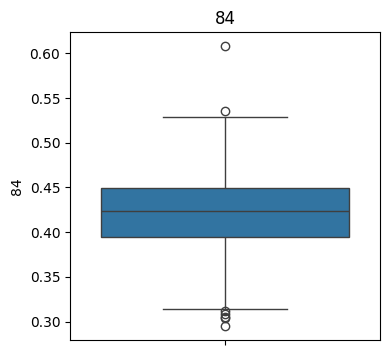

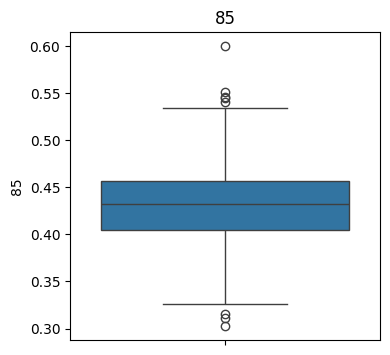

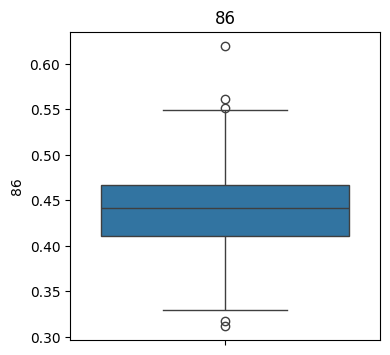

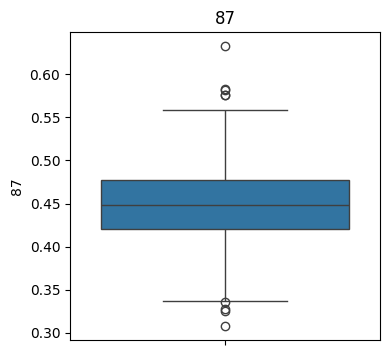

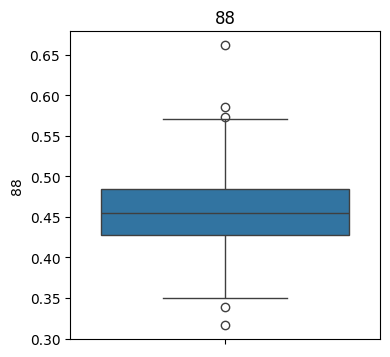

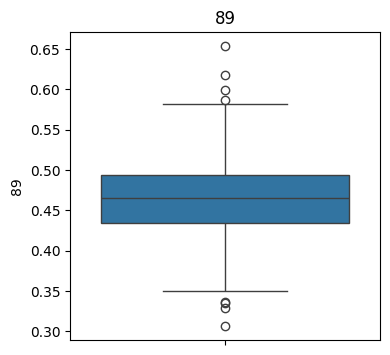

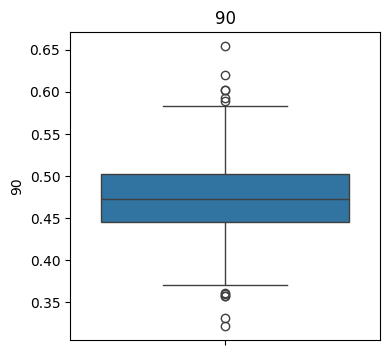

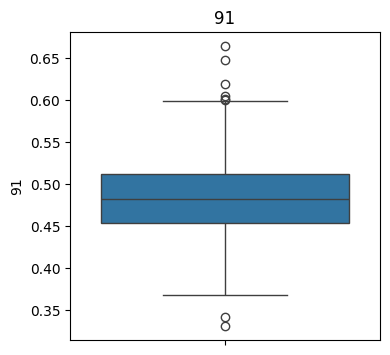

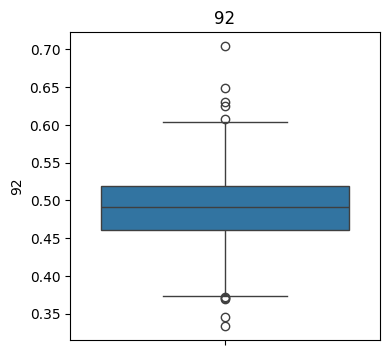

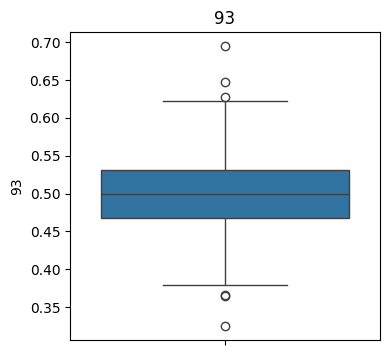

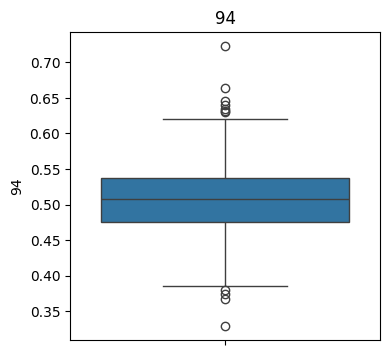

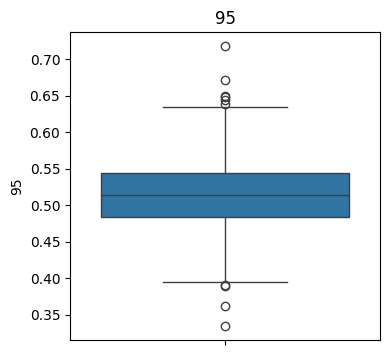

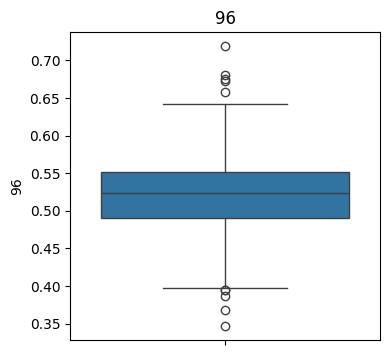

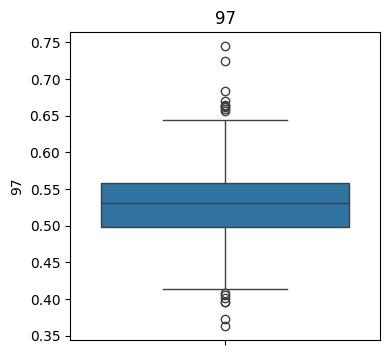

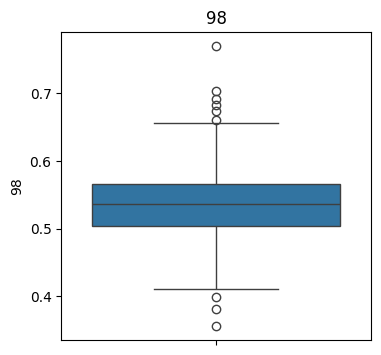

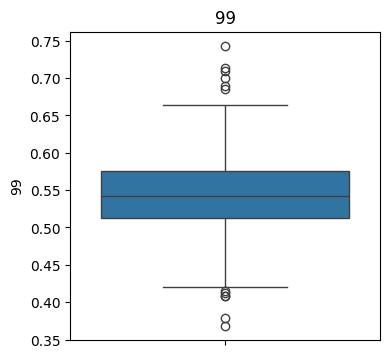

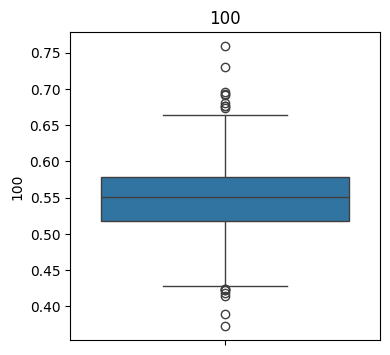

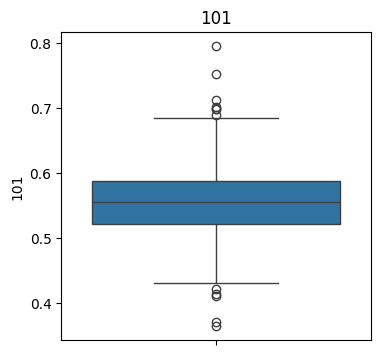

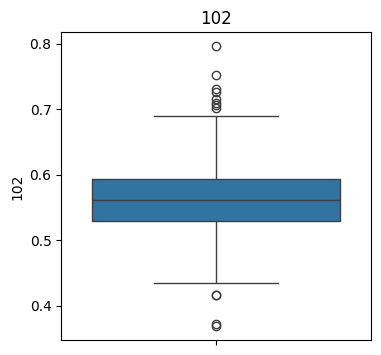

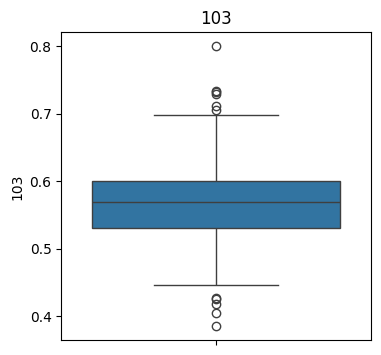

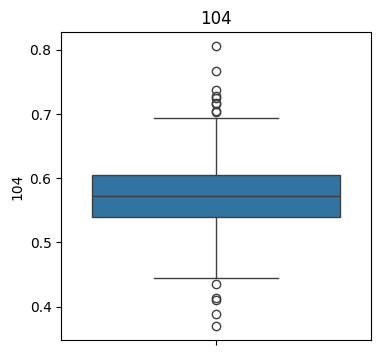

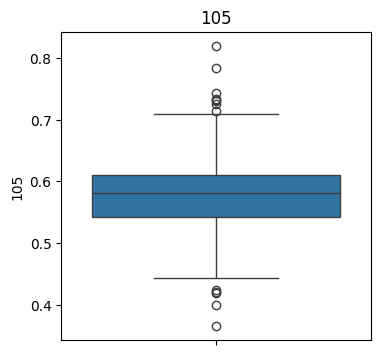

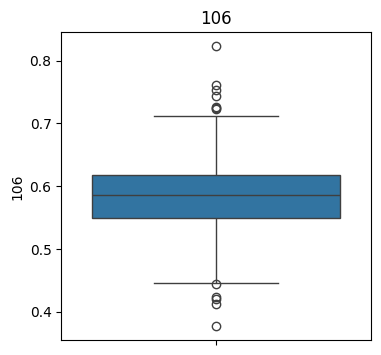

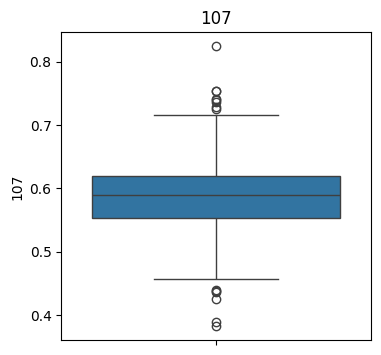

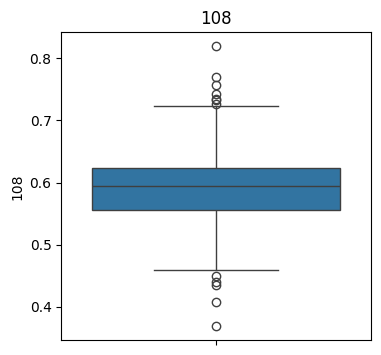

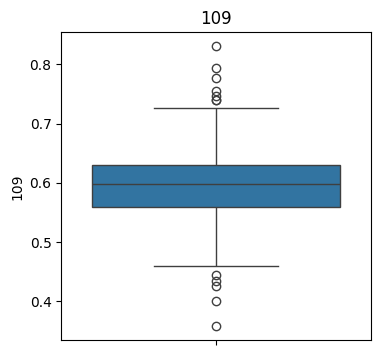

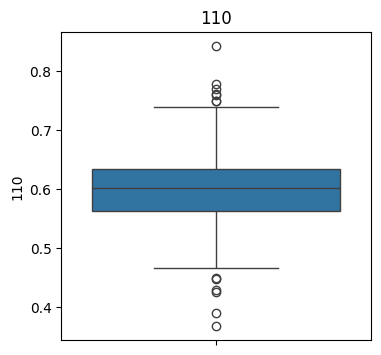

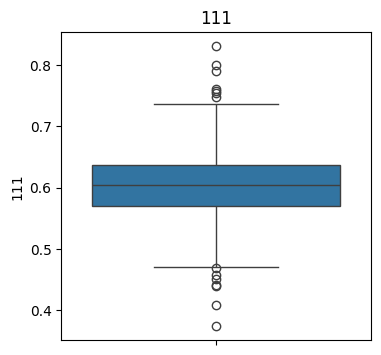

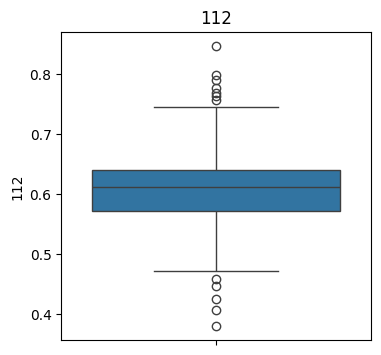

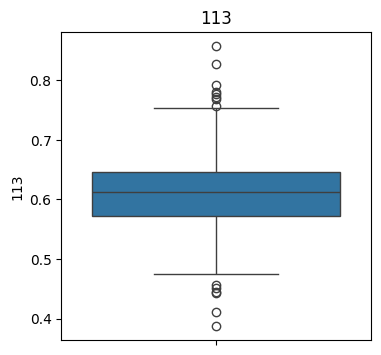

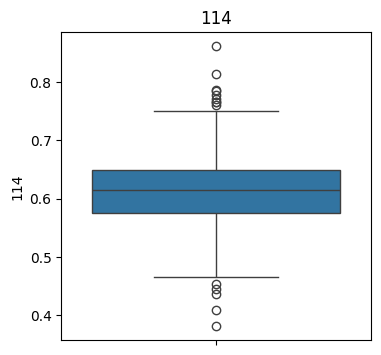

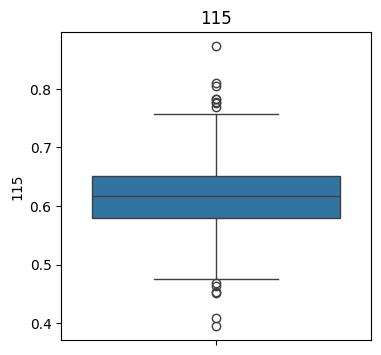

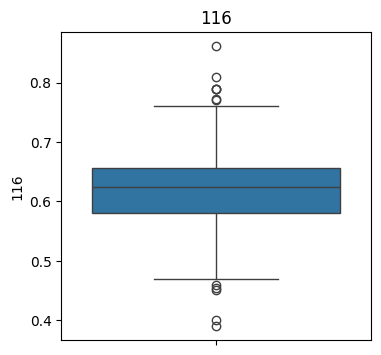

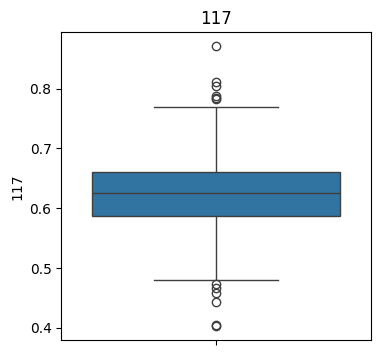

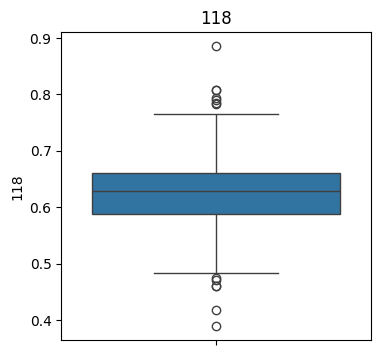

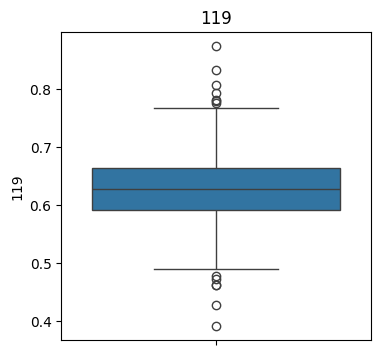

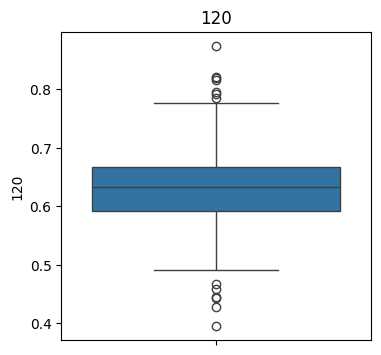

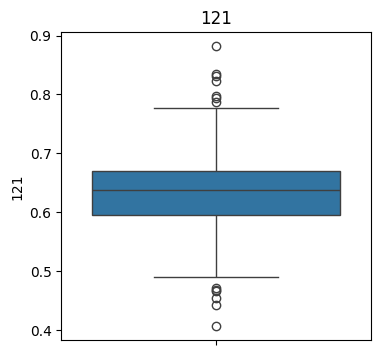

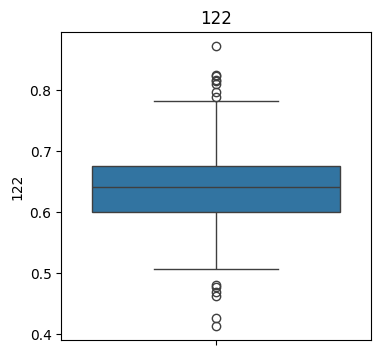

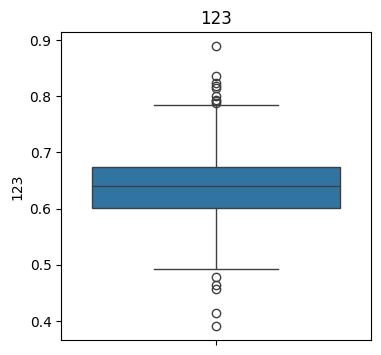

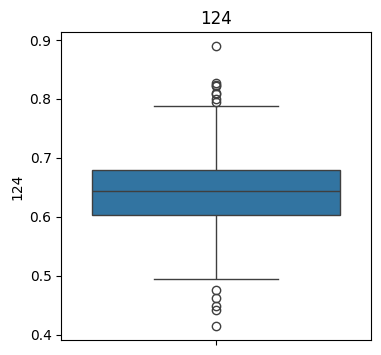

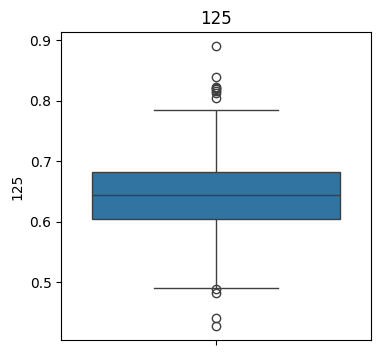

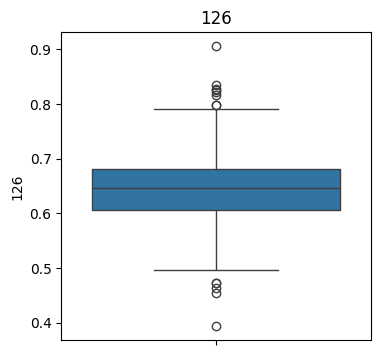

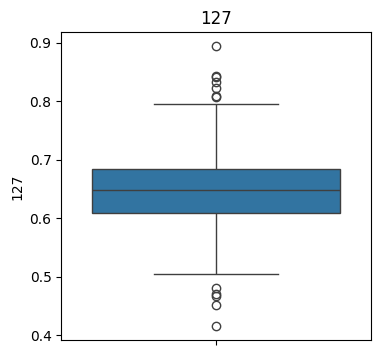

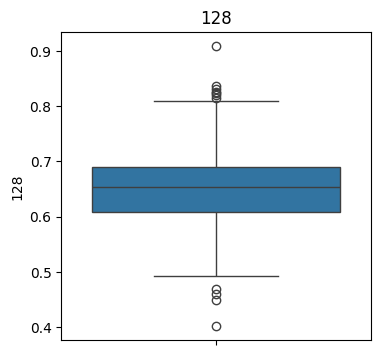

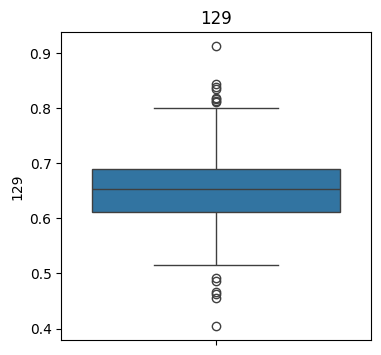

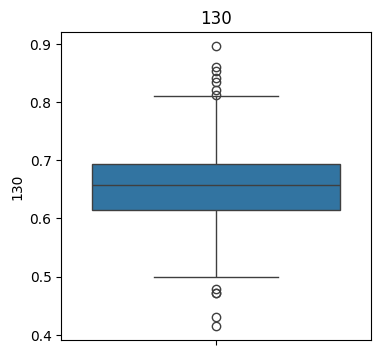

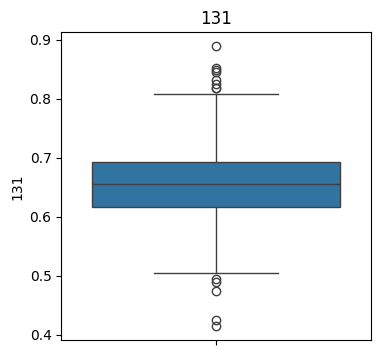

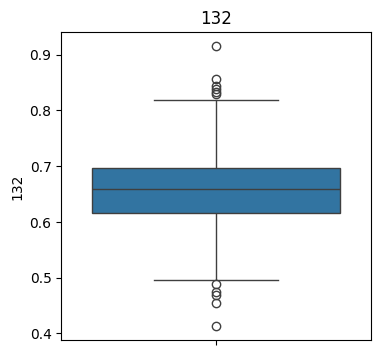

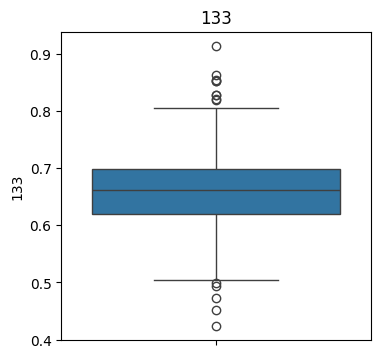

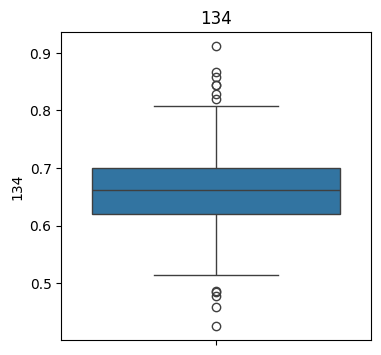

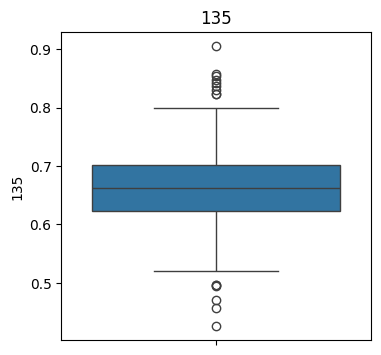

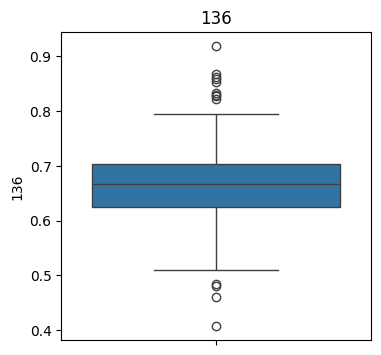

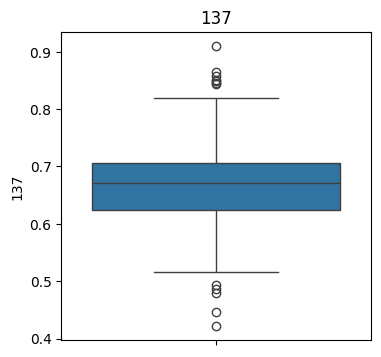

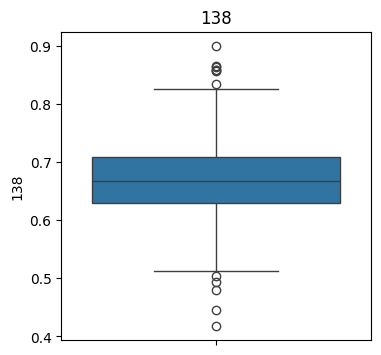

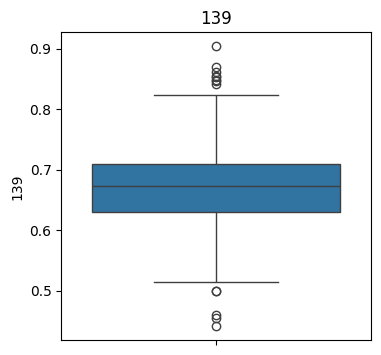

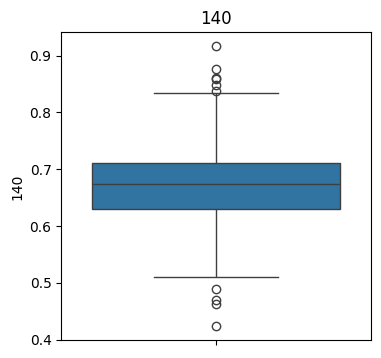

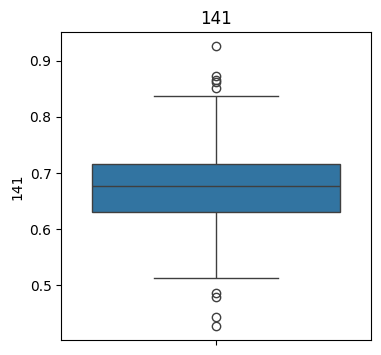

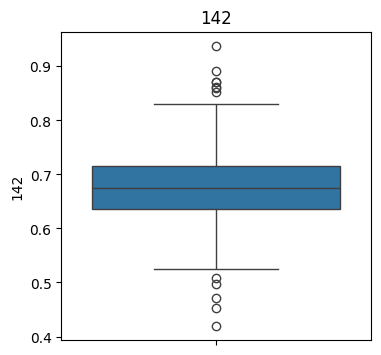

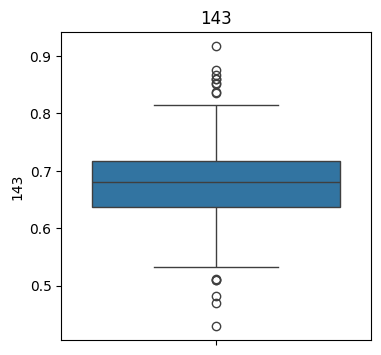

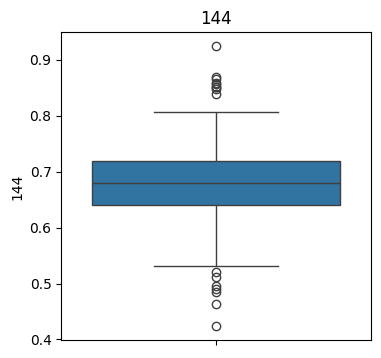

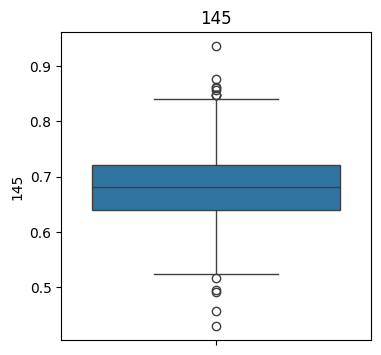

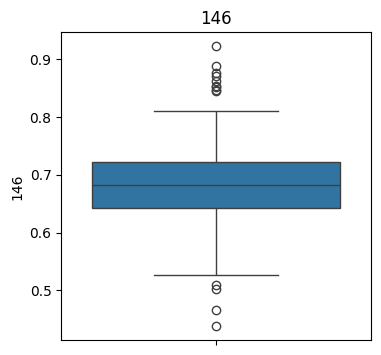

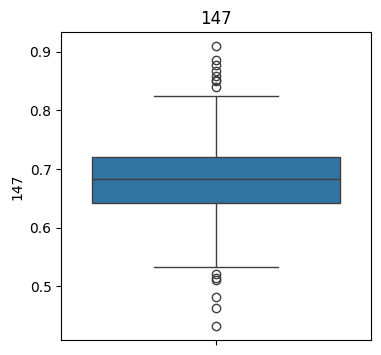

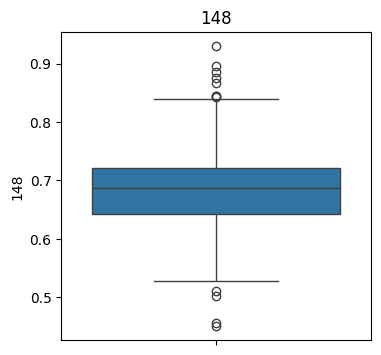

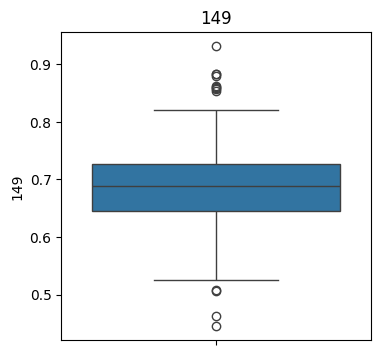

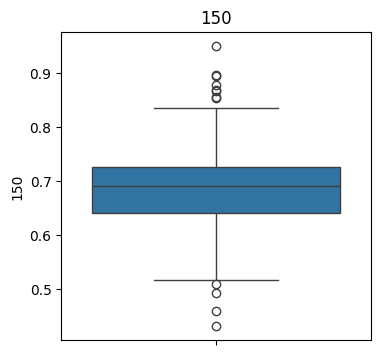

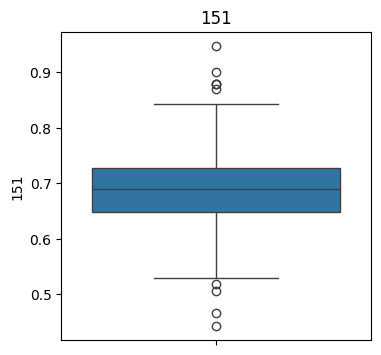

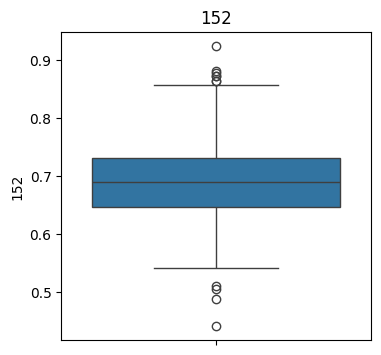

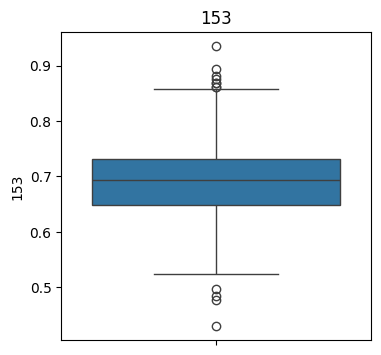

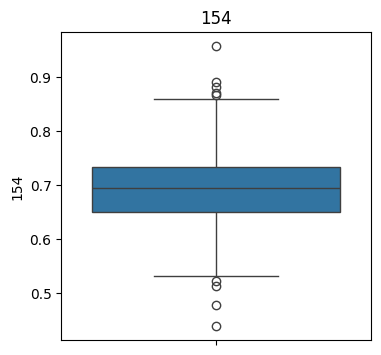

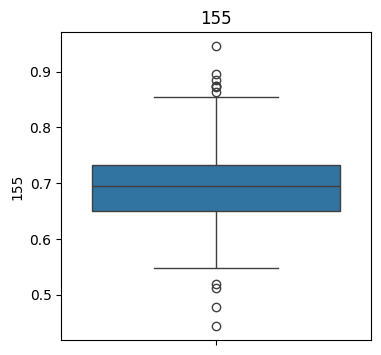

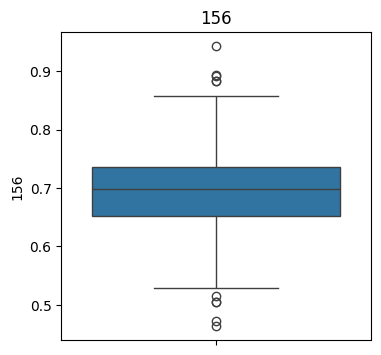

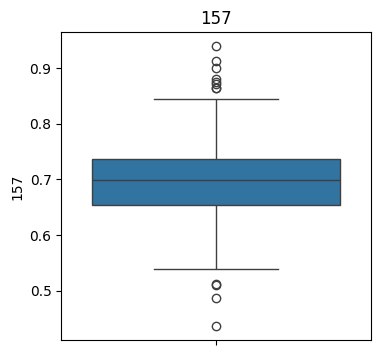

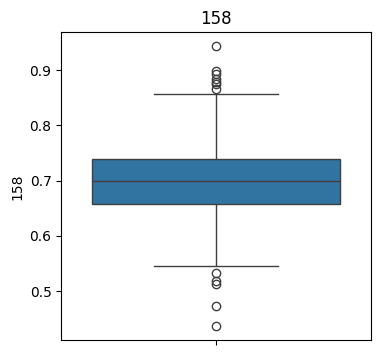

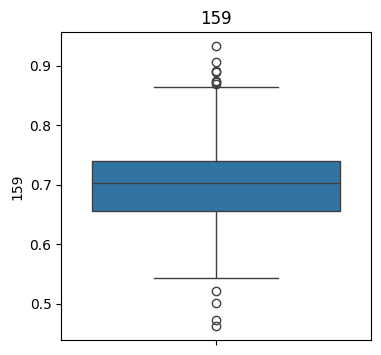

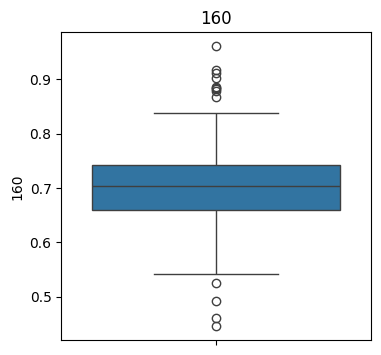

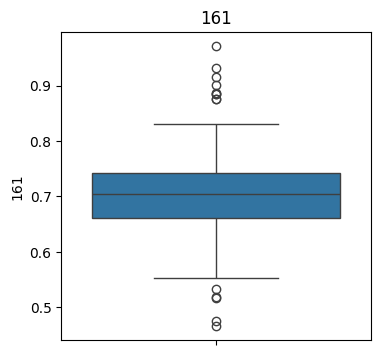

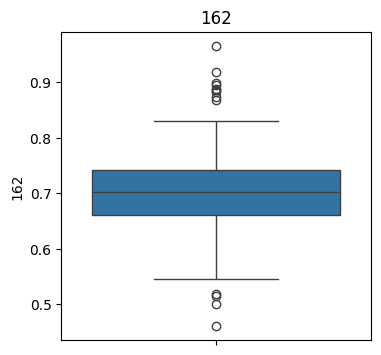

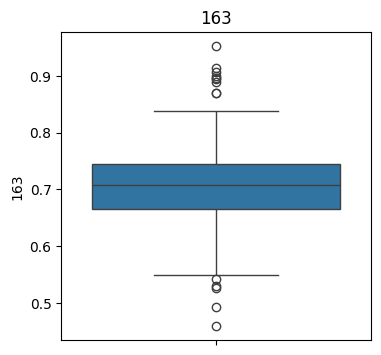

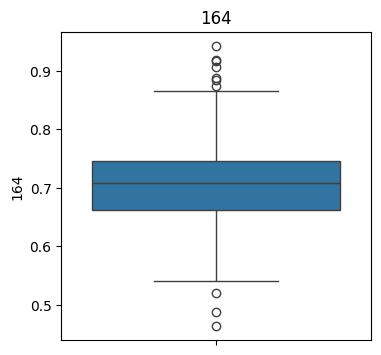

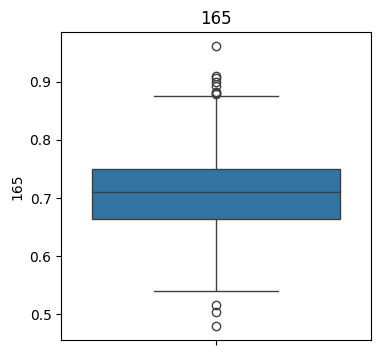

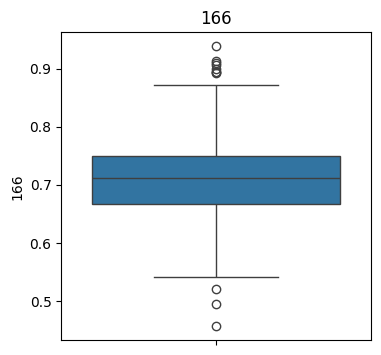

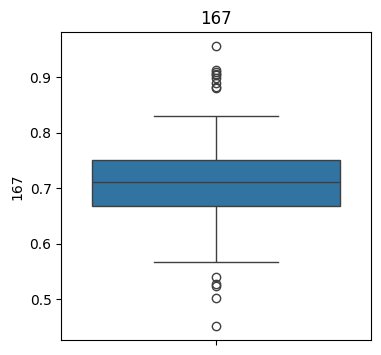

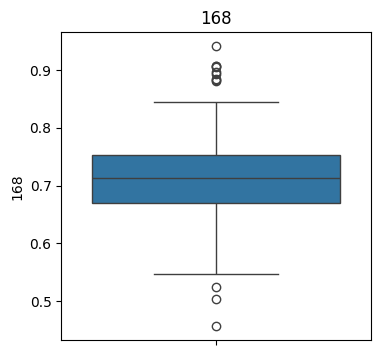

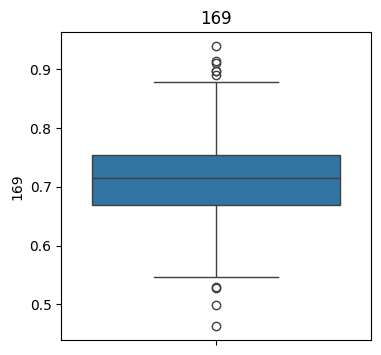

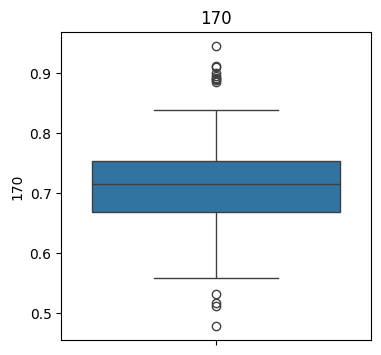

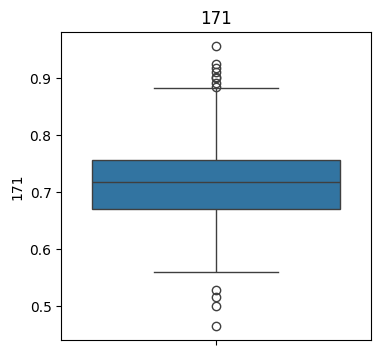

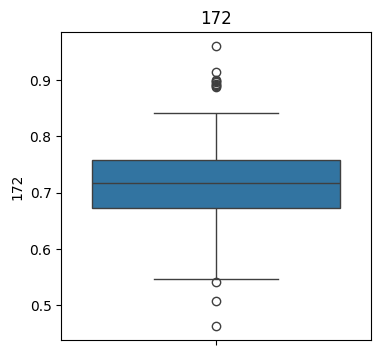

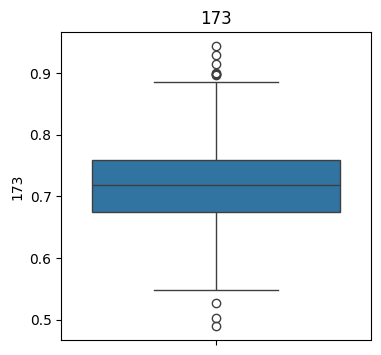

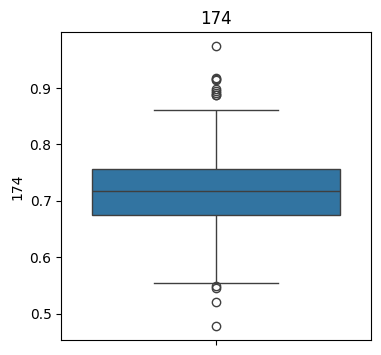

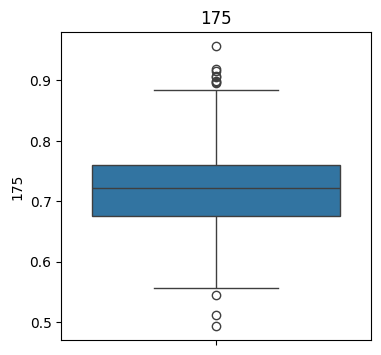

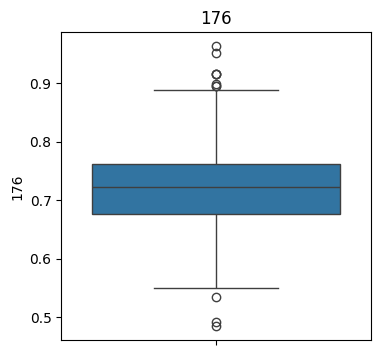

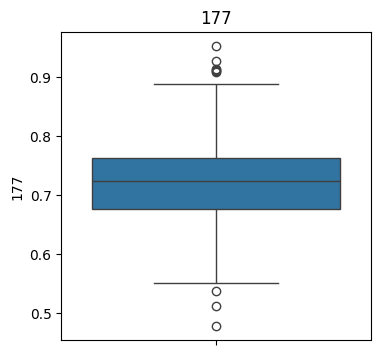

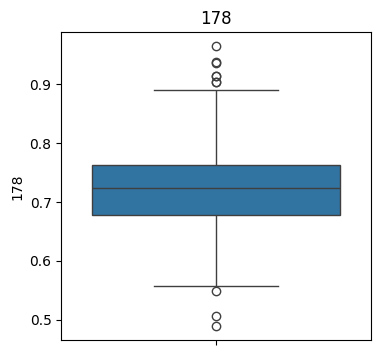

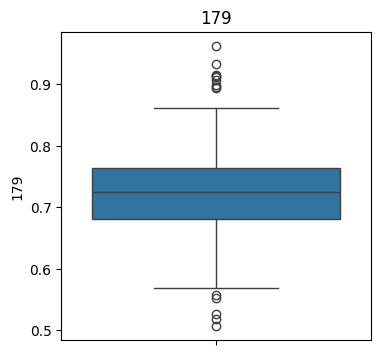

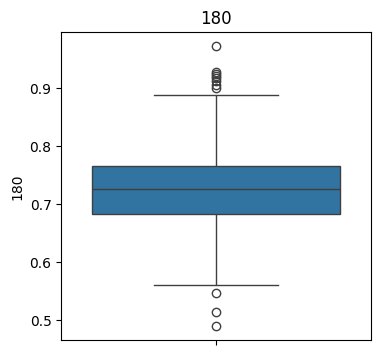

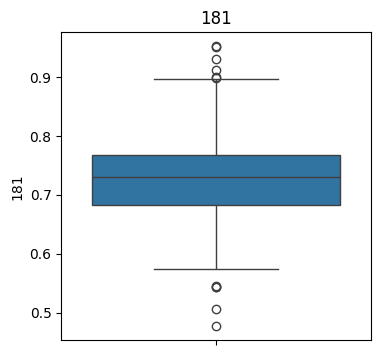

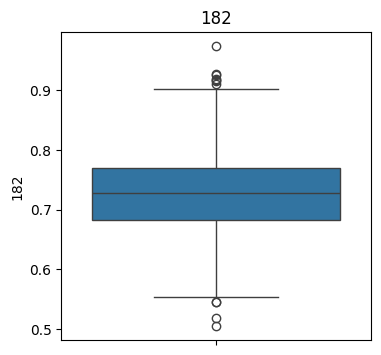

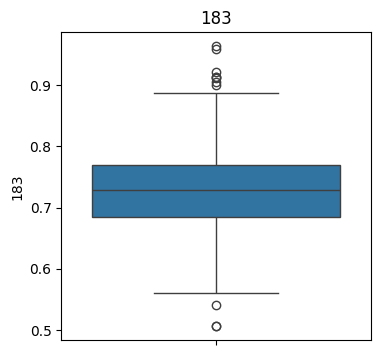

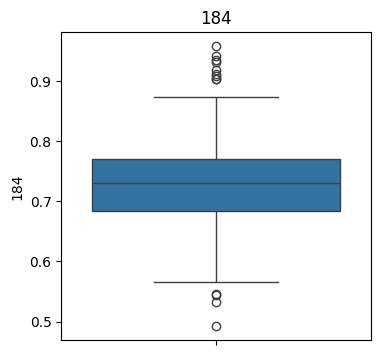

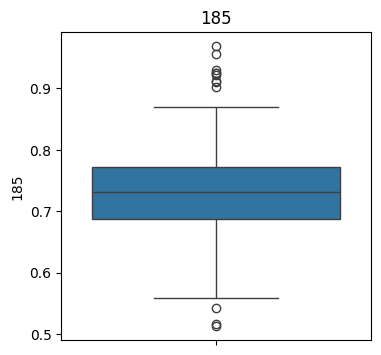

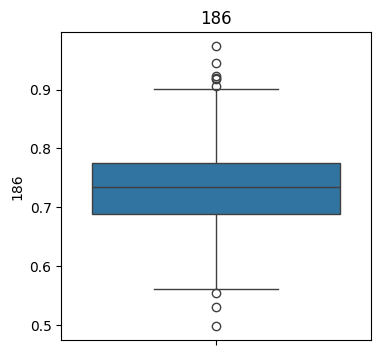

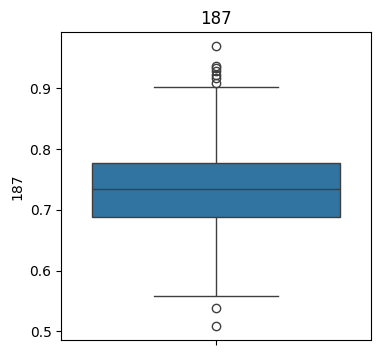

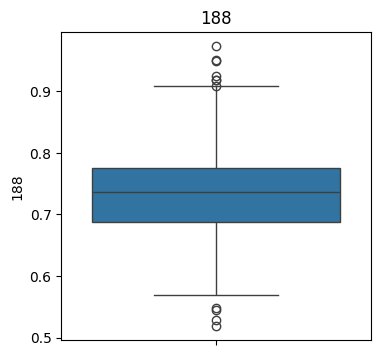

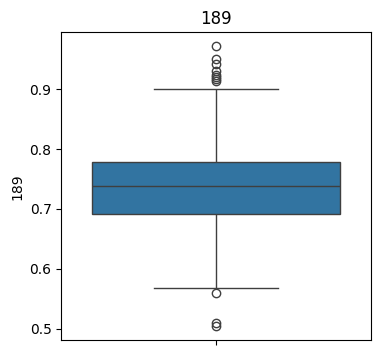

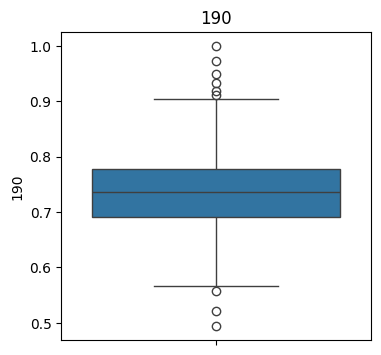

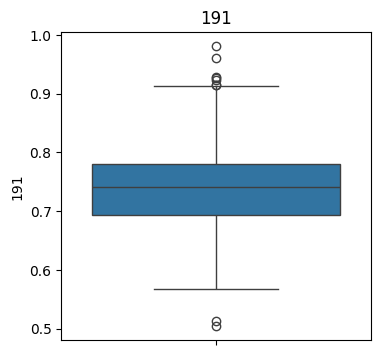

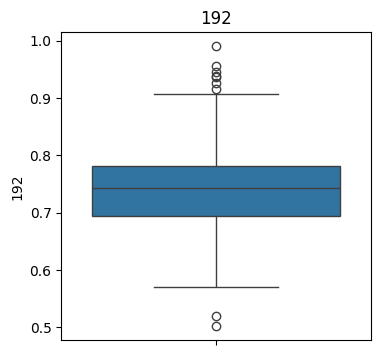

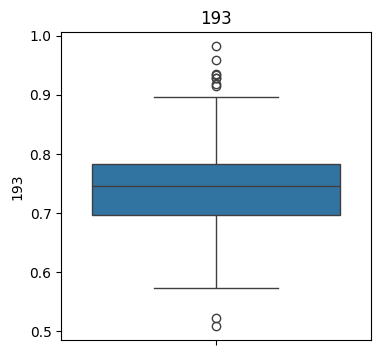

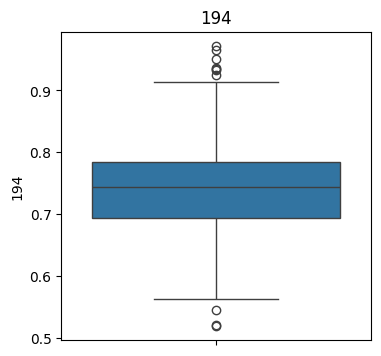

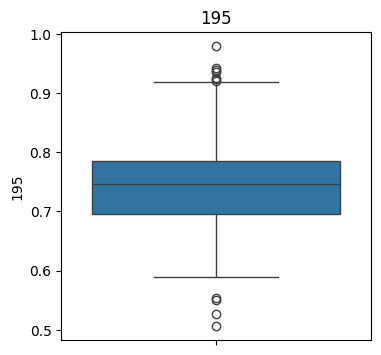

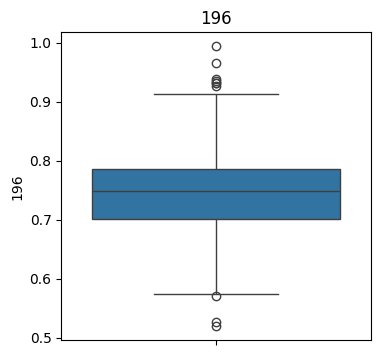

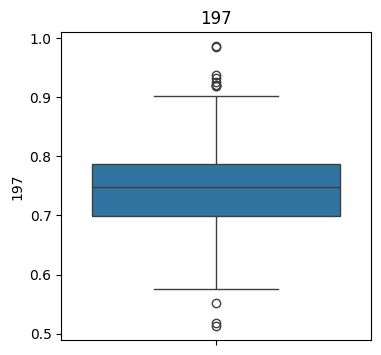

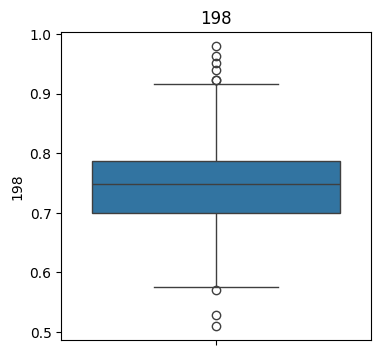

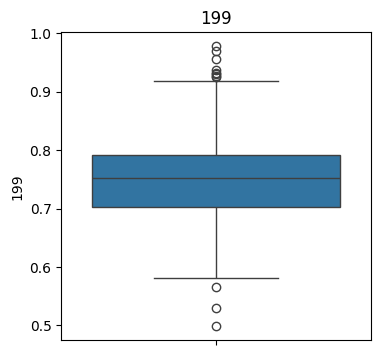

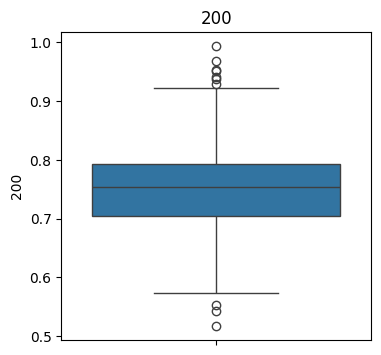

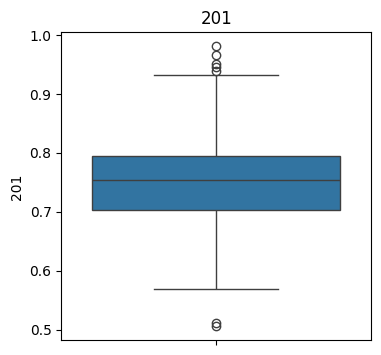

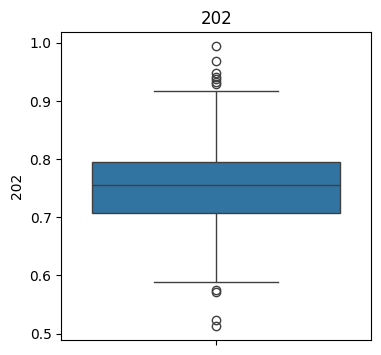

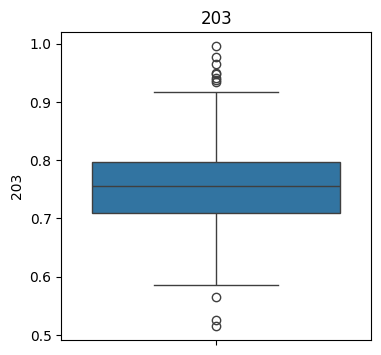

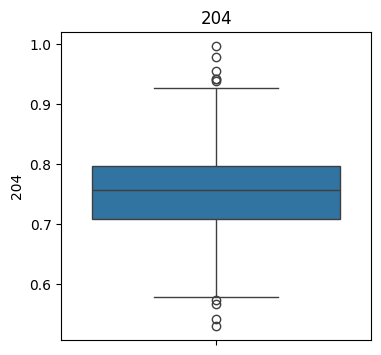

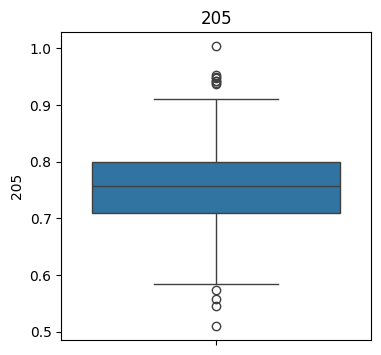

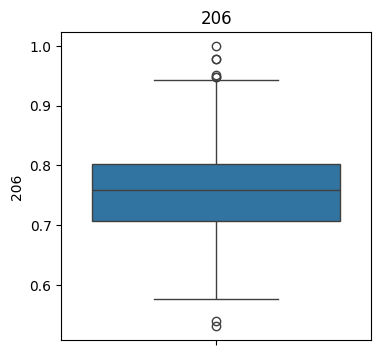

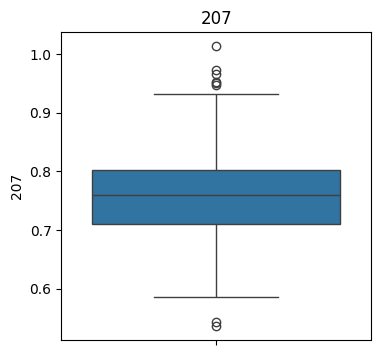

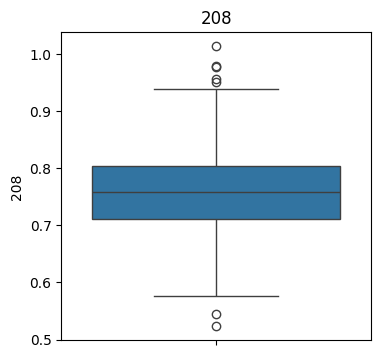

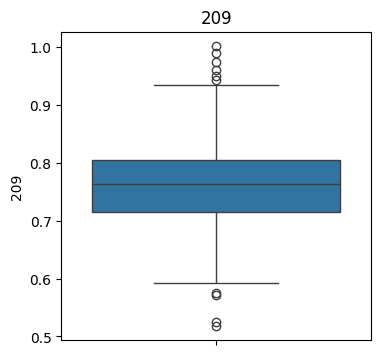

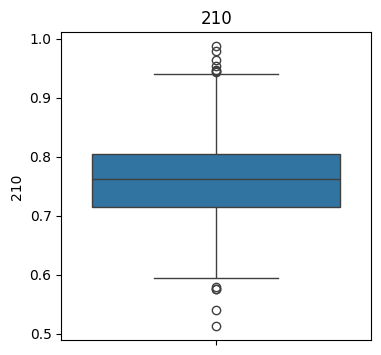

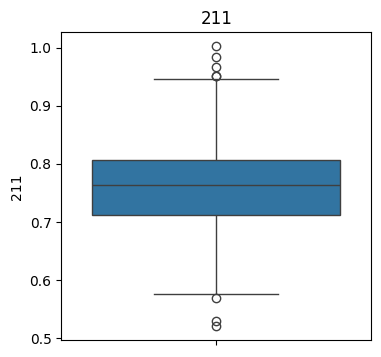

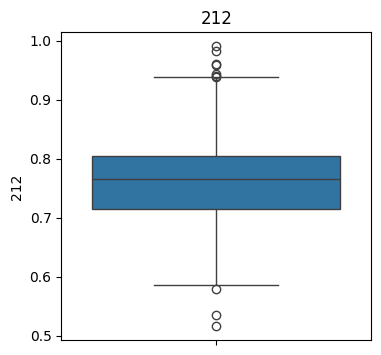

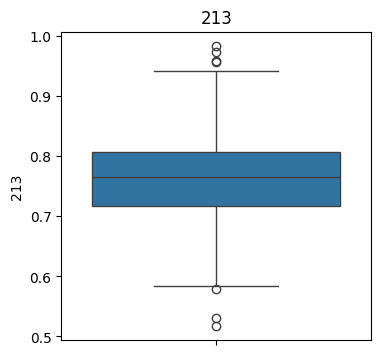

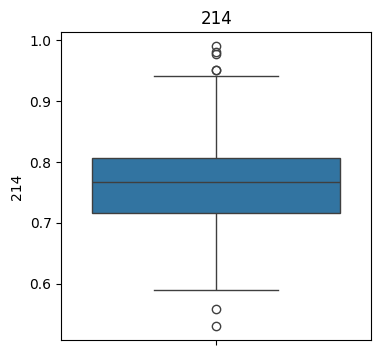

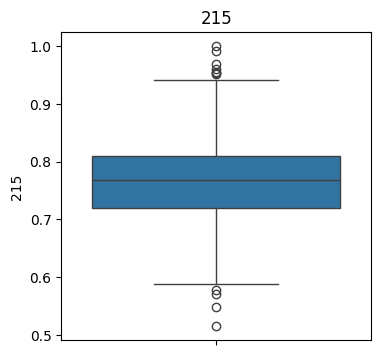

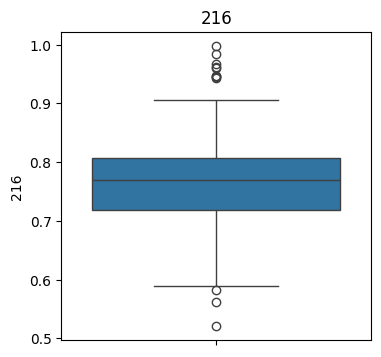

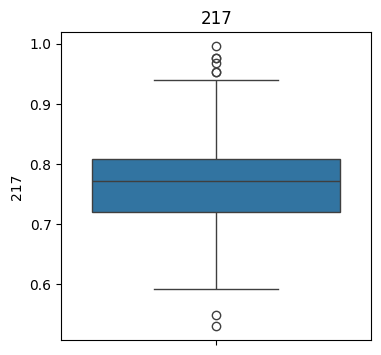

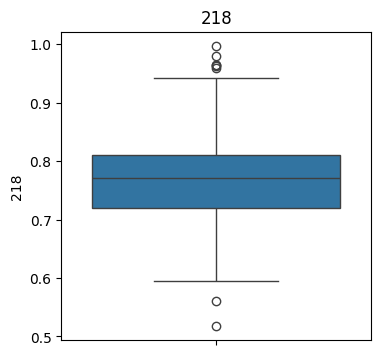

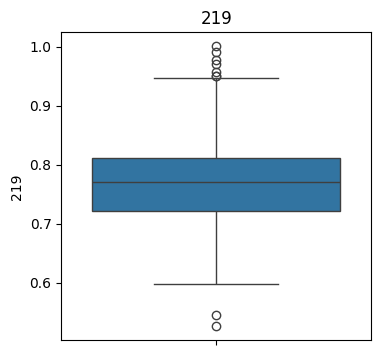

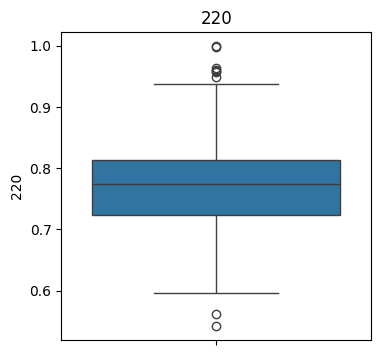

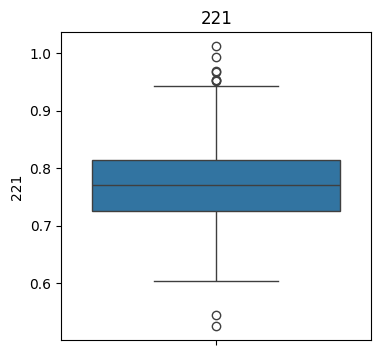

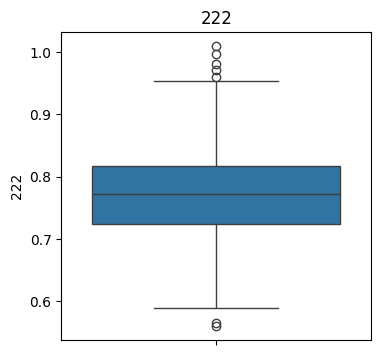

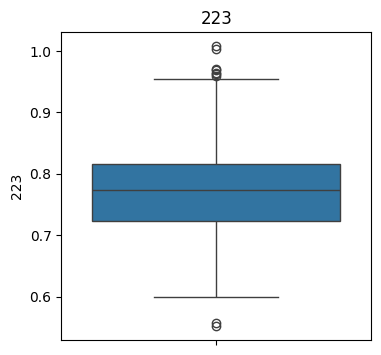

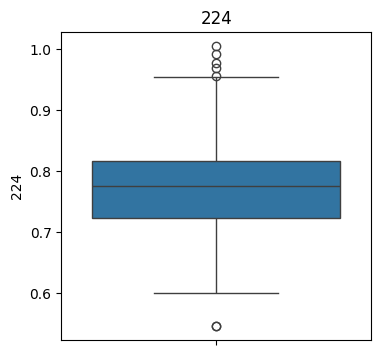

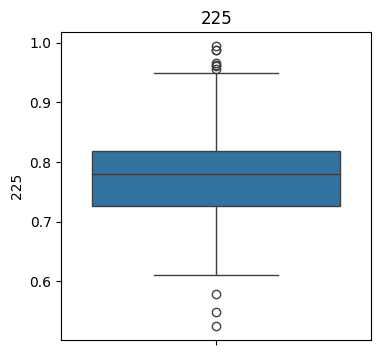

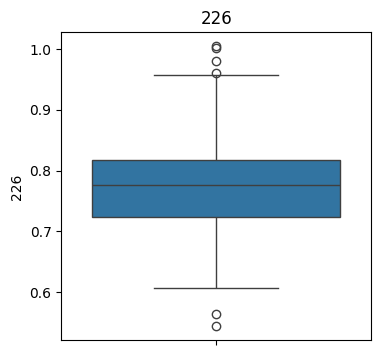

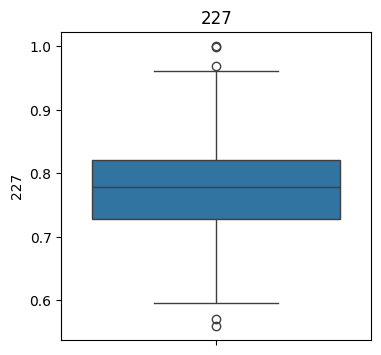

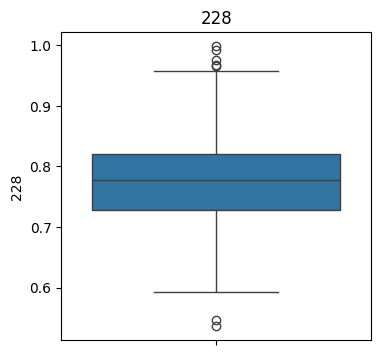

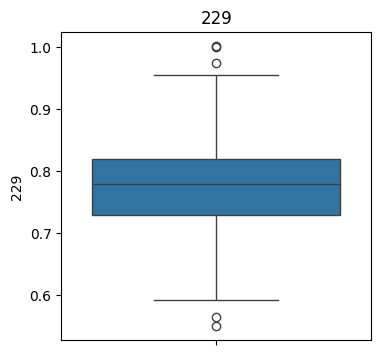

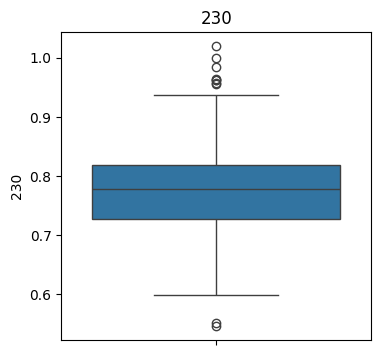

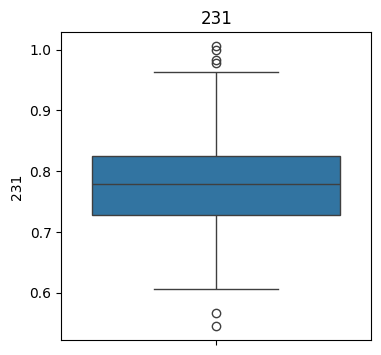

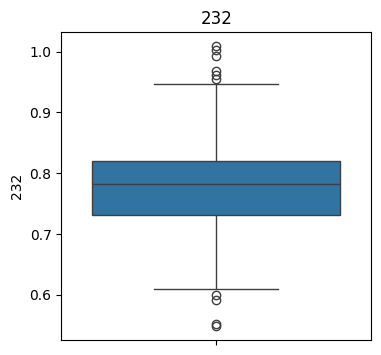

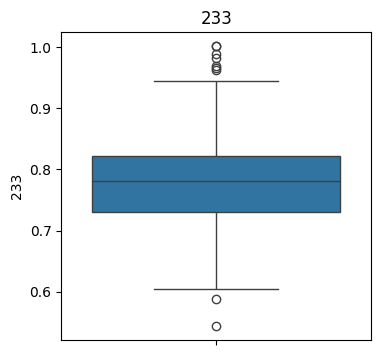

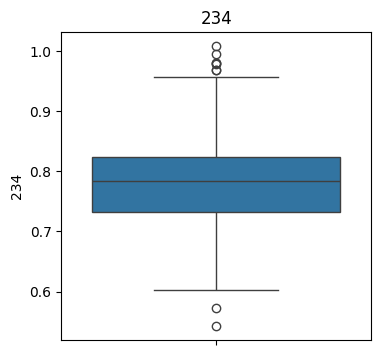

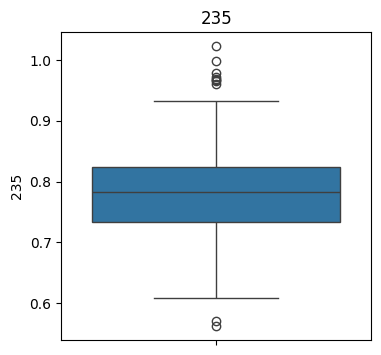

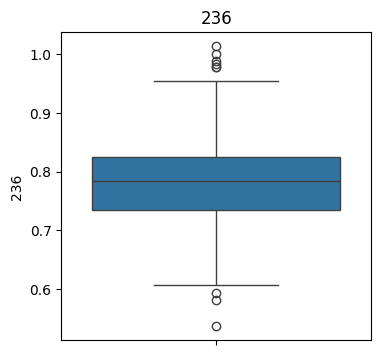

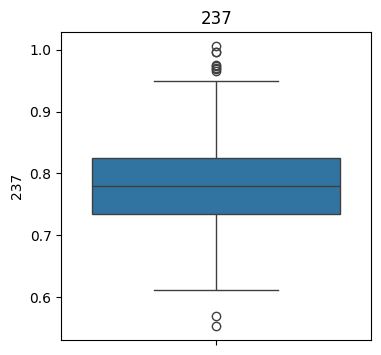

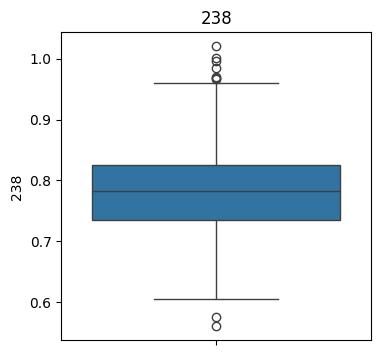

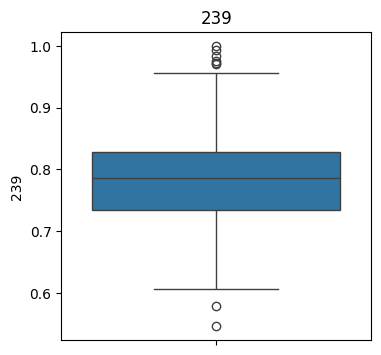

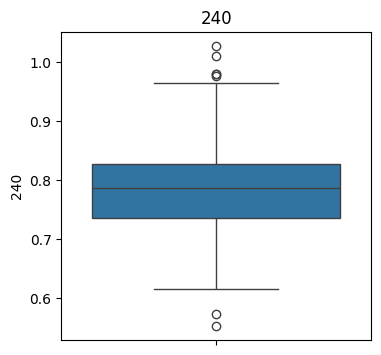

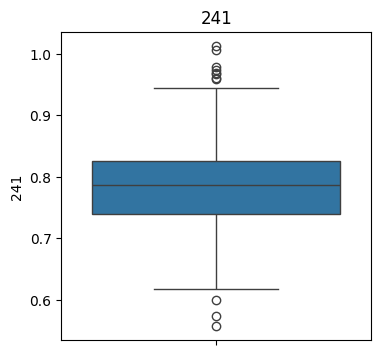

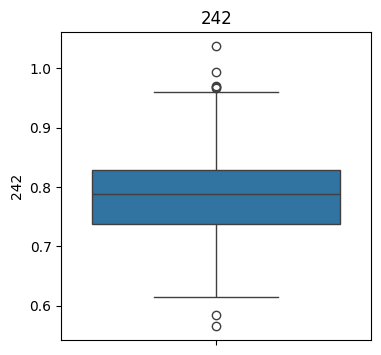

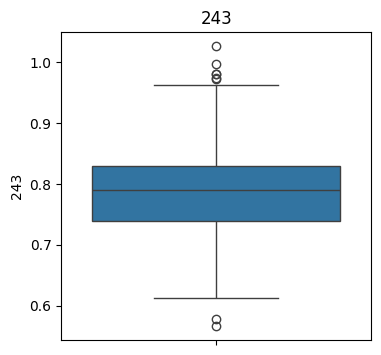

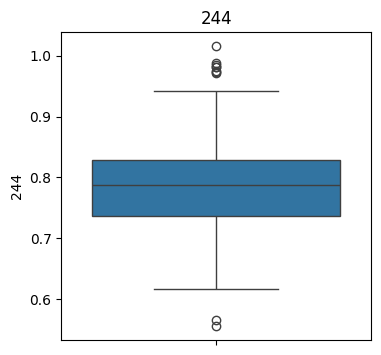

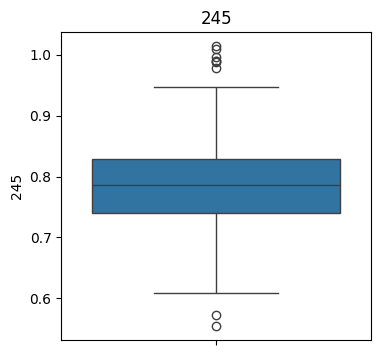

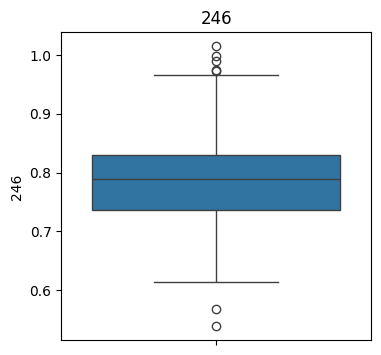

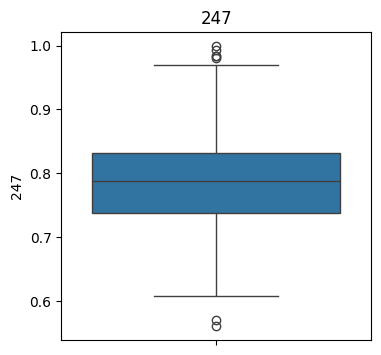

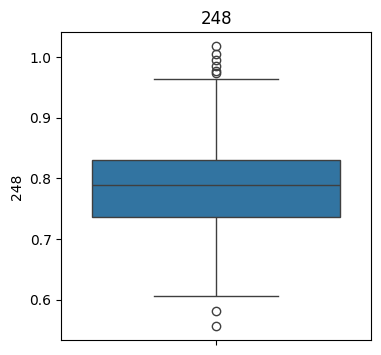

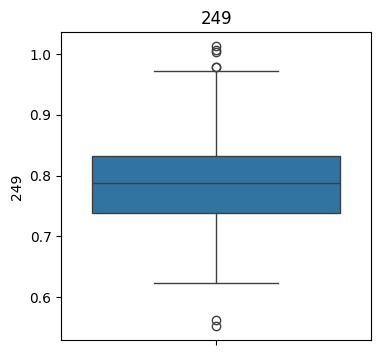

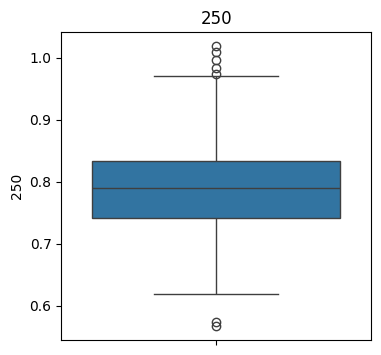

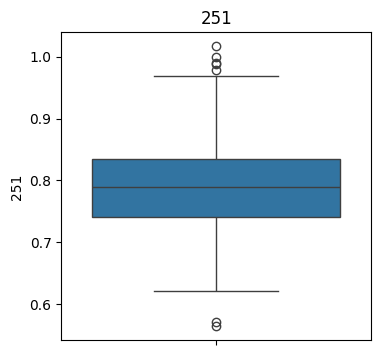

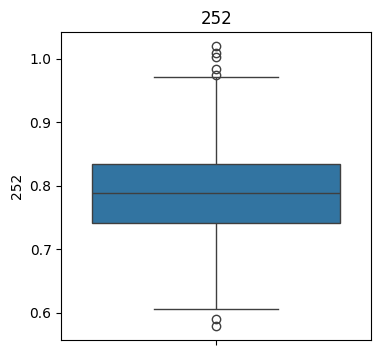

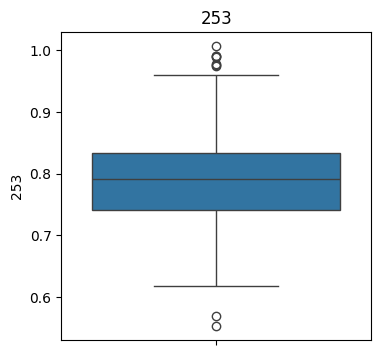

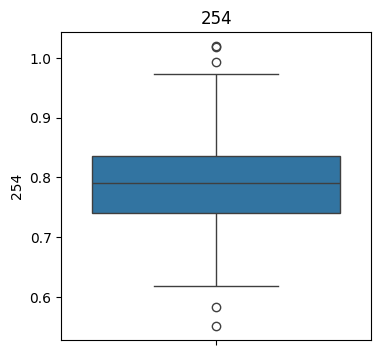

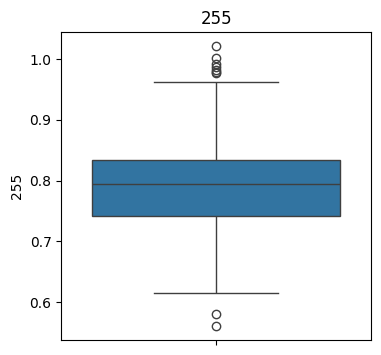

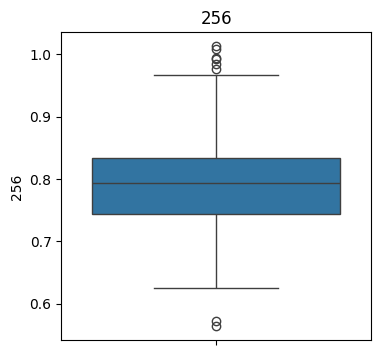

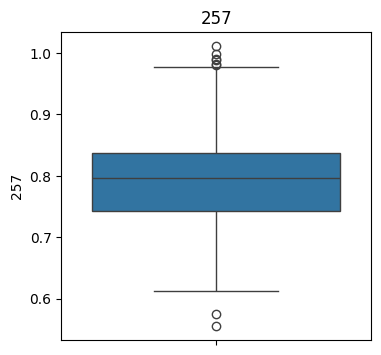

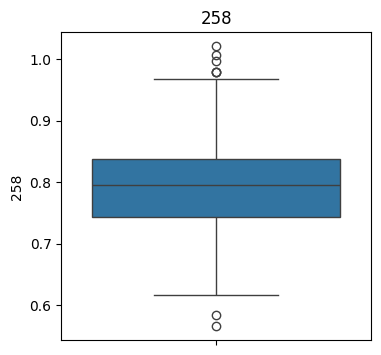

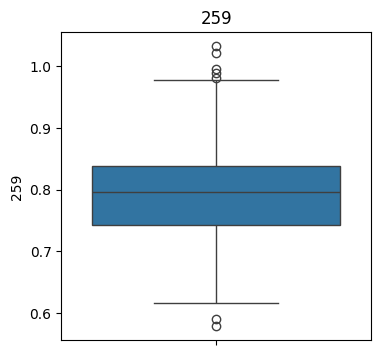

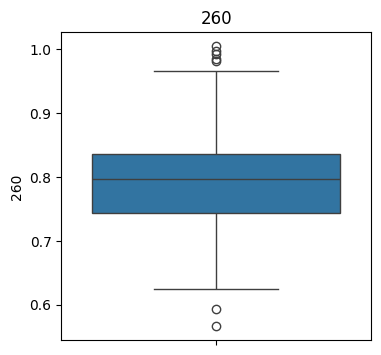

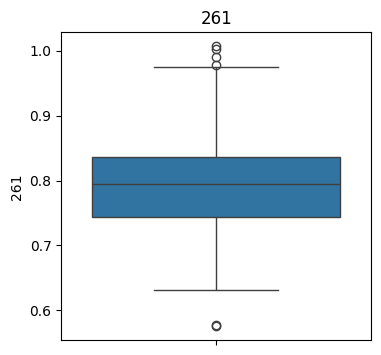

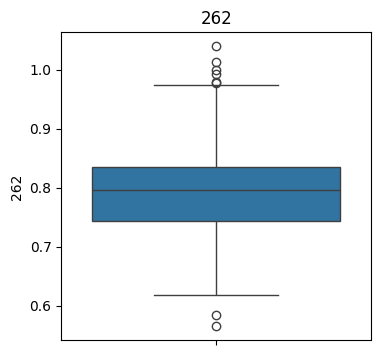

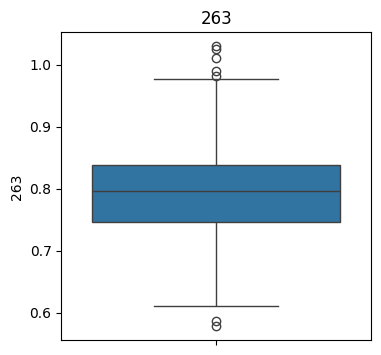

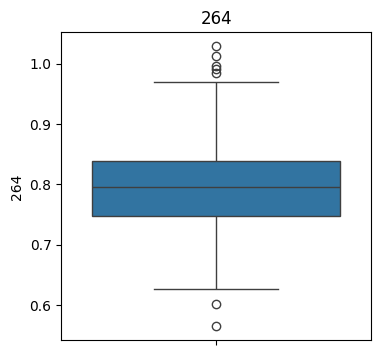

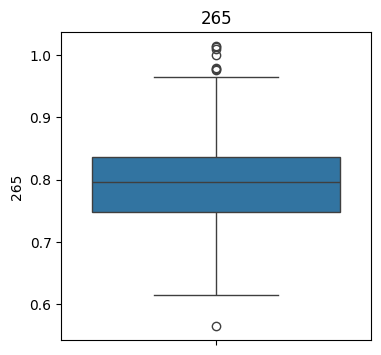

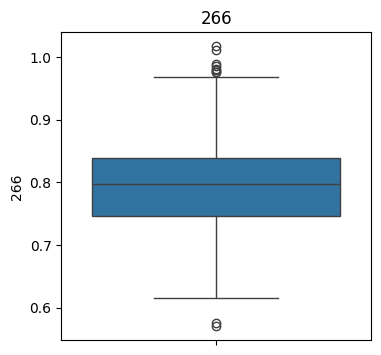

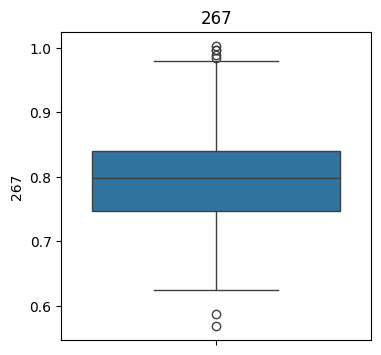

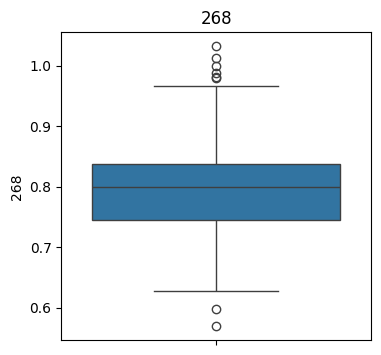

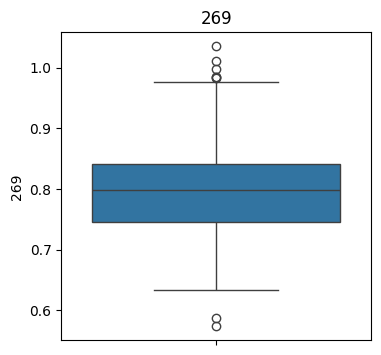

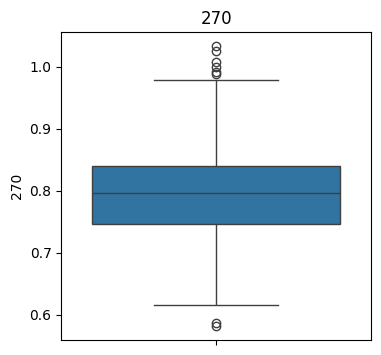

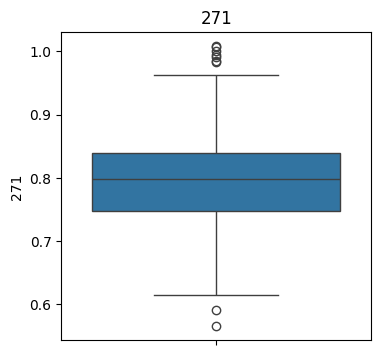

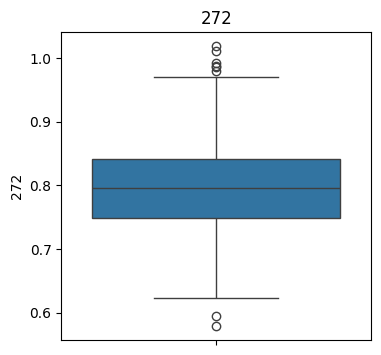

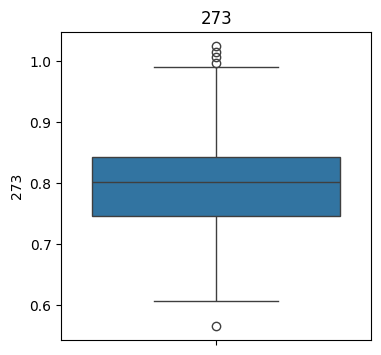

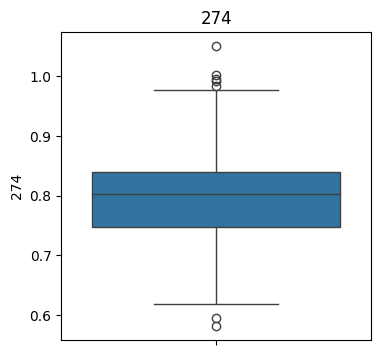

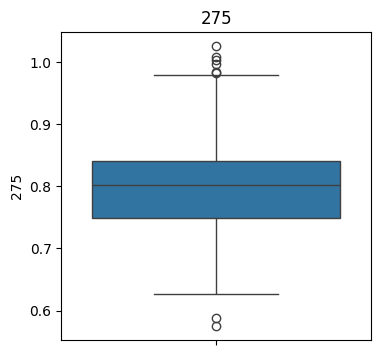

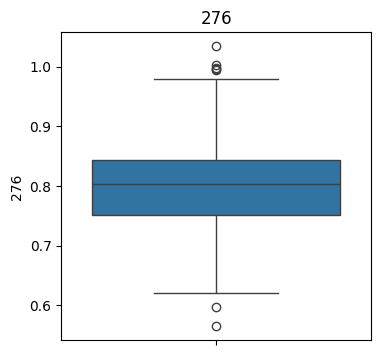

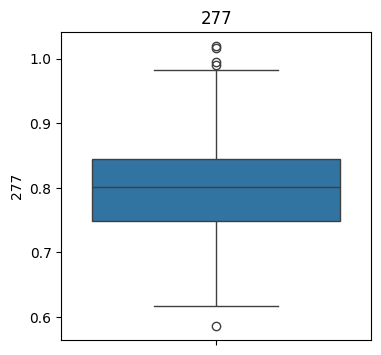

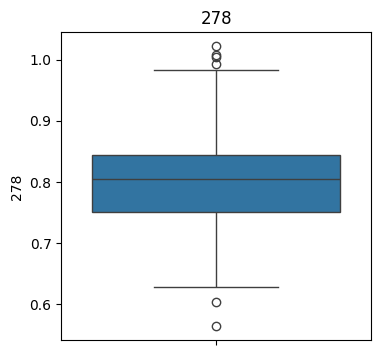

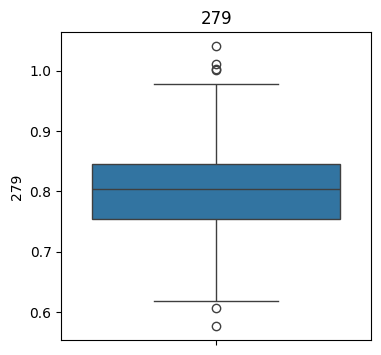

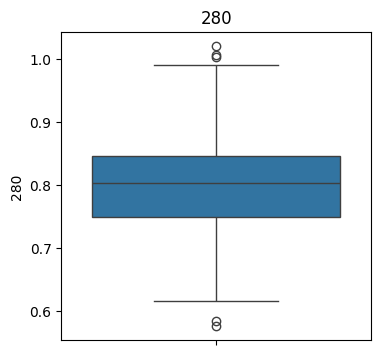

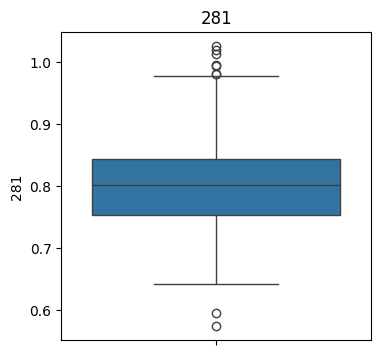

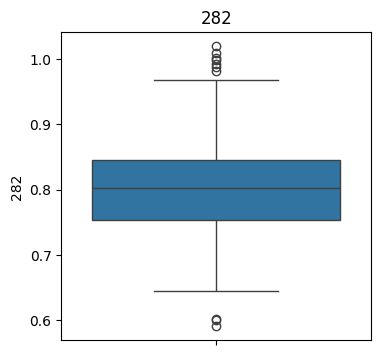

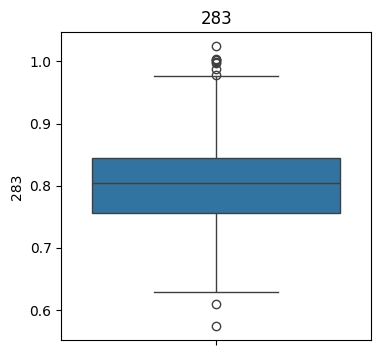

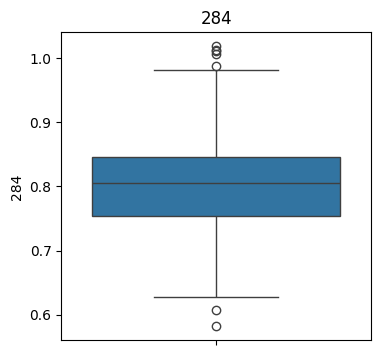

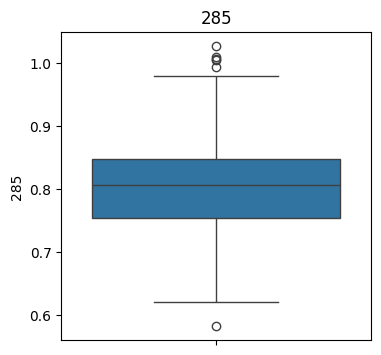

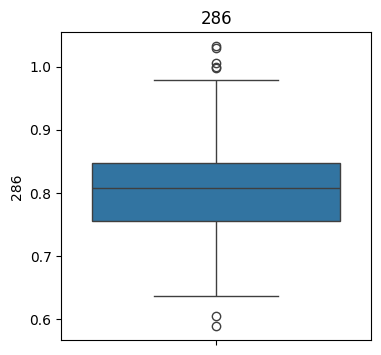

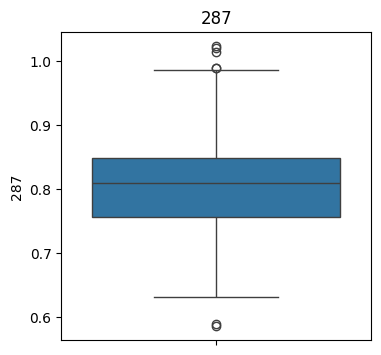

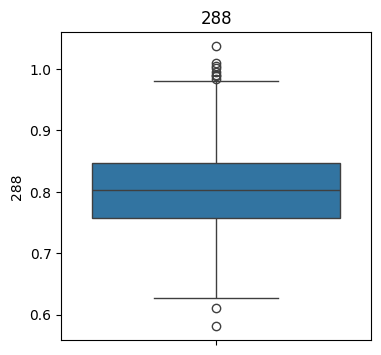

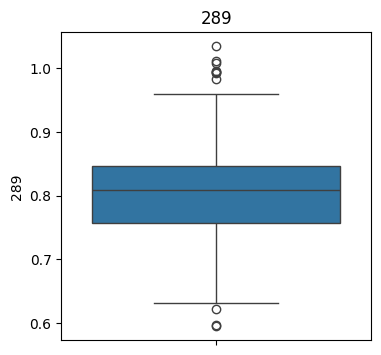

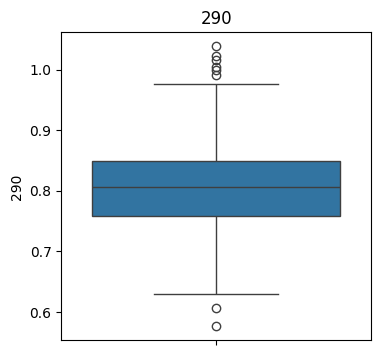

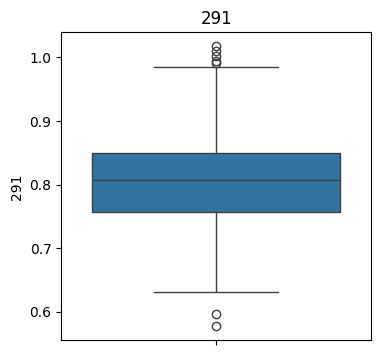

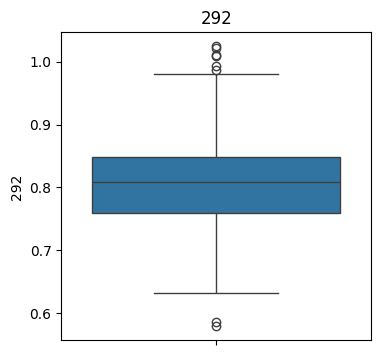

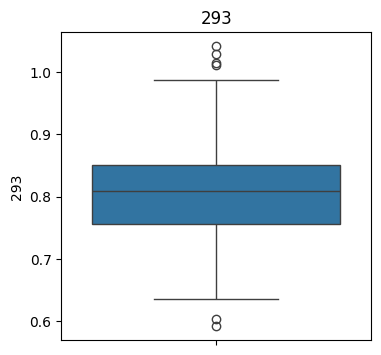

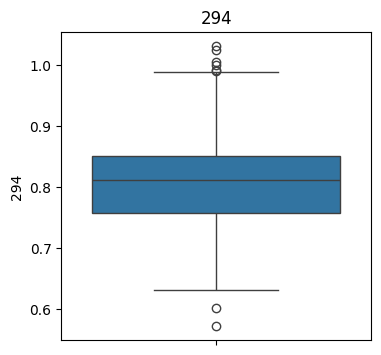

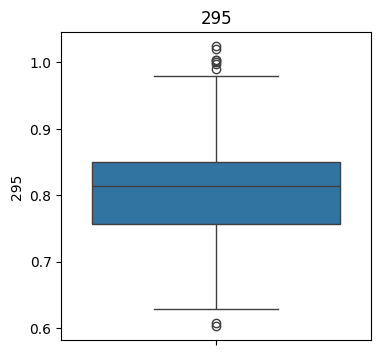

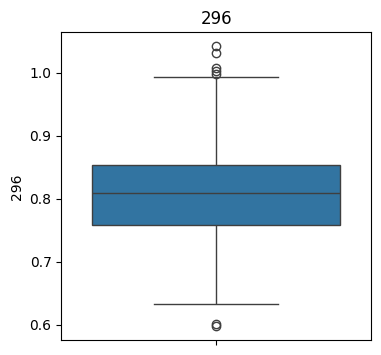

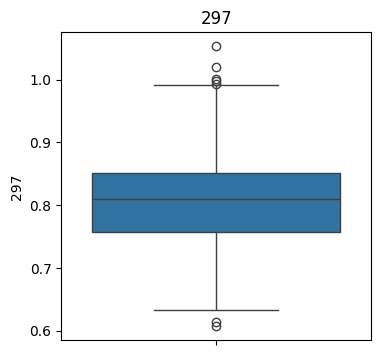

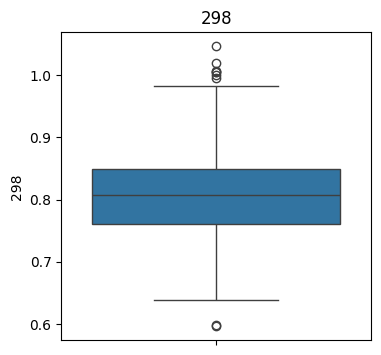

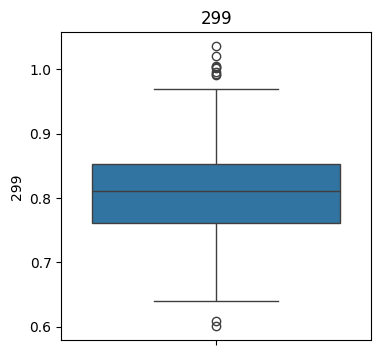

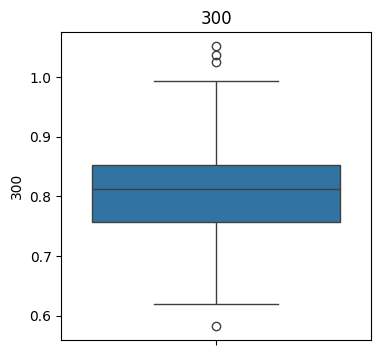

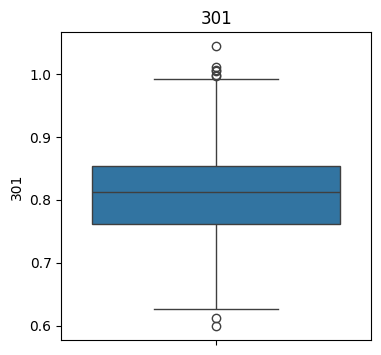

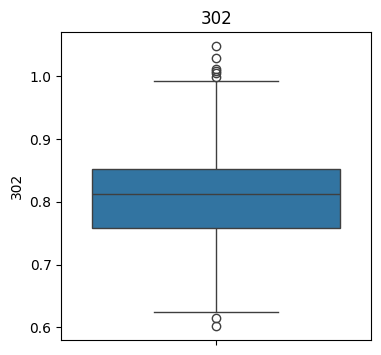

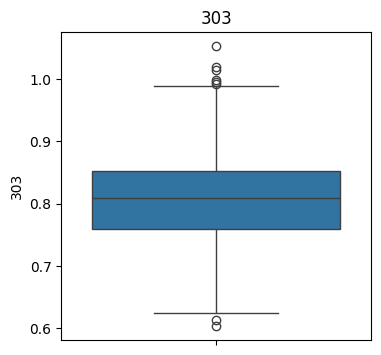

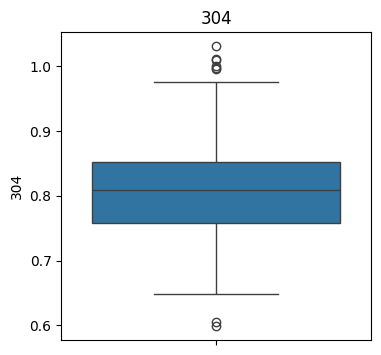

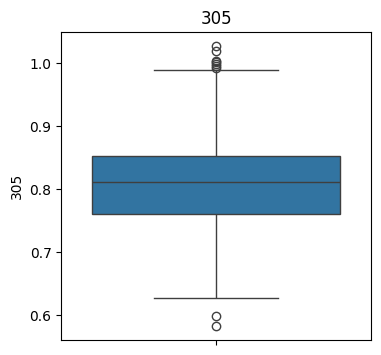

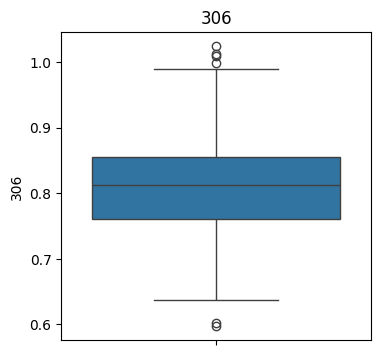

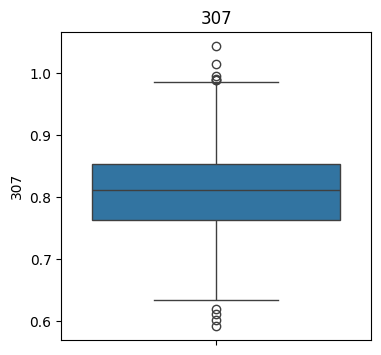

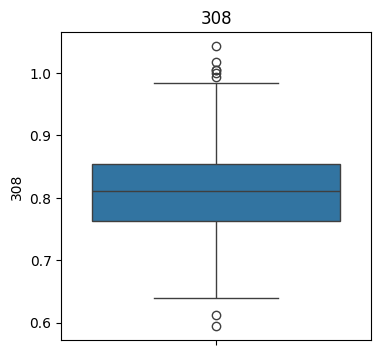

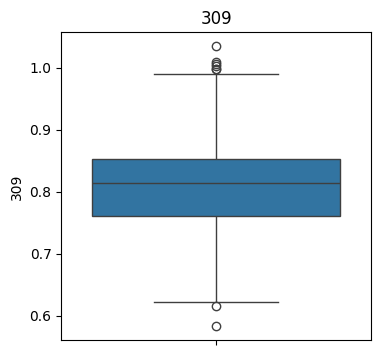

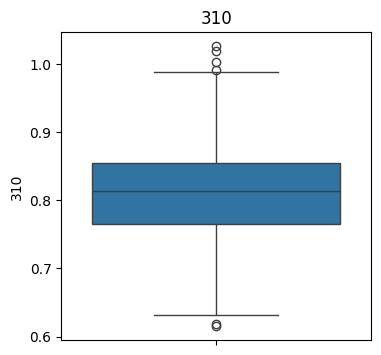

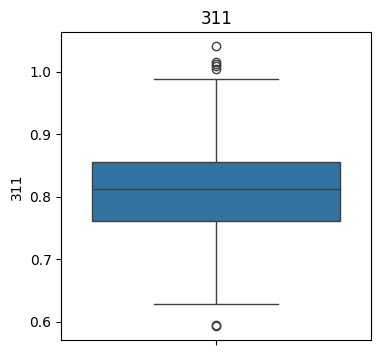

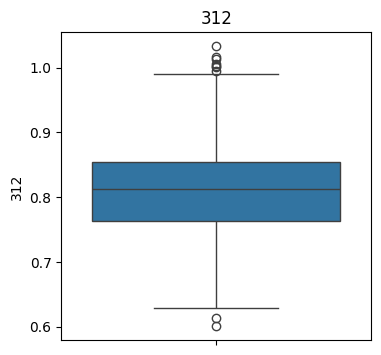

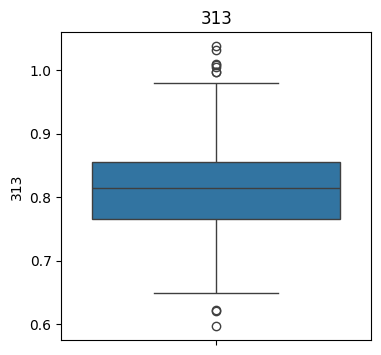

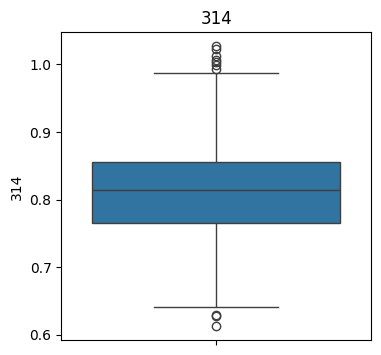

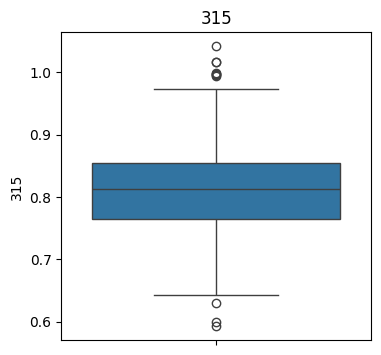

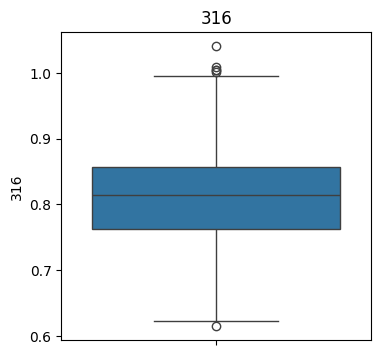

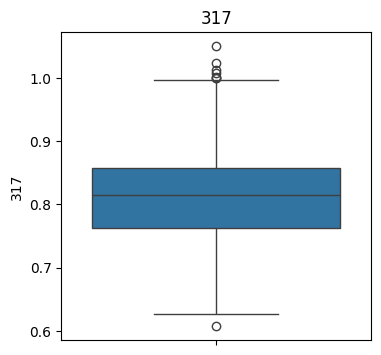

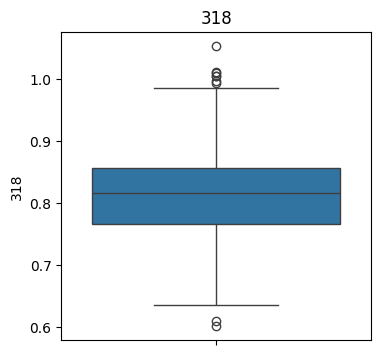

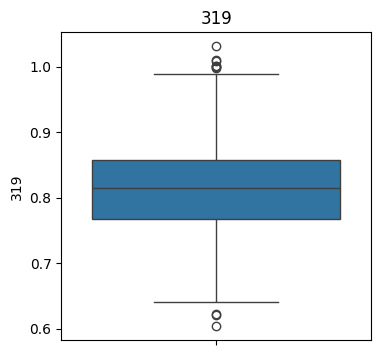

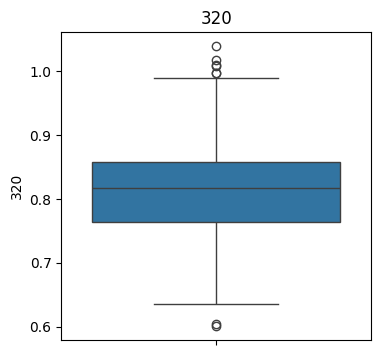

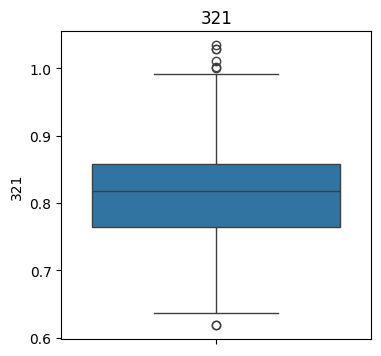

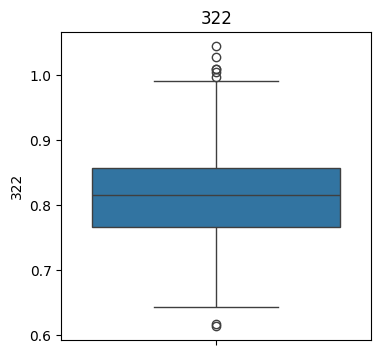

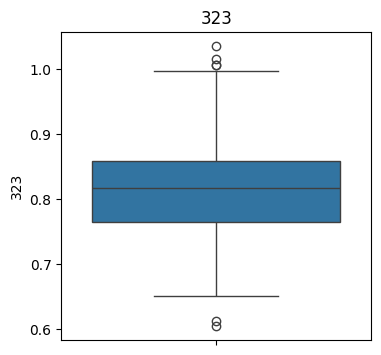

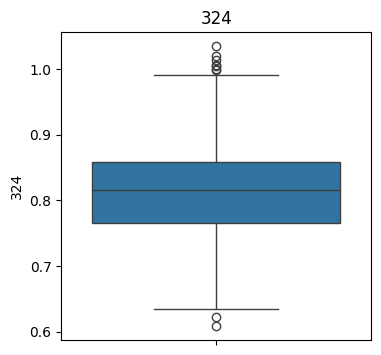

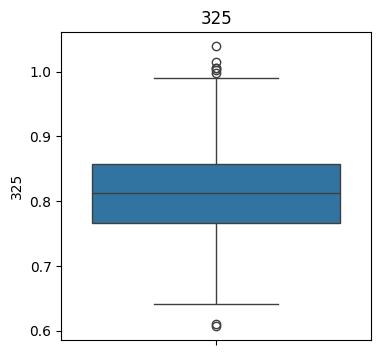

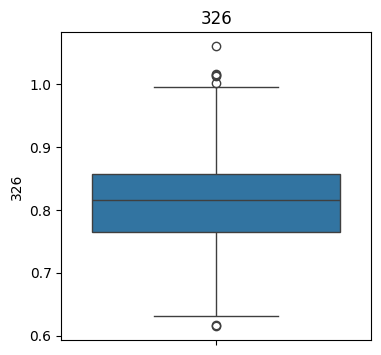

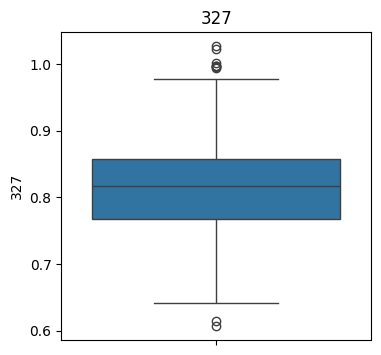

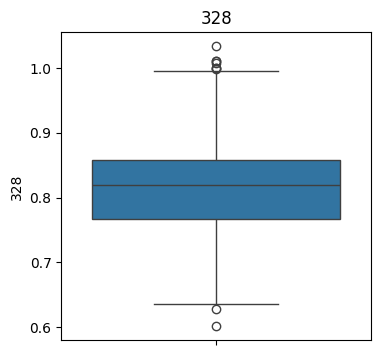

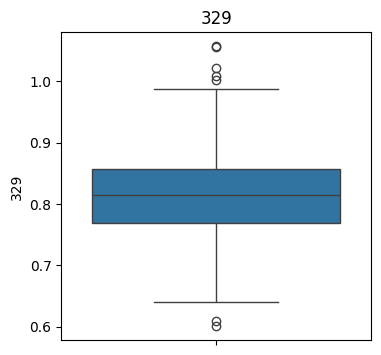

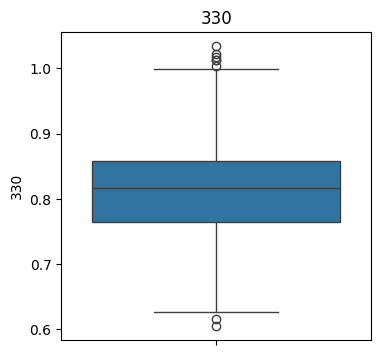

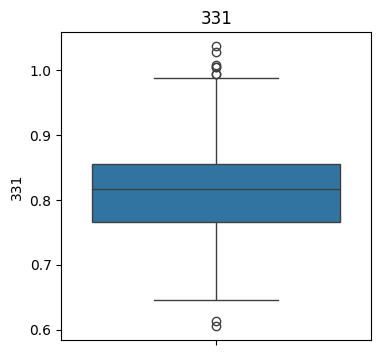

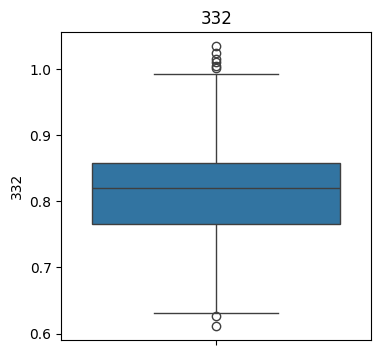

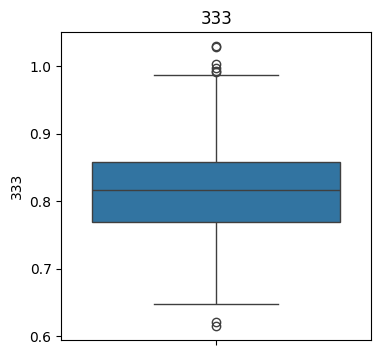

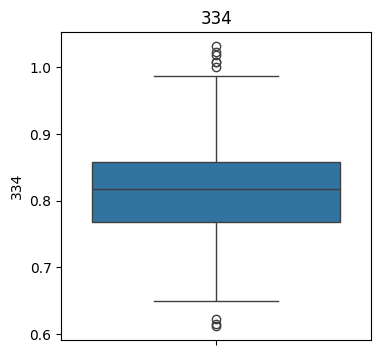

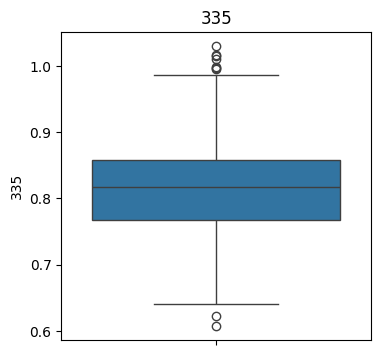

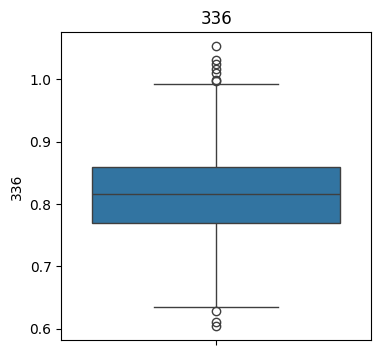

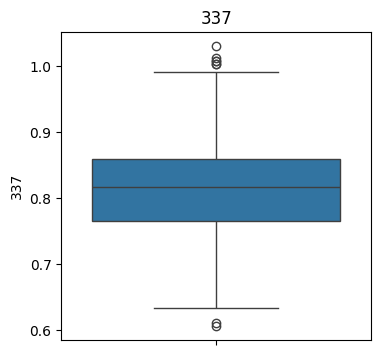

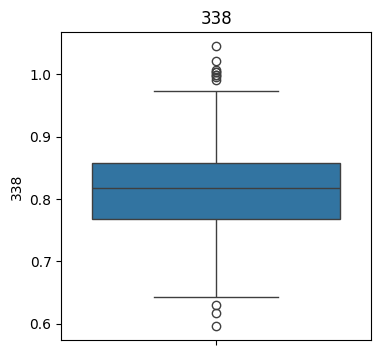

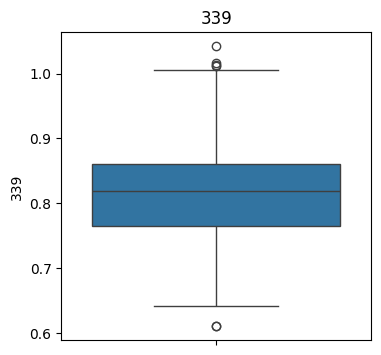

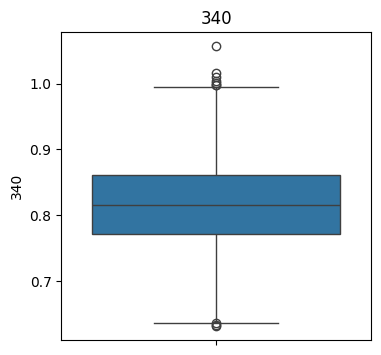

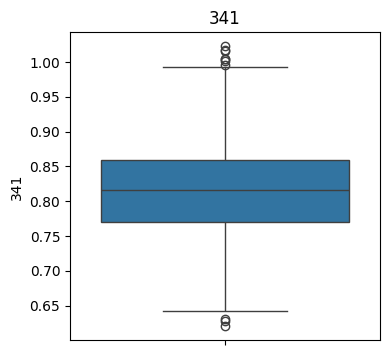

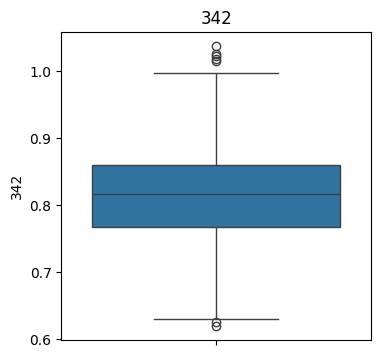

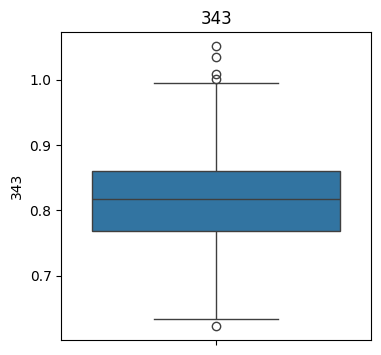

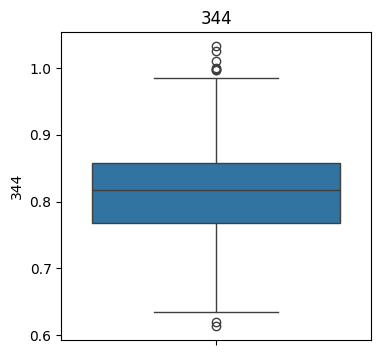

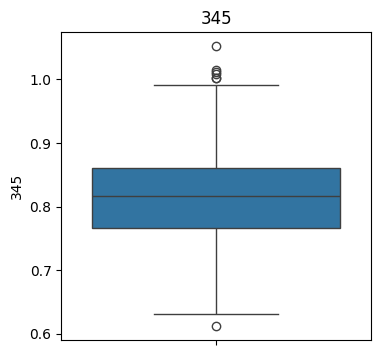

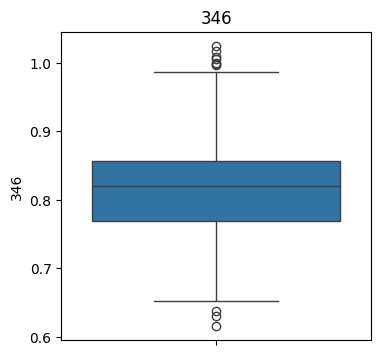

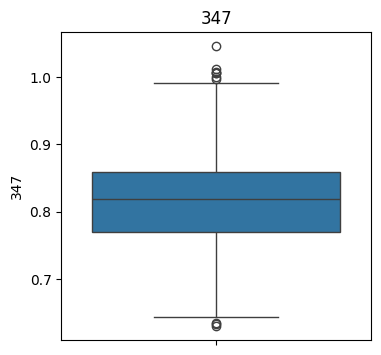

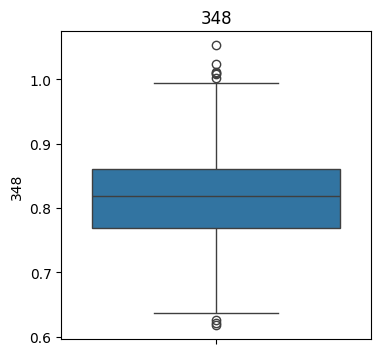

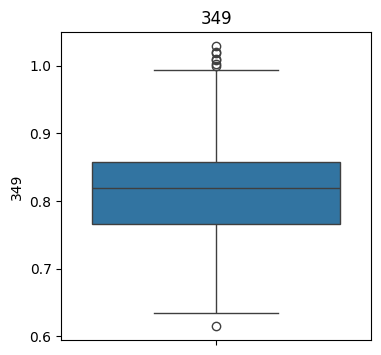

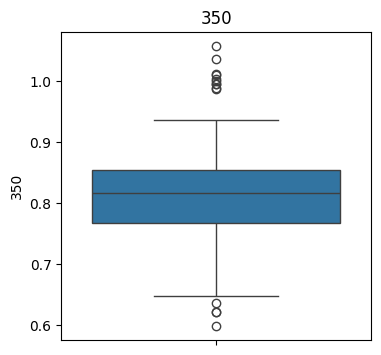

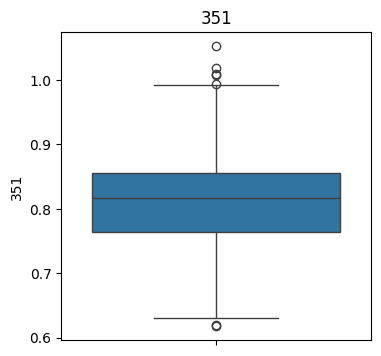

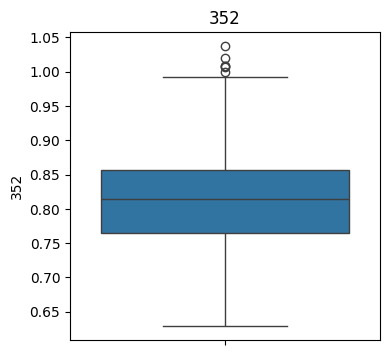

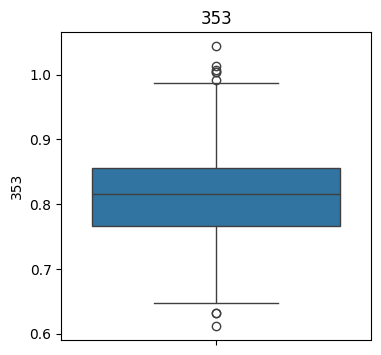

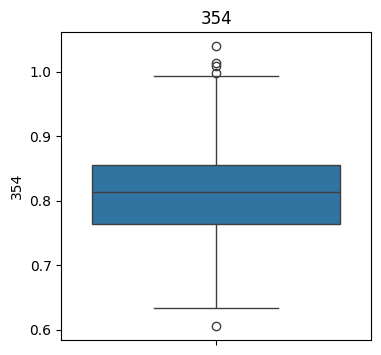

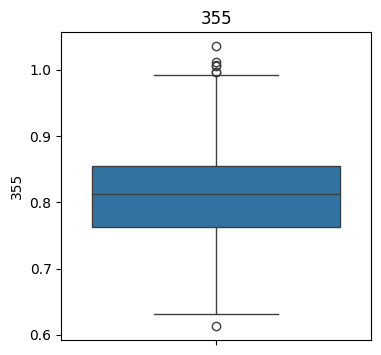

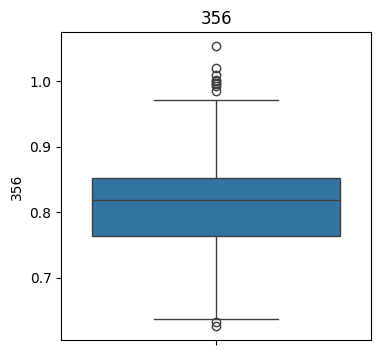

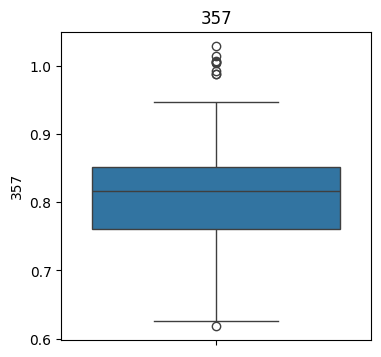

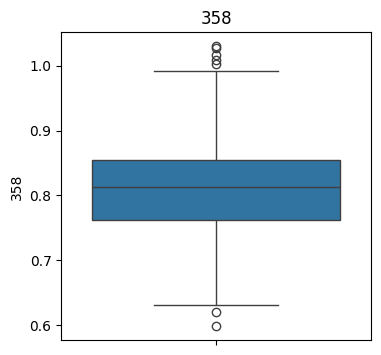

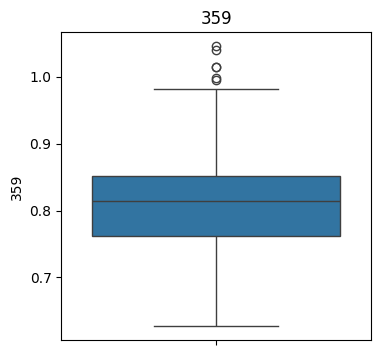

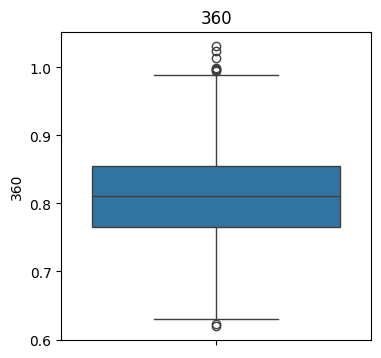

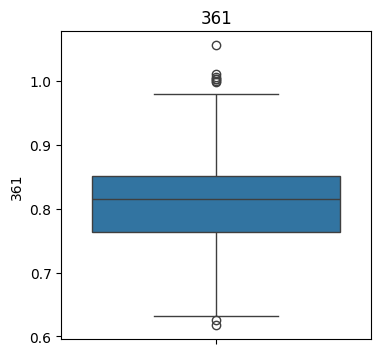

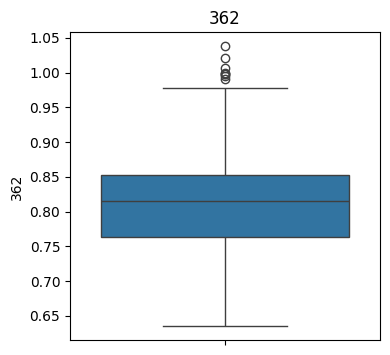

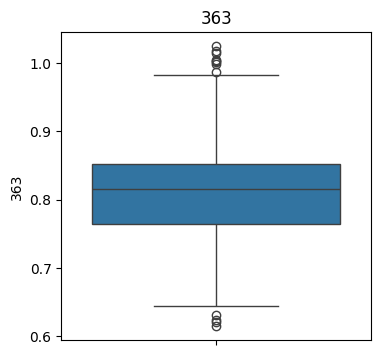

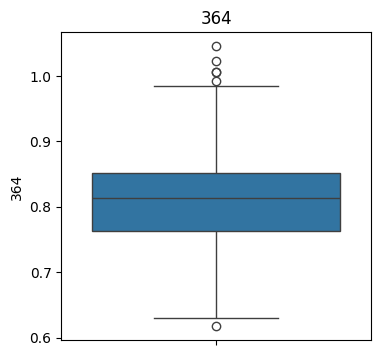

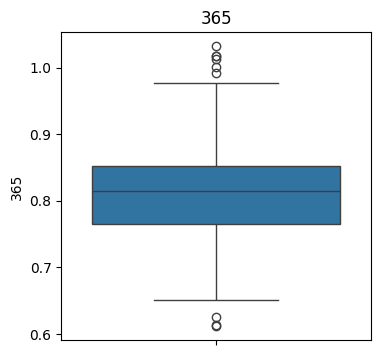

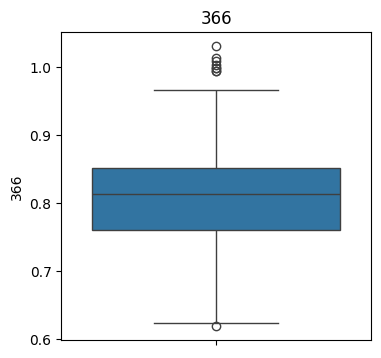

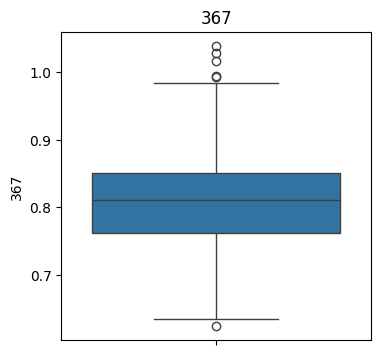

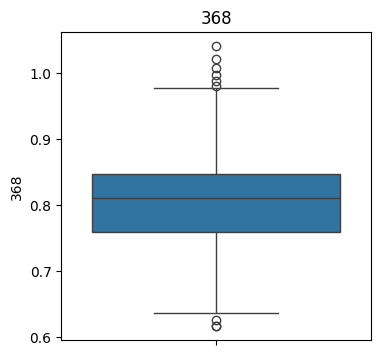

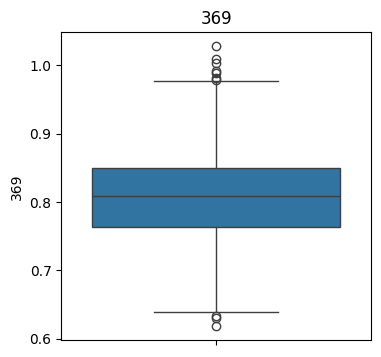

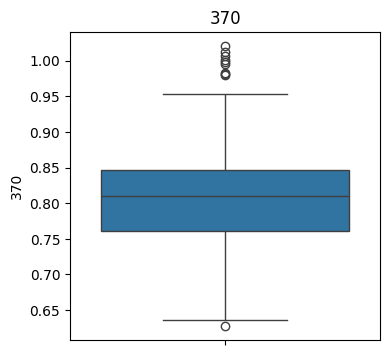

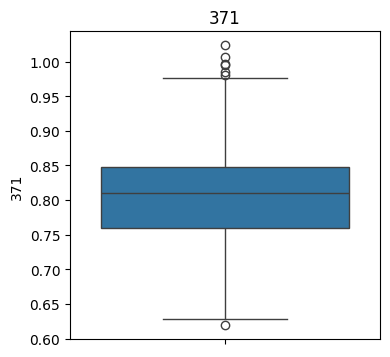

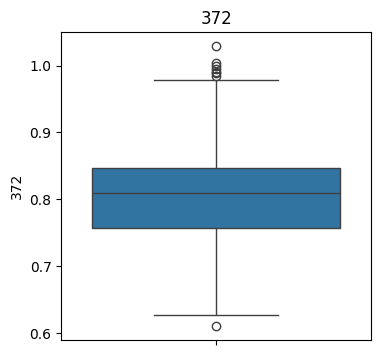

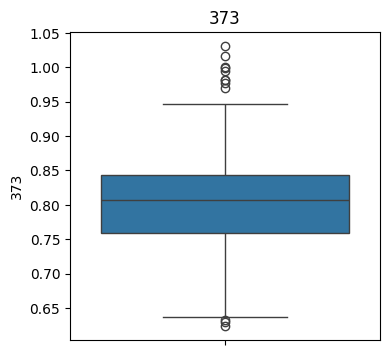

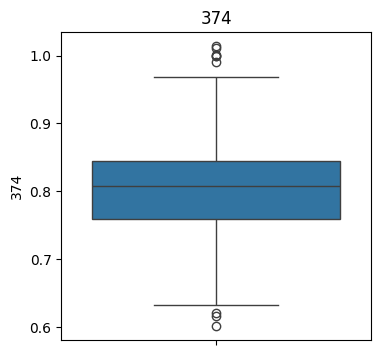

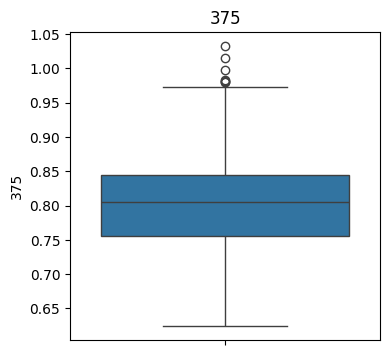

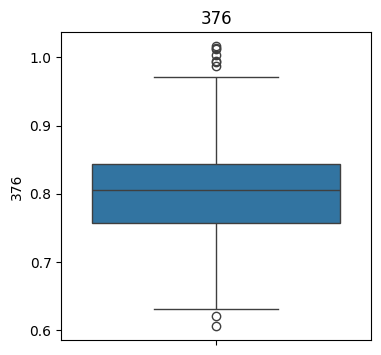

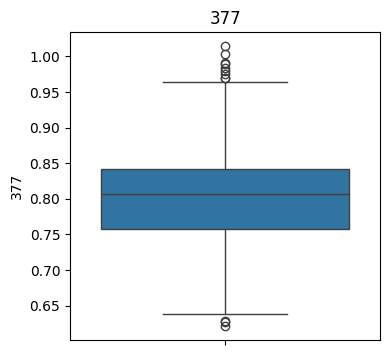

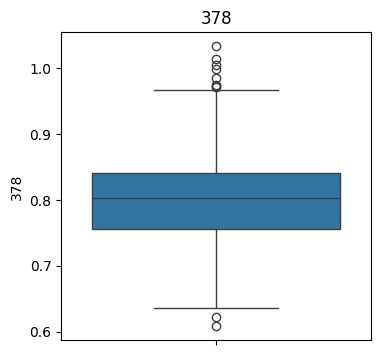

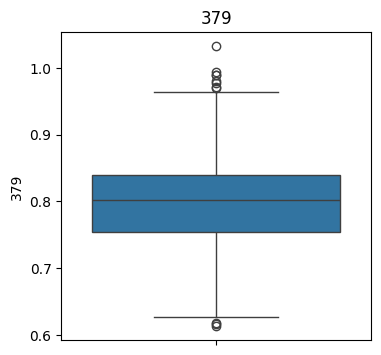

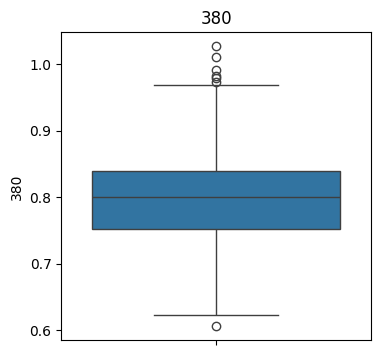

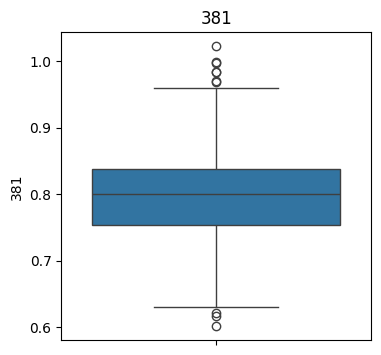

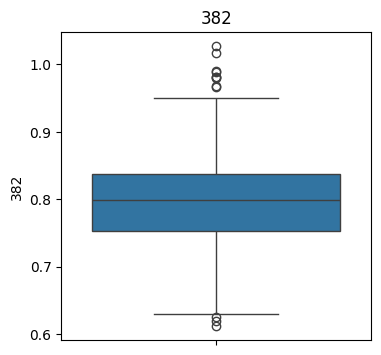

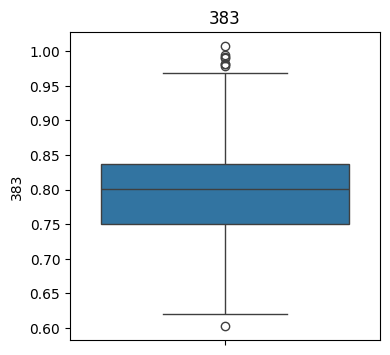

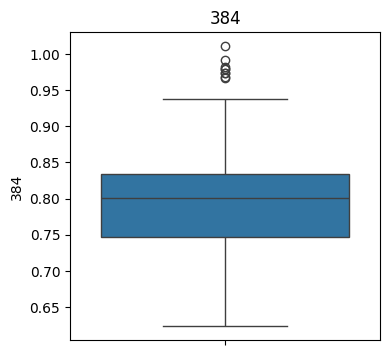

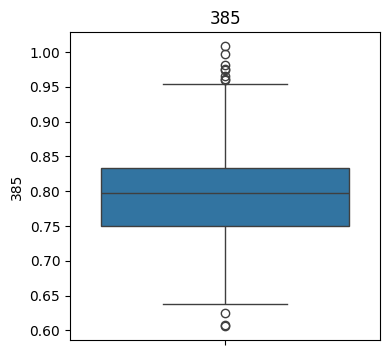

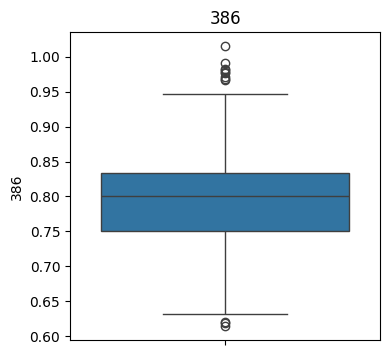

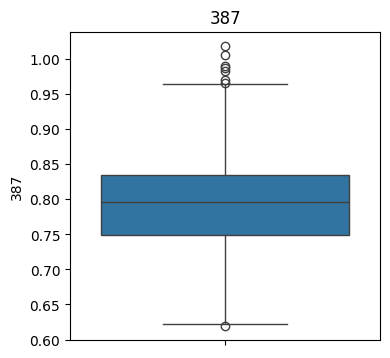

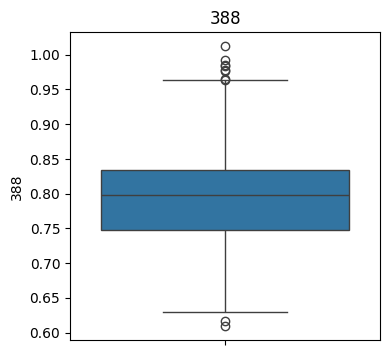

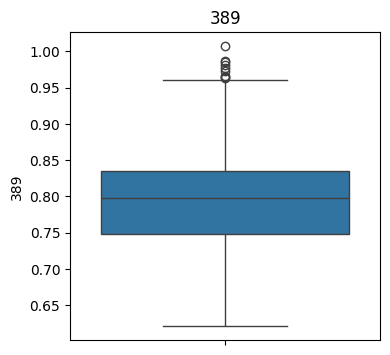

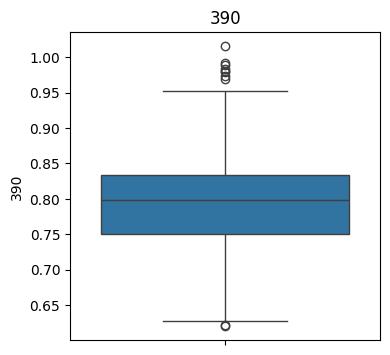

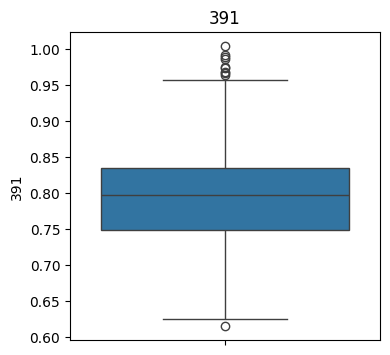

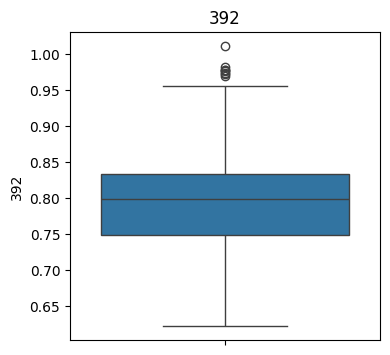

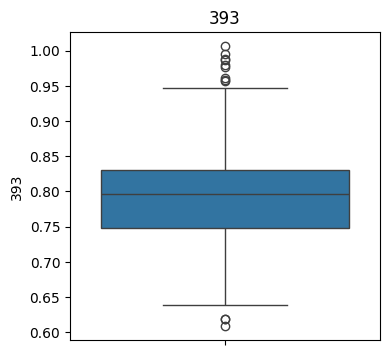

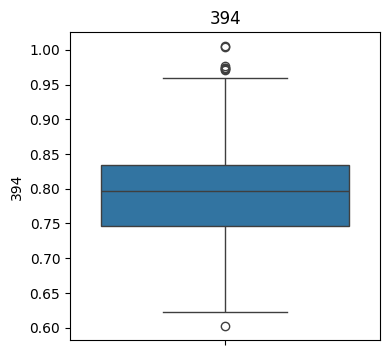

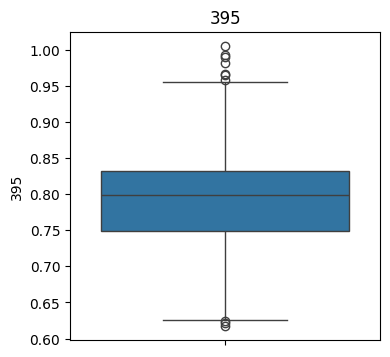

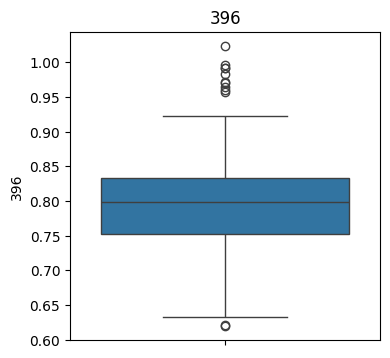

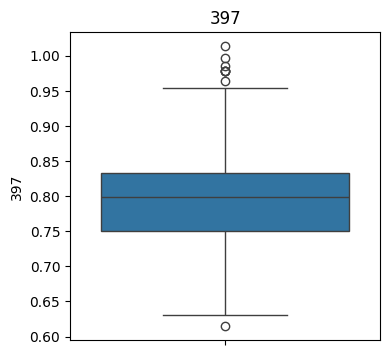

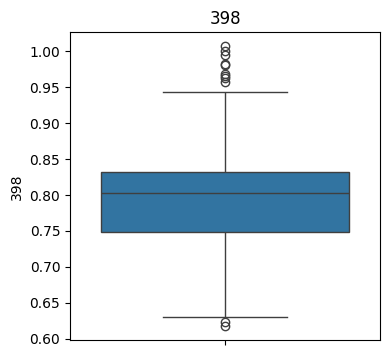

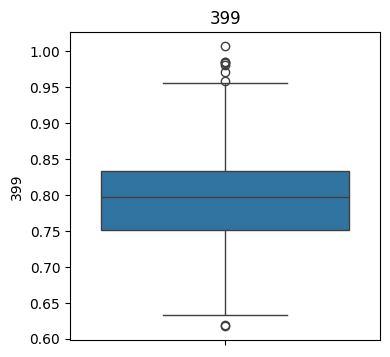

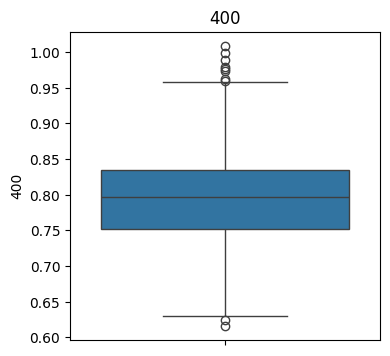

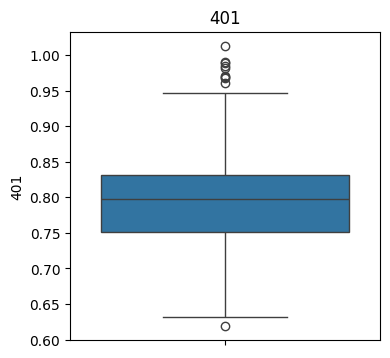

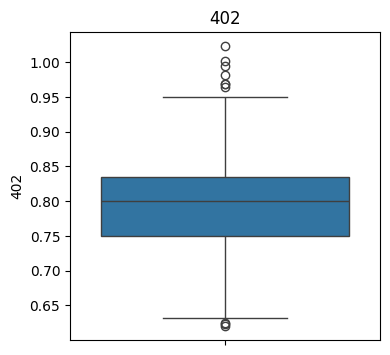

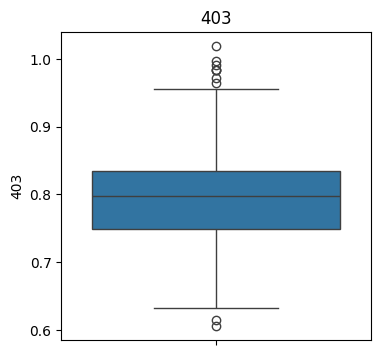

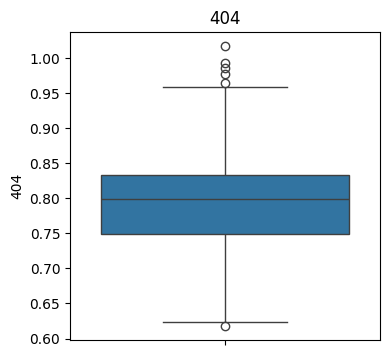

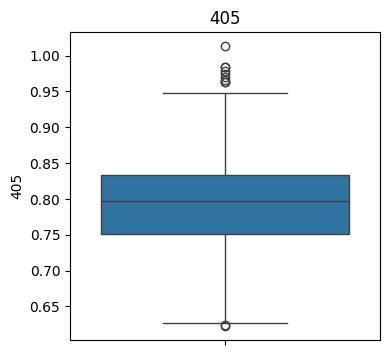

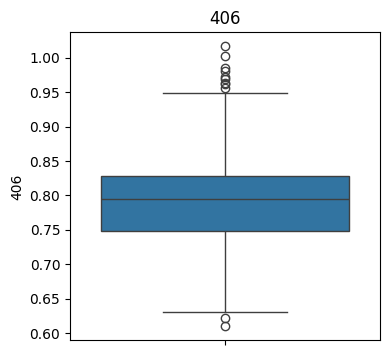

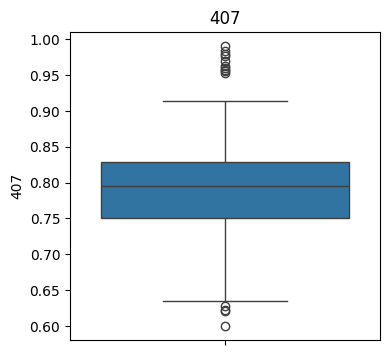

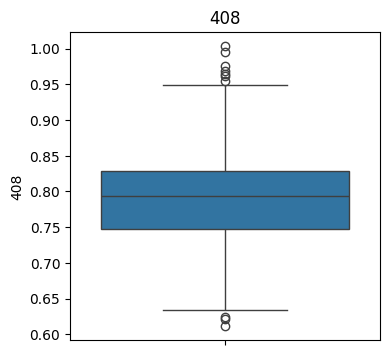

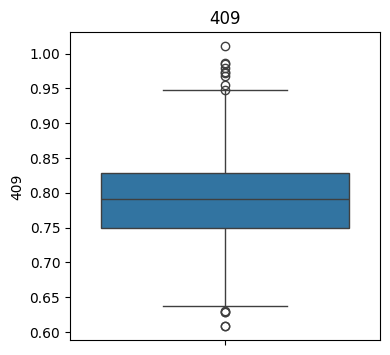

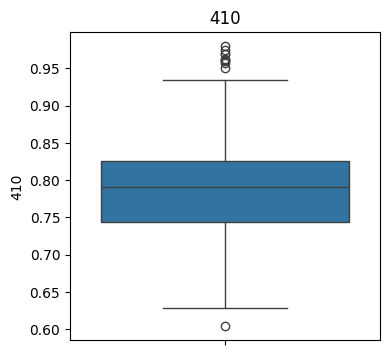

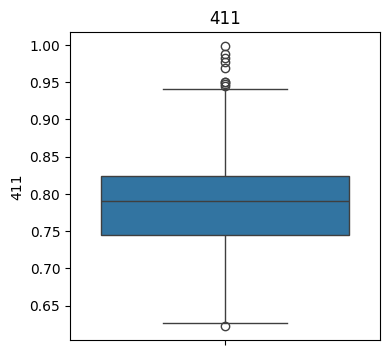

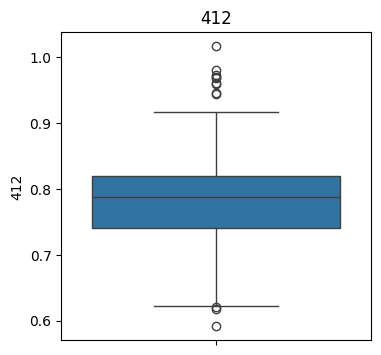

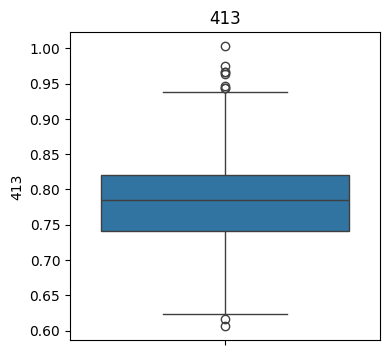

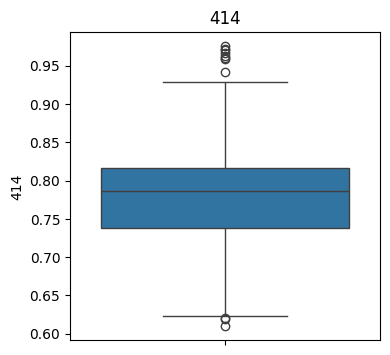

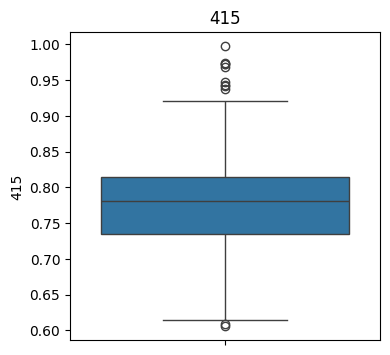

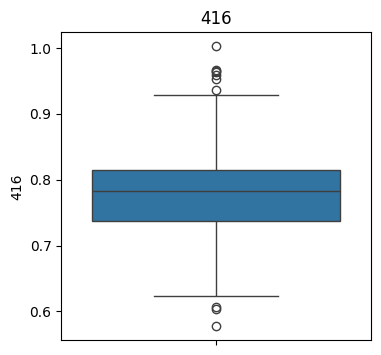

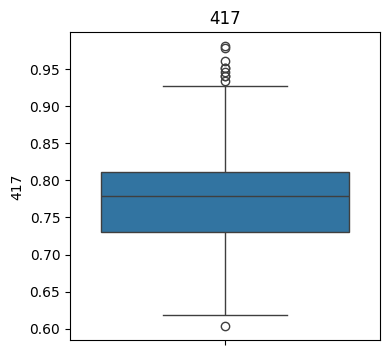

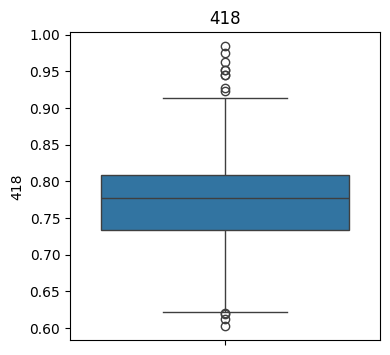

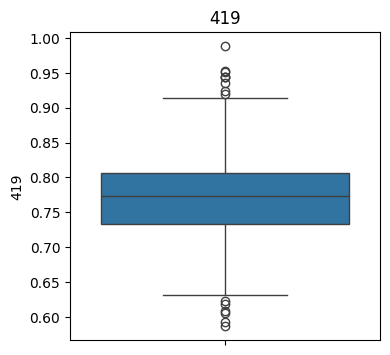

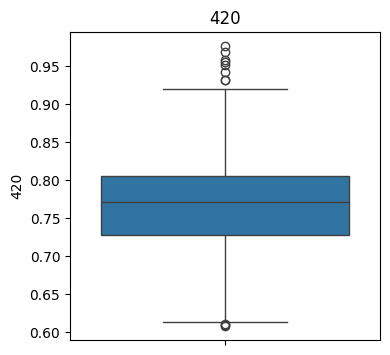

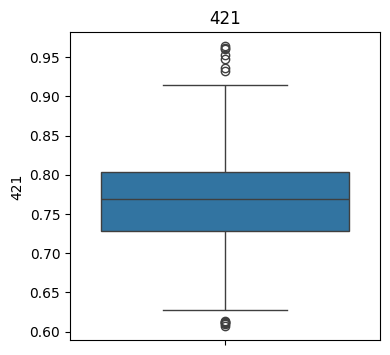

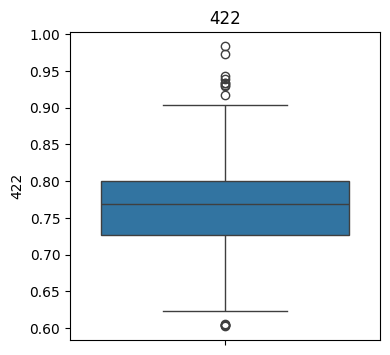

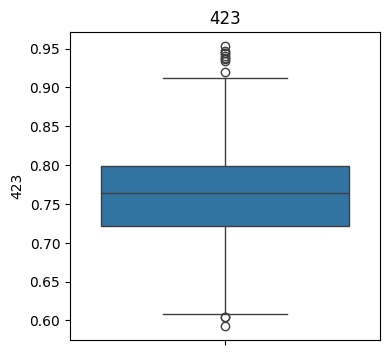

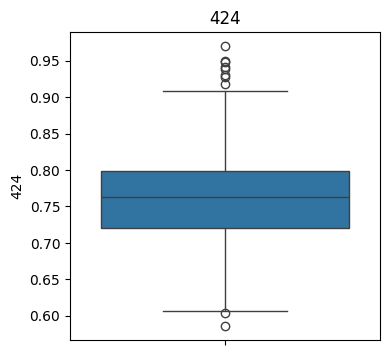

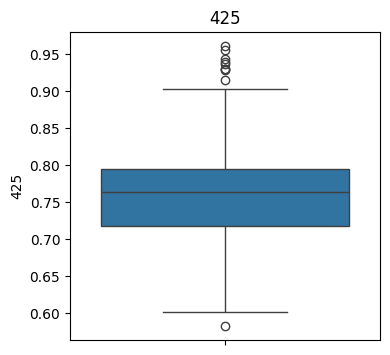

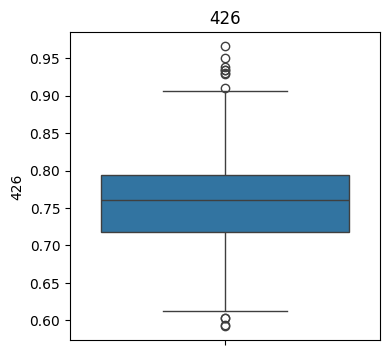

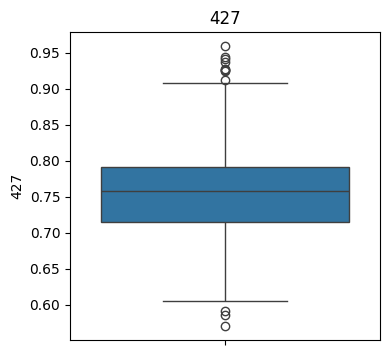

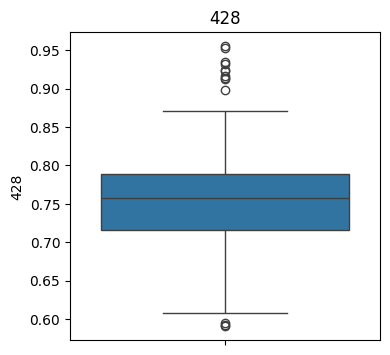

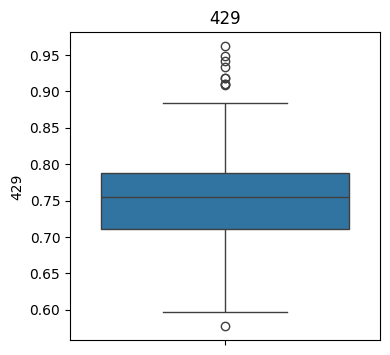

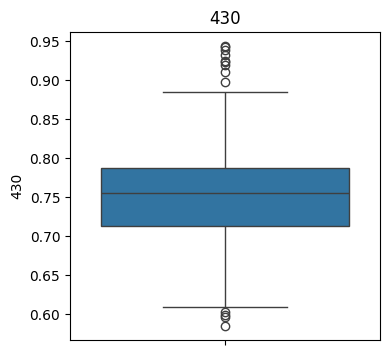

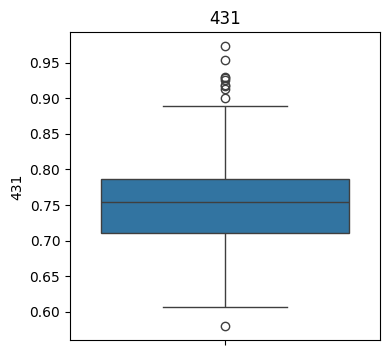

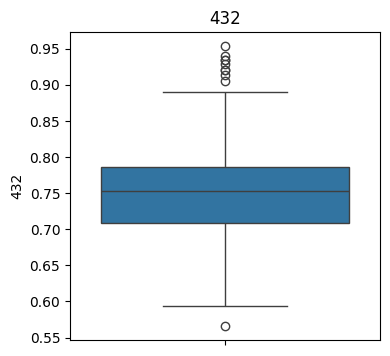

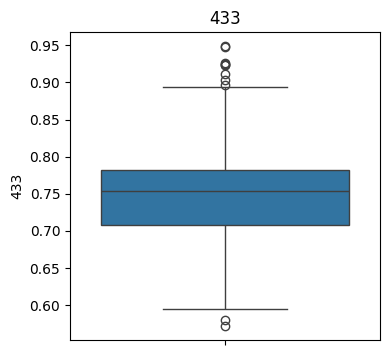

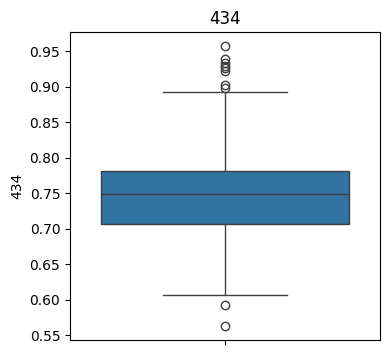

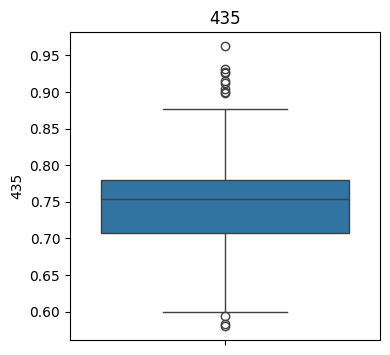

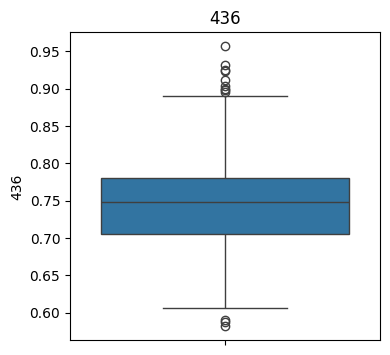

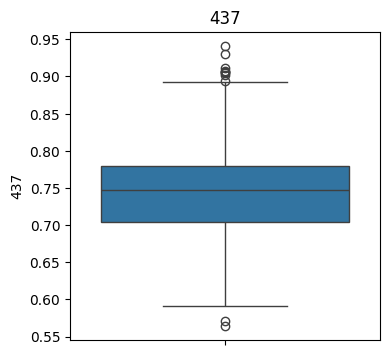

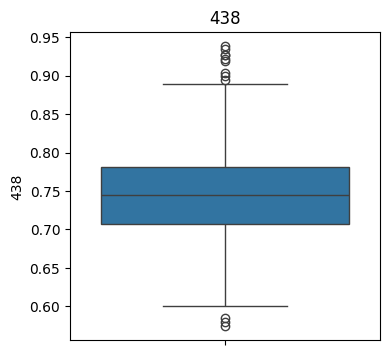

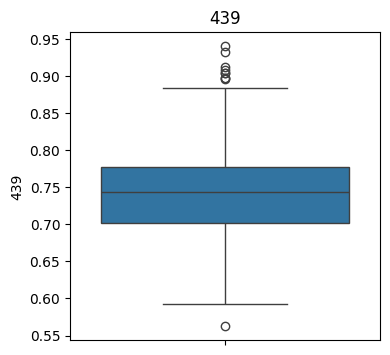

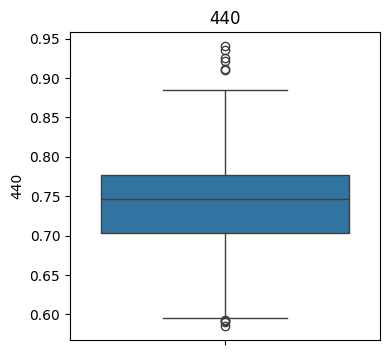

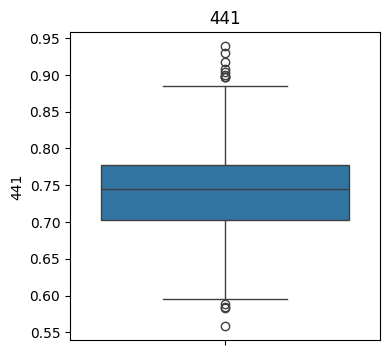

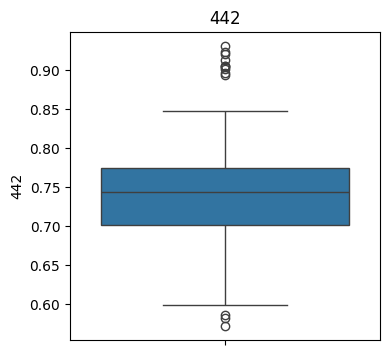

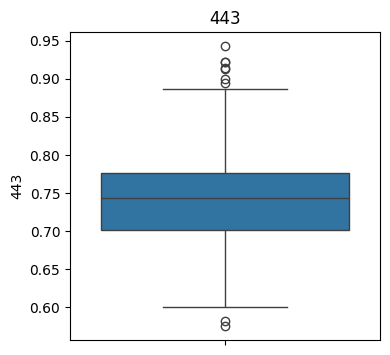

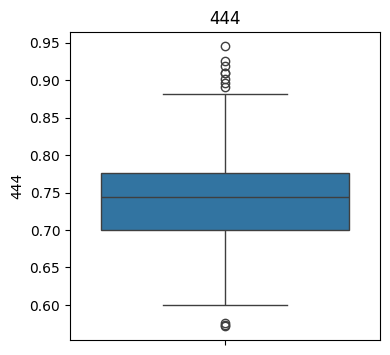

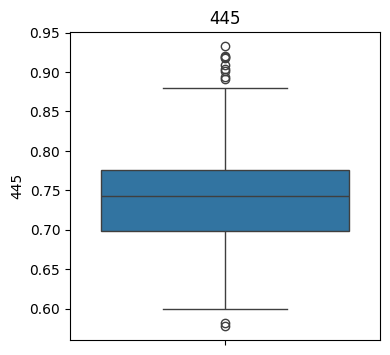

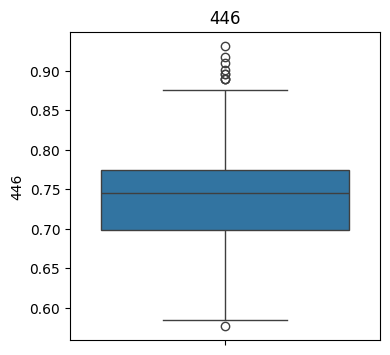

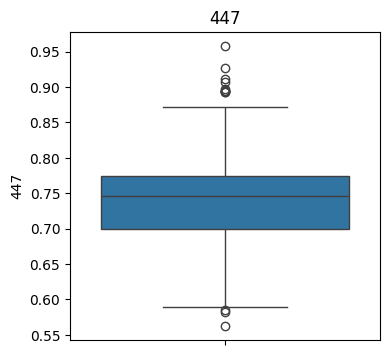

Outlier summary: {'0': 0, '1': 0, '2': 0, '3': 0, '4': 0, '5': 0, '6': 0, '7': 0, '8': 0, '9': 0, '10': 0, '11': 0, '12': 0, '13': 0, '14': 0, '15': 2, '16': 0, '17': 2, '18': 0, '19': 2, '20': 1, '21': 1, '22': 0, '23': 1, '24': 2, '25': 1, '26': 0, '27': 1, '28': 2, '29': 0, '30': 1, '31': 1, '32': 2, '33': 1, '34': 4, '35': 4, '36': 3, '37': 3, '38': 4, '39': 5, '40': 2, '41': 5, '42': 6, '43': 6, '44': 4, '45': 4, '46': 4, '47': 6, '48': 4, '49': 7, '50': 4, '51': 4, '52': 3, '53': 3, '54': 3, '55': 4, '56': 1, '57': 3, '58': 3, '59': 5, '60': 3, '61': 8, '62': 6, '63': 5, '64': 5, '65': 4, '66': 2, '67': 4, '68': 4, '69': 3, '70': 5, '71': 2, '72': 2, '73': 5, '74': 3, '75': 4, '76': 9, '77': 4, '78': 2, '79': 6, '80': 4, '81': 4, '82': 4, '83': 6, '84': 7, '85': 8, '86': 5, '87': 9, '88': 5, '89': 8, '90': 12, '91': 8, '92': 10, '93': 6, '94': 11, '95': 10, '96': 10, '97': 16, '98': 9, '99': 12, '100': 17, '101': 12, '102': 12, '103': 11, '104': 14, '105': 13, '106': 12, '107': 1

In [14]:
def analyze_outliers(df):
    outlier_summary = {}
    for feature in range(1, df.shape[1] - 1):
        plt.figure(figsize=(4, 4))
        sns.boxplot(df.iloc[:, feature])
        plt.title(df.columns[feature])
        plt.show()
        
        # Calculate the number of outliers
        Q1 = df.iloc[:, feature].quantile(0.25)
        Q3 = df.iloc[:, feature].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df.iloc[:, feature] < (Q1 - 1.5 * IQR)) | (df.iloc[:, feature] > (Q3 + 1.5 * IQR))]
        outlier_summary[df.columns[feature]] = len(outliers)
    return outlier_summary

# Analyze outliers
outlier_summary = analyze_outliers(df)
print("Outlier summary:", outlier_summary)

Choice of Method for Outlier detection: \
IQR used as it works well for small datasets.
Not using z-score to identify outliers as may not perform well for smaller datasets and used for normally distributed variables.

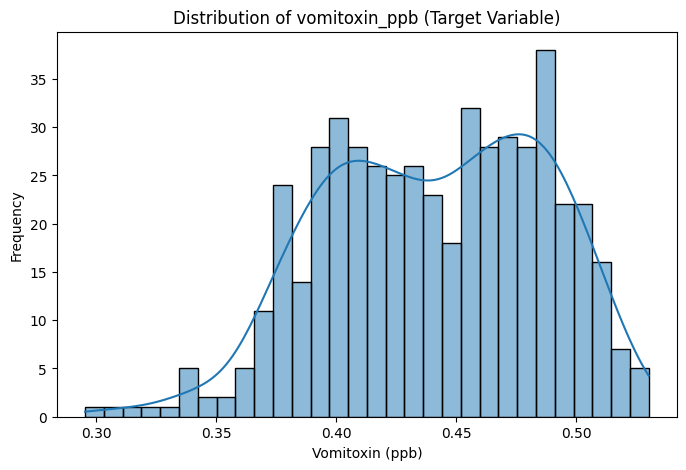

In [15]:
# Outlier Detection in Target Variable
plt.figure(figsize=(8, 5))
sns.histplot(df.iloc[:,2], bins=30, kde=True)
plt.title("Distribution of vomitoxin_ppb (Target Variable)")
plt.xlabel("Vomitoxin (ppb)")
plt.ylabel("Frequency")
plt.show()

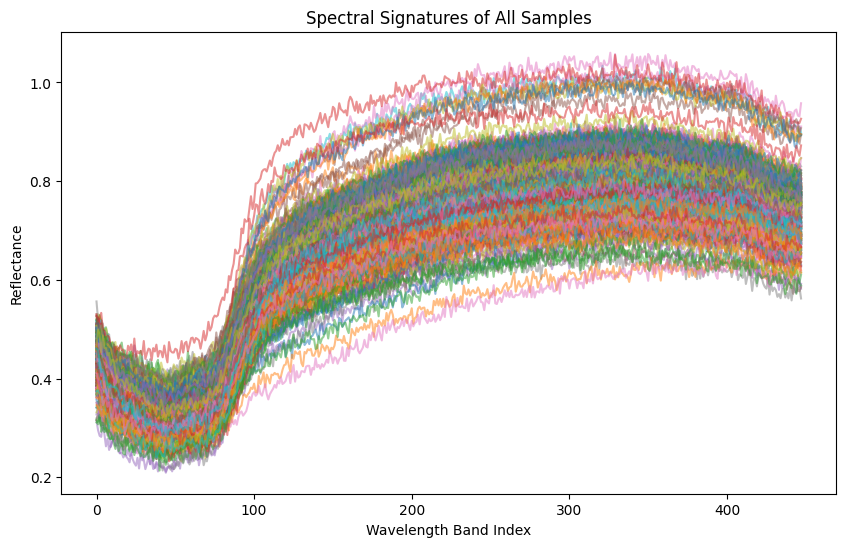

In [21]:

def plot_all_samples(X, title="Spectral Signatures of All Samples"):
    """
    Plots each row of X as a line, where:
      - X: 2D array or DataFrame of shape (n_samples, n_wavelengths)
    """
    plt.figure(figsize=(10, 6))
    for i in range(X.shape[0]):
        plt.plot(X[i, :], alpha=0.5)
    plt.xlabel("Wavelength Band Index")
    plt.ylabel("Reflectance")
    plt.title(title)
    plt.show()

plot_all_samples(df.iloc[:, 1:-1].values)

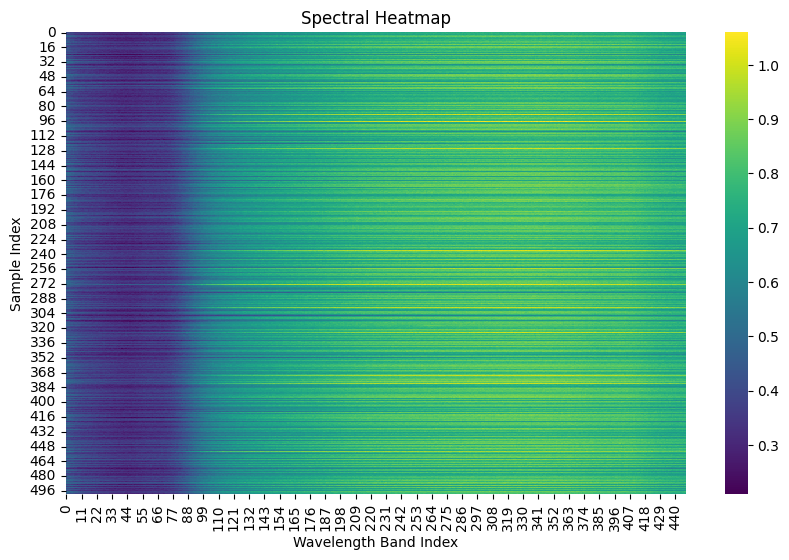

In [25]:
def plot_spectral_heatmap(X, title="Spectral Heatmap"):
    """
    Plots a heatmap where each row is a sample and each column is a wavelength.
    The color scale indicates reflectance.
    """
    plt.figure(figsize=(10, 6))
    sns.heatmap(X, cmap="viridis")
    plt.title(title)
    plt.xlabel("Wavelength Band Index")
    plt.ylabel("Sample Index")
    plt.show()

plot_spectral_heatmap(df.iloc[:, 1:-1].values)

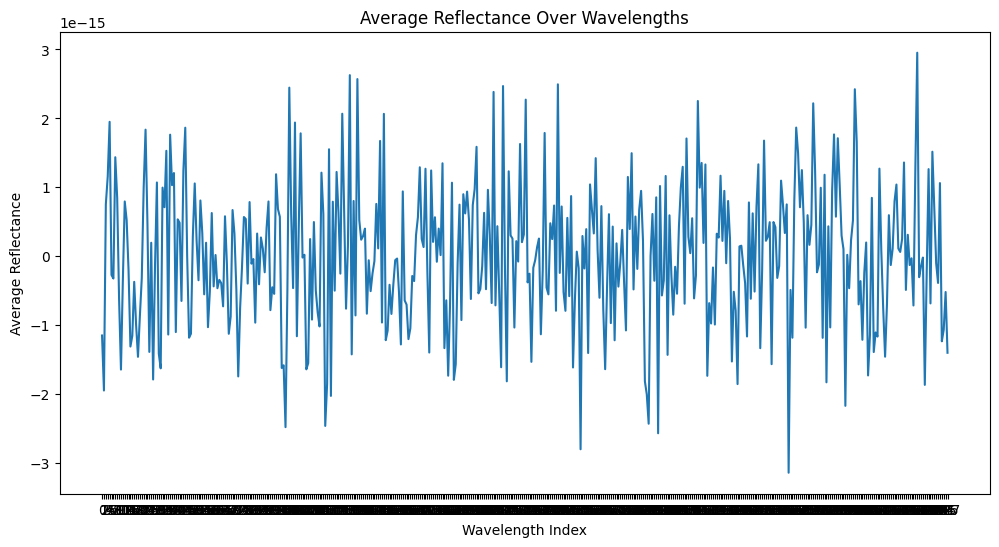

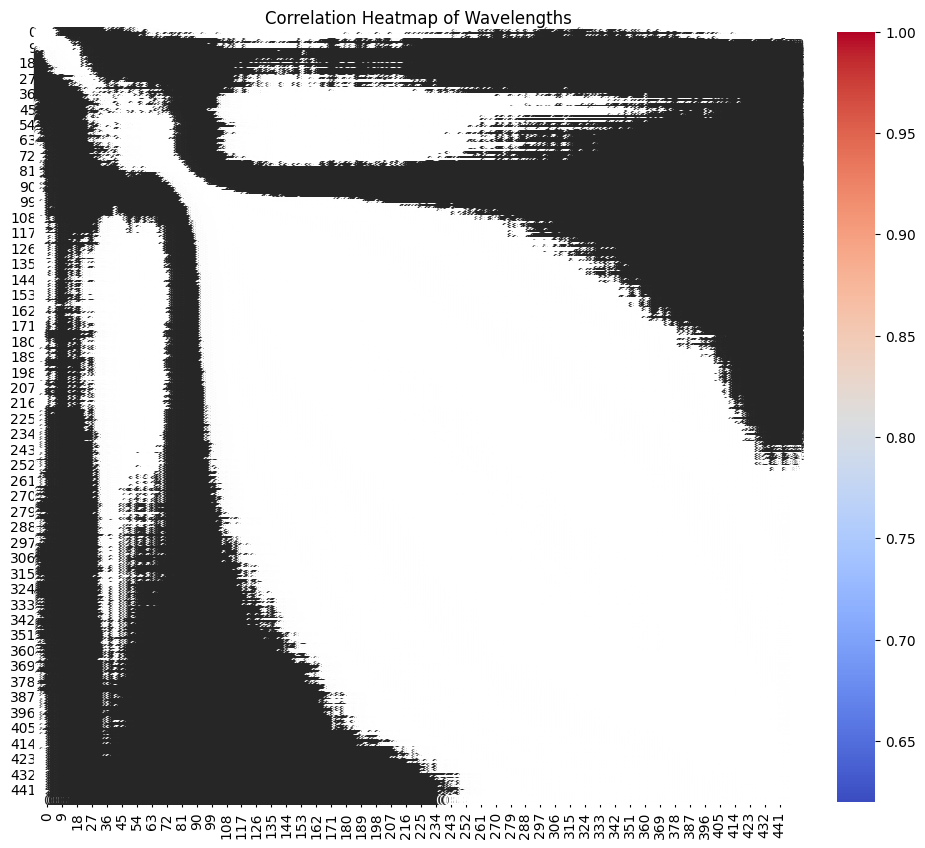

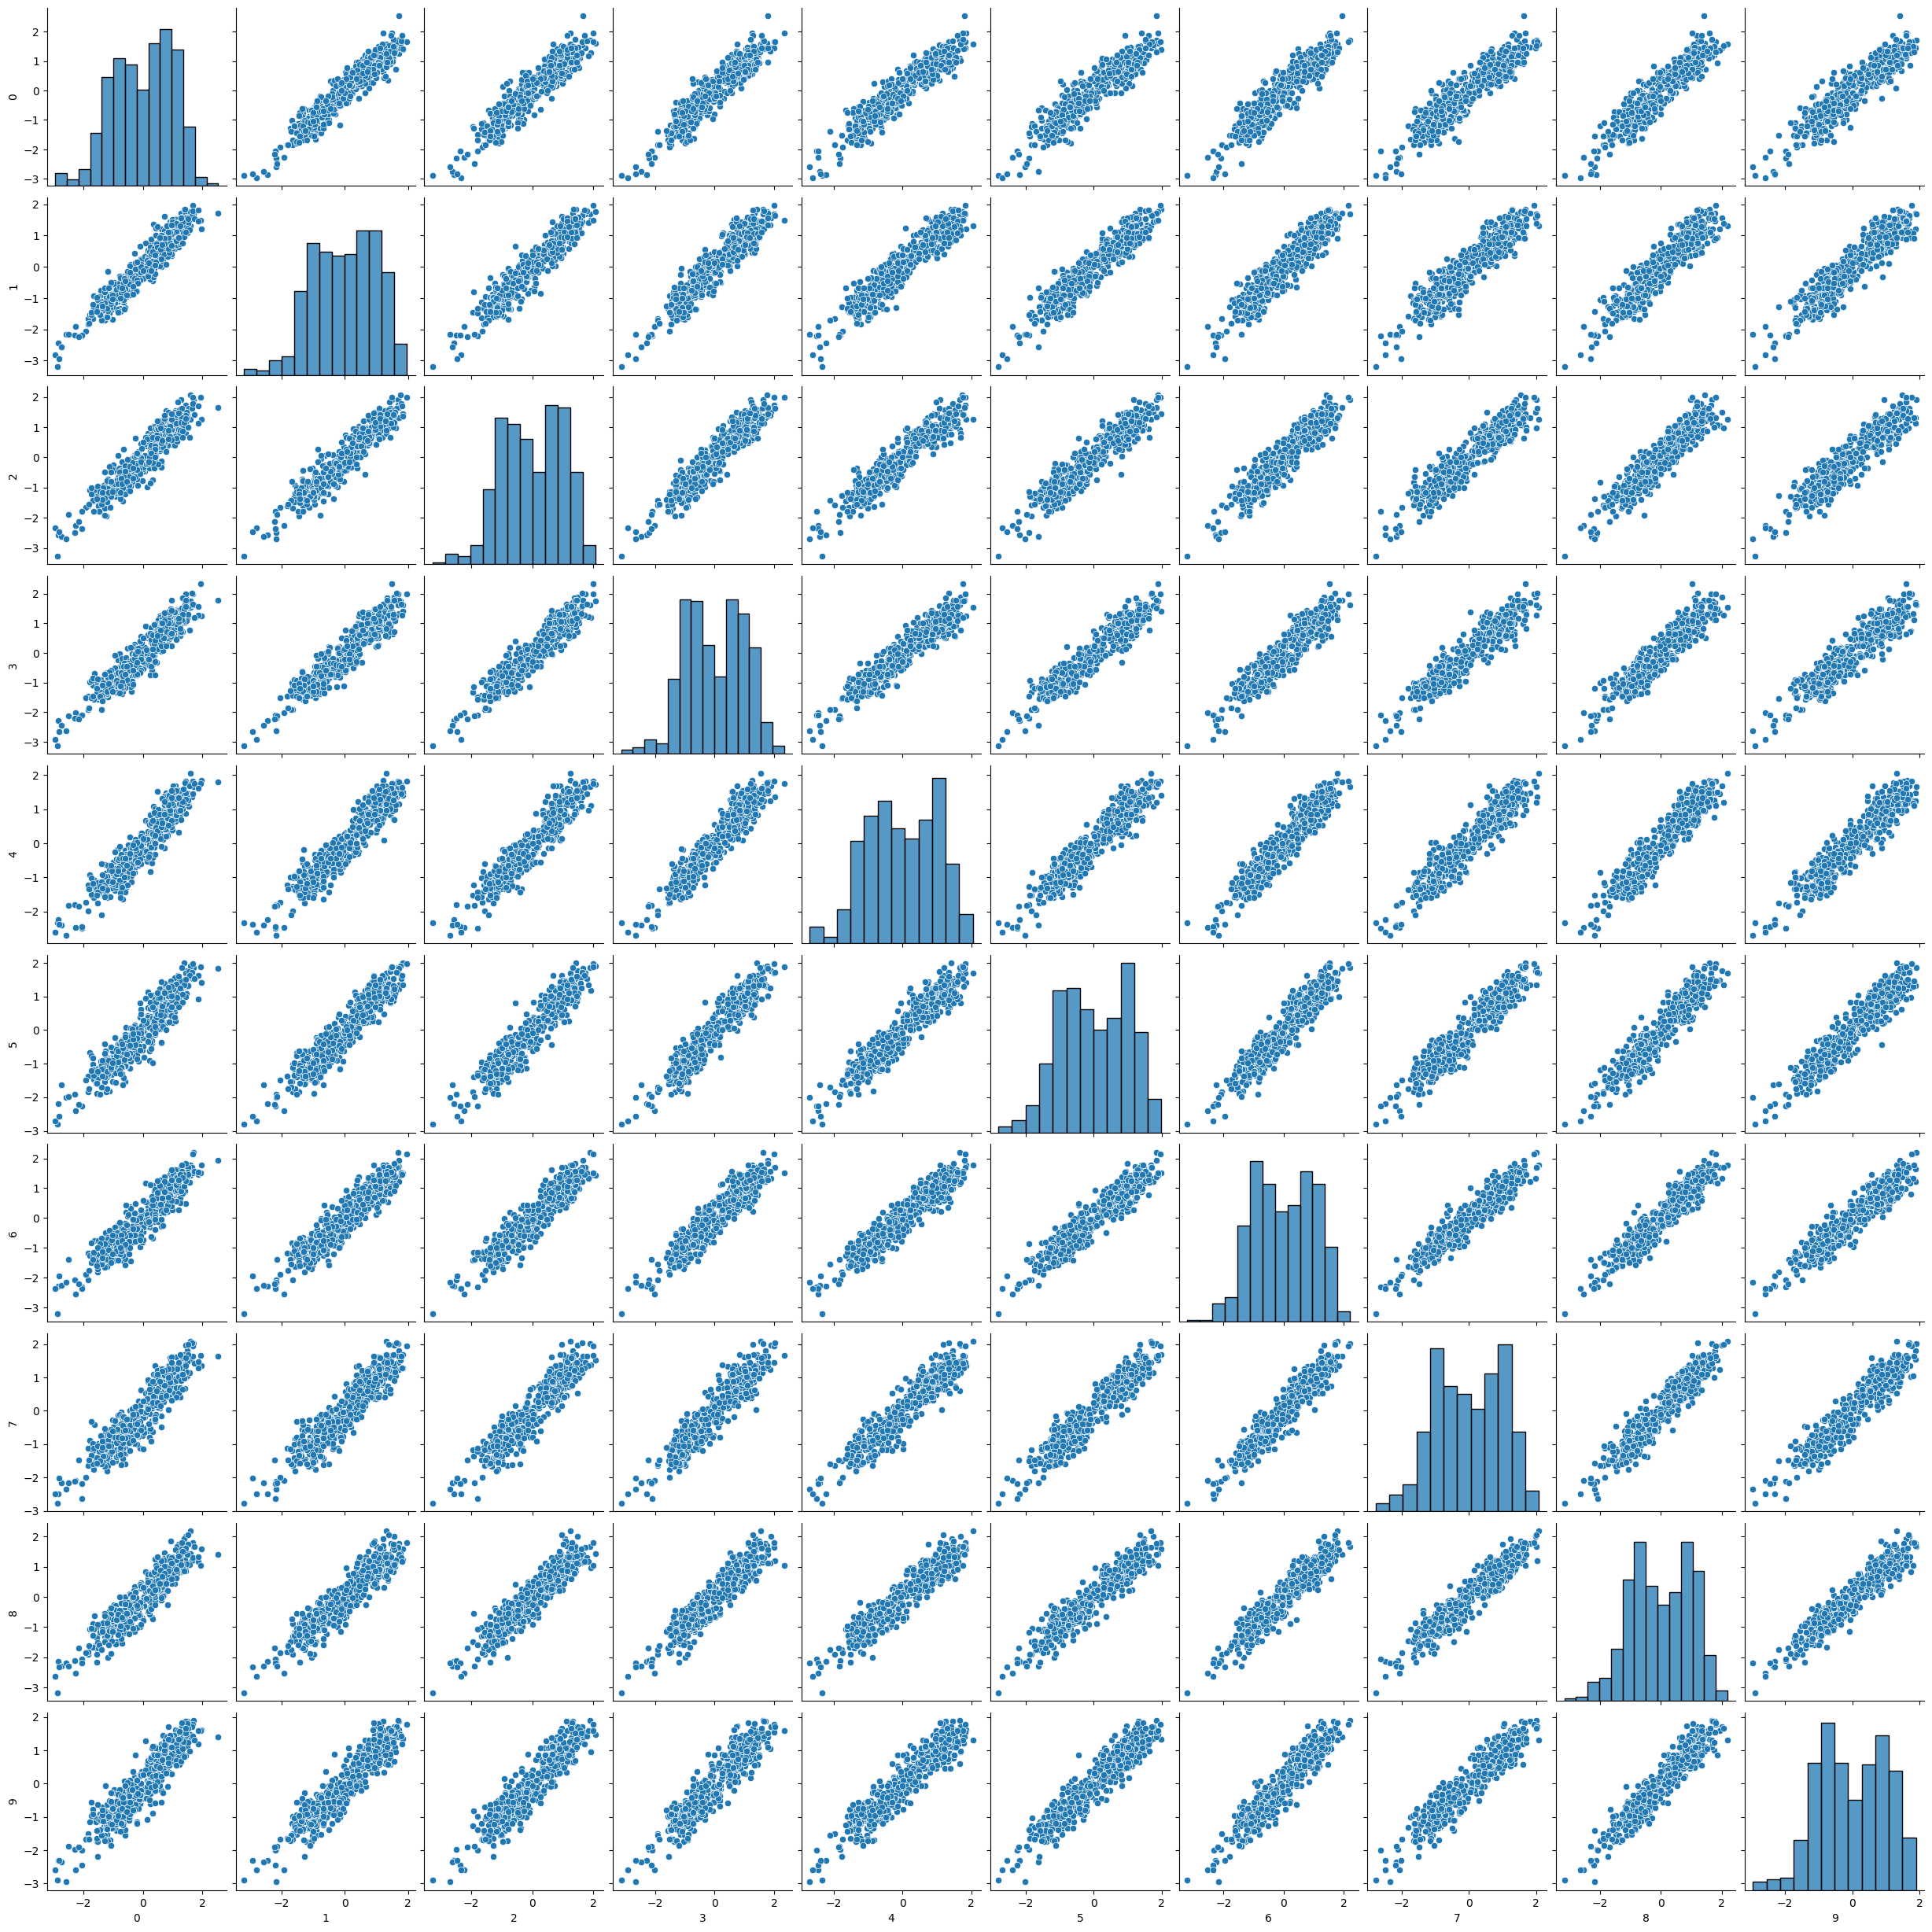

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

X = df.drop(["hsi_id","vomitoxin_ppb"], axis=1)
y = df["vomitoxin_ppb"].values.reshape(-1, 1)

# Normalize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame for visualization
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Line plot for average reflectance over wavelengths
plt.figure(figsize=(12, 6))
plt.plot(X_scaled_df.mean(axis=0))
plt.title('Average Reflectance Over Wavelengths')
plt.xlabel('Wavelength Index')
plt.ylabel('Average Reflectance')
plt.show()

# Heatmap for correlation between wavelengths
plt.figure(figsize=(12, 10))
sns.heatmap(X_scaled_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap of Wavelengths')
plt.show()

# Pairplot for sample comparisons
sns.pairplot(X_scaled_df.iloc[:, :10])  # Plotting only the first 10 wavelengths for readability
plt.show()